In [1]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.5.5.64
    Uninstalling opencv-contrib-python-4.5.5.64:
      Successfully uninstalled opencv-contrib-python-4.5.5.64


## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tqdm.notebook import tqdm
import pickle

In [2]:
print(cv2.__version__)

3.4.2


In [3]:
#kernels for prewitt edge detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) 
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

## Data Preprocessing, SIFT + SURF

In [4]:
folder1=r"D:\CV_project_data\Final_Dataset\Training\Negative"
folder2=r"D:\CV_project_data\Final_Dataset\Training\Dents"
folder3=r"D:\CV_project_data\Final_Dataset\Training\Scratches"

In [5]:
def feature_SIFT(folder_name, csv_dest):
    i=0
    for filename in tqdm(os.listdir(folder_name)):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(280,430)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        #edge detection
        img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty

        #initialise sift descriptor
        sift = cv2.xfeatures2d.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img_prewitt, None)

        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",i," : ", out.shape)
        i=i+1

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file if image is not corrupted
        if int(out.shape[0]) != 0:
            csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [6]:
def feature_SURF(folder_name, csv_dest):
    i=0
    for filename in tqdm(os.listdir(folder_name)):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)

        #resize image
        resize=(280,430)
        img=cv2.resize(a,resize)

        #gray image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        #edge detection
        img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
        img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
        img_prewitt = img_prewittx + img_prewitty
        
        #initialise surf descriptor
        surf = cv2.xfeatures2d.SURF_create()
        surf.setExtended(True)
        keypoints, descriptors = surf.detectAndCompute(img_prewitt, None)
        
        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",i," : ", out.shape)
        i=i+1

        #drop first coloumn as it's the no of feature detected. Not required.
        #append to the csv file if image is not corrupted
        if int(out.shape[0]) != 0:
            csv_data=out.to_csv(csv_dest, mode='a', header=False,index=False)

In [7]:
csvsift1 = r"D:\CV_project_data\SIFT_Negative.csv"
csvsift2 = r"D:\CV_project_data\SIFT_Dents.csv"
csvsift3 = r"D:\CV_project_data\SIFT_Scratches.csv"

In [8]:
csvsurf1 = r"D:\CV_project_data\SURF_Negative.csv"
csvsurf2 = r"D:\CV_project_data\SURF_Dents.csv"
csvsurf3 = r"D:\CV_project_data\SURF_Scratches.csv"

In [9]:
feature_SIFT(folder1, csvsift1)
feature_SIFT(folder2, csvsift2)
feature_SIFT(folder3, csvsift3)

  0%|          | 0/4000 [00:00<?, ?it/s]

descriptor shape  0  :  (879, 128)
descriptor shape  1  :  (933, 128)
descriptor shape  2  :  (1674, 128)
descriptor shape  3  :  (230, 128)
descriptor shape  4  :  (1357, 128)
descriptor shape  5  :  (1153, 128)
descriptor shape  6  :  (1166, 128)
descriptor shape  7  :  (768, 128)
descriptor shape  8  :  (1107, 128)
descriptor shape  9  :  (368, 128)
descriptor shape  10  :  (509, 128)
descriptor shape  11  :  (1277, 128)
descriptor shape  12  :  (1157, 128)
descriptor shape  13  :  (1086, 128)
descriptor shape  14  :  (1228, 128)
descriptor shape  15  :  (1273, 128)
descriptor shape  16  :  (1233, 128)
descriptor shape  17  :  (1257, 128)
descriptor shape  18  :  (686, 128)
descriptor shape  19  :  (1217, 128)
descriptor shape  20  :  (400, 128)
descriptor shape  21  :  (248, 128)
descriptor shape  22  :  (1149, 128)
descriptor shape  23  :  (1256, 128)
descriptor shape  24  :  (1488, 128)
descriptor shape  25  :  (631, 128)
descriptor shape  26  :  (640, 128)
descriptor shape  27  

descriptor shape  224  :  (619, 128)
descriptor shape  225  :  (1214, 128)
descriptor shape  226  :  (907, 128)
descriptor shape  227  :  (261, 128)
descriptor shape  228  :  (542, 128)
descriptor shape  229  :  (1370, 128)
descriptor shape  230  :  (809, 128)
descriptor shape  231  :  (921, 128)
descriptor shape  232  :  (899, 128)
descriptor shape  233  :  (832, 128)
descriptor shape  234  :  (857, 128)
descriptor shape  235  :  (1325, 128)
descriptor shape  236  :  (1163, 128)
descriptor shape  237  :  (1295, 128)
descriptor shape  238  :  (1758, 128)
descriptor shape  239  :  (2074, 128)
descriptor shape  240  :  (825, 128)
descriptor shape  241  :  (1231, 128)
descriptor shape  242  :  (1427, 128)
descriptor shape  243  :  (962, 128)
descriptor shape  244  :  (926, 128)
descriptor shape  245  :  (911, 128)
descriptor shape  246  :  (1064, 128)
descriptor shape  247  :  (1263, 128)
descriptor shape  248  :  (1111, 128)
descriptor shape  249  :  (1783, 128)
descriptor shape  250  : 

descriptor shape  443  :  (1315, 128)
descriptor shape  444  :  (898, 128)
descriptor shape  445  :  (799, 128)
descriptor shape  446  :  (1936, 128)
descriptor shape  447  :  (977, 128)
descriptor shape  448  :  (846, 128)
descriptor shape  449  :  (1168, 128)
descriptor shape  450  :  (1574, 128)
descriptor shape  451  :  (1061, 128)
descriptor shape  452  :  (1358, 128)
descriptor shape  453  :  (1361, 128)
descriptor shape  454  :  (1419, 128)
descriptor shape  455  :  (1480, 128)
descriptor shape  456  :  (894, 128)
descriptor shape  457  :  (612, 128)
descriptor shape  458  :  (882, 128)
descriptor shape  459  :  (1244, 128)
descriptor shape  460  :  (800, 128)
descriptor shape  461  :  (716, 128)
descriptor shape  462  :  (1134, 128)
descriptor shape  463  :  (889, 128)
descriptor shape  464  :  (1313, 128)
descriptor shape  465  :  (720, 128)
descriptor shape  466  :  (1066, 128)
descriptor shape  467  :  (828, 128)
descriptor shape  468  :  (1004, 128)
descriptor shape  469  :

descriptor shape  664  :  (873, 128)
descriptor shape  665  :  (1430, 128)
descriptor shape  666  :  (795, 128)
descriptor shape  667  :  (715, 128)
descriptor shape  668  :  (1182, 128)
descriptor shape  669  :  (519, 128)
descriptor shape  670  :  (1216, 128)
descriptor shape  671  :  (793, 128)
descriptor shape  672  :  (681, 128)
descriptor shape  673  :  (1228, 128)
descriptor shape  674  :  (661, 128)
descriptor shape  675  :  (839, 128)
descriptor shape  676  :  (571, 128)
descriptor shape  677  :  (1189, 128)
descriptor shape  678  :  (357, 128)
descriptor shape  679  :  (930, 128)
descriptor shape  680  :  (681, 128)
descriptor shape  681  :  (1175, 128)
descriptor shape  682  :  (792, 128)
descriptor shape  683  :  (997, 128)
descriptor shape  684  :  (697, 128)
descriptor shape  685  :  (644, 128)
descriptor shape  686  :  (406, 128)
descriptor shape  687  :  (625, 128)
descriptor shape  688  :  (923, 128)
descriptor shape  689  :  (1055, 128)
descriptor shape  690  :  (338,

descriptor shape  885  :  (963, 128)
descriptor shape  886  :  (1393, 128)
descriptor shape  887  :  (1100, 128)
descriptor shape  888  :  (697, 128)
descriptor shape  889  :  (858, 128)
descriptor shape  890  :  (701, 128)
descriptor shape  891  :  (869, 128)
descriptor shape  892  :  (1027, 128)
descriptor shape  893  :  (909, 128)
descriptor shape  894  :  (1433, 128)
descriptor shape  895  :  (404, 128)
descriptor shape  896  :  (1195, 128)
descriptor shape  897  :  (1533, 128)
descriptor shape  898  :  (1211, 128)
descriptor shape  899  :  (326, 128)
descriptor shape  900  :  (775, 128)
descriptor shape  901  :  (1388, 128)
descriptor shape  902  :  (974, 128)
descriptor shape  903  :  (862, 128)
descriptor shape  904  :  (862, 128)
descriptor shape  905  :  (820, 128)
descriptor shape  906  :  (895, 128)
descriptor shape  907  :  (833, 128)
descriptor shape  908  :  (819, 128)
descriptor shape  909  :  (773, 128)
descriptor shape  910  :  (1146, 128)
descriptor shape  911  :  (12

descriptor shape  1103  :  (1108, 128)
descriptor shape  1104  :  (1186, 128)
descriptor shape  1105  :  (888, 128)
descriptor shape  1106  :  (1638, 128)
descriptor shape  1107  :  (1236, 128)
descriptor shape  1108  :  (734, 128)
descriptor shape  1109  :  (827, 128)
descriptor shape  1110  :  (1090, 128)
descriptor shape  1111  :  (648, 128)
descriptor shape  1112  :  (702, 128)
descriptor shape  1113  :  (556, 128)
descriptor shape  1114  :  (881, 128)
descriptor shape  1115  :  (885, 128)
descriptor shape  1116  :  (569, 128)
descriptor shape  1117  :  (1087, 128)
descriptor shape  1118  :  (757, 128)
descriptor shape  1119  :  (739, 128)
descriptor shape  1120  :  (1261, 128)
descriptor shape  1121  :  (989, 128)
descriptor shape  1122  :  (794, 128)
descriptor shape  1123  :  (578, 128)
descriptor shape  1124  :  (1199, 128)
descriptor shape  1125  :  (911, 128)
descriptor shape  1126  :  (761, 128)
descriptor shape  1127  :  (745, 128)
descriptor shape  1128  :  (642, 128)
desc

descriptor shape  1318  :  (308, 128)
descriptor shape  1319  :  (565, 128)
descriptor shape  1320  :  (762, 128)
descriptor shape  1321  :  (1132, 128)
descriptor shape  1322  :  (857, 128)
descriptor shape  1323  :  (1811, 128)
descriptor shape  1324  :  (951, 128)
descriptor shape  1325  :  (1424, 128)
descriptor shape  1326  :  (1218, 128)
descriptor shape  1327  :  (1147, 128)
descriptor shape  1328  :  (1230, 128)
descriptor shape  1329  :  (1179, 128)
descriptor shape  1330  :  (1216, 128)
descriptor shape  1331  :  (577, 128)
descriptor shape  1332  :  (893, 128)
descriptor shape  1333  :  (503, 128)
descriptor shape  1334  :  (1019, 128)
descriptor shape  1335  :  (811, 128)
descriptor shape  1336  :  (1087, 128)
descriptor shape  1337  :  (972, 128)
descriptor shape  1338  :  (606, 128)
descriptor shape  1339  :  (702, 128)
descriptor shape  1340  :  (636, 128)
descriptor shape  1341  :  (629, 128)
descriptor shape  1342  :  (444, 128)
descriptor shape  1343  :  (270, 128)
de

descriptor shape  1532  :  (1021, 128)
descriptor shape  1533  :  (1206, 128)
descriptor shape  1534  :  (654, 128)
descriptor shape  1535  :  (997, 128)
descriptor shape  1536  :  (1129, 128)
descriptor shape  1537  :  (996, 128)
descriptor shape  1538  :  (813, 128)
descriptor shape  1539  :  (928, 128)
descriptor shape  1540  :  (685, 128)
descriptor shape  1541  :  (458, 128)
descriptor shape  1542  :  (1710, 128)
descriptor shape  1543  :  (603, 128)
descriptor shape  1544  :  (1156, 128)
descriptor shape  1545  :  (999, 128)
descriptor shape  1546  :  (754, 128)
descriptor shape  1547  :  (695, 128)
descriptor shape  1548  :  (645, 128)
descriptor shape  1549  :  (949, 128)
descriptor shape  1550  :  (508, 128)
descriptor shape  1551  :  (1067, 128)
descriptor shape  1552  :  (840, 128)
descriptor shape  1553  :  (1219, 128)
descriptor shape  1554  :  (1302, 128)
descriptor shape  1555  :  (1016, 128)
descriptor shape  1556  :  (1168, 128)
descriptor shape  1557  :  (696, 128)
de

descriptor shape  1747  :  (1072, 128)
descriptor shape  1748  :  (1302, 128)
descriptor shape  1749  :  (1146, 128)
descriptor shape  1750  :  (717, 128)
descriptor shape  1751  :  (1533, 128)
descriptor shape  1752  :  (1013, 128)
descriptor shape  1753  :  (1190, 128)
descriptor shape  1754  :  (749, 128)
descriptor shape  1755  :  (761, 128)
descriptor shape  1756  :  (1196, 128)
descriptor shape  1757  :  (927, 128)
descriptor shape  1758  :  (1645, 128)
descriptor shape  1759  :  (1763, 128)
descriptor shape  1760  :  (897, 128)
descriptor shape  1761  :  (1745, 128)
descriptor shape  1762  :  (1440, 128)
descriptor shape  1763  :  (891, 128)
descriptor shape  1764  :  (912, 128)
descriptor shape  1765  :  (942, 128)
descriptor shape  1766  :  (733, 128)
descriptor shape  1767  :  (719, 128)
descriptor shape  1768  :  (696, 128)
descriptor shape  1769  :  (1557, 128)
descriptor shape  1770  :  (1162, 128)
descriptor shape  1771  :  (993, 128)
descriptor shape  1772  :  (984, 128)

descriptor shape  1960  :  (754, 128)
descriptor shape  1961  :  (1408, 128)
descriptor shape  1962  :  (1752, 128)
descriptor shape  1963  :  (1322, 128)
descriptor shape  1964  :  (651, 128)
descriptor shape  1965  :  (1161, 128)
descriptor shape  1966  :  (1389, 128)
descriptor shape  1967  :  (938, 128)
descriptor shape  1968  :  (515, 128)
descriptor shape  1969  :  (739, 128)
descriptor shape  1970  :  (683, 128)
descriptor shape  1971  :  (1044, 128)
descriptor shape  1972  :  (1305, 128)
descriptor shape  1973  :  (628, 128)
descriptor shape  1974  :  (949, 128)
descriptor shape  1975  :  (1256, 128)
descriptor shape  1976  :  (1138, 128)
descriptor shape  1977  :  (1637, 128)
descriptor shape  1978  :  (1292, 128)
descriptor shape  1979  :  (898, 128)
descriptor shape  1980  :  (1541, 128)
descriptor shape  1981  :  (1477, 128)
descriptor shape  1982  :  (1240, 128)
descriptor shape  1983  :  (534, 128)
descriptor shape  1984  :  (1444, 128)
descriptor shape  1985  :  (930, 12

descriptor shape  2173  :  (1042, 128)
descriptor shape  2174  :  (1259, 128)
descriptor shape  2175  :  (764, 128)
descriptor shape  2176  :  (348, 128)
descriptor shape  2177  :  (1078, 128)
descriptor shape  2178  :  (687, 128)
descriptor shape  2179  :  (764, 128)
descriptor shape  2180  :  (817, 128)
descriptor shape  2181  :  (1441, 128)
descriptor shape  2182  :  (1305, 128)
descriptor shape  2183  :  (685, 128)
descriptor shape  2184  :  (657, 128)
descriptor shape  2185  :  (845, 128)
descriptor shape  2186  :  (776, 128)
descriptor shape  2187  :  (949, 128)
descriptor shape  2188  :  (1176, 128)
descriptor shape  2189  :  (1125, 128)
descriptor shape  2190  :  (1223, 128)
descriptor shape  2191  :  (1278, 128)
descriptor shape  2192  :  (1183, 128)
descriptor shape  2193  :  (607, 128)
descriptor shape  2194  :  (406, 128)
descriptor shape  2195  :  (1172, 128)
descriptor shape  2196  :  (565, 128)
descriptor shape  2197  :  (1038, 128)
descriptor shape  2198  :  (1332, 128)

descriptor shape  2387  :  (1379, 128)
descriptor shape  2388  :  (1482, 128)
descriptor shape  2389  :  (1191, 128)
descriptor shape  2390  :  (1474, 128)
descriptor shape  2391  :  (918, 128)
descriptor shape  2392  :  (1158, 128)
descriptor shape  2393  :  (1565, 128)
descriptor shape  2394  :  (460, 128)
descriptor shape  2395  :  (819, 128)
descriptor shape  2396  :  (1319, 128)
descriptor shape  2397  :  (817, 128)
descriptor shape  2398  :  (1121, 128)
descriptor shape  2399  :  (1105, 128)
descriptor shape  2400  :  (568, 128)
descriptor shape  2401  :  (1145, 128)
descriptor shape  2402  :  (1748, 128)
descriptor shape  2403  :  (404, 128)
descriptor shape  2404  :  (827, 128)
descriptor shape  2405  :  (1297, 128)
descriptor shape  2406  :  (1205, 128)
descriptor shape  2407  :  (1107, 128)
descriptor shape  2408  :  (1844, 128)
descriptor shape  2409  :  (1025, 128)
descriptor shape  2410  :  (745, 128)
descriptor shape  2411  :  (1080, 128)
descriptor shape  2412  :  (686, 

descriptor shape  2600  :  (954, 128)
descriptor shape  2601  :  (1300, 128)
descriptor shape  2602  :  (1064, 128)
descriptor shape  2603  :  (1253, 128)
descriptor shape  2604  :  (1032, 128)
descriptor shape  2605  :  (762, 128)
descriptor shape  2606  :  (1281, 128)
descriptor shape  2607  :  (1114, 128)
descriptor shape  2608  :  (422, 128)
descriptor shape  2609  :  (334, 128)
descriptor shape  2610  :  (1129, 128)
descriptor shape  2611  :  (998, 128)
descriptor shape  2612  :  (1164, 128)
descriptor shape  2613  :  (668, 128)
descriptor shape  2614  :  (908, 128)
descriptor shape  2615  :  (462, 128)
descriptor shape  2616  :  (1223, 128)
descriptor shape  2617  :  (1503, 128)
descriptor shape  2618  :  (1055, 128)
descriptor shape  2619  :  (1112, 128)
descriptor shape  2620  :  (1061, 128)
descriptor shape  2621  :  (1093, 128)
descriptor shape  2622  :  (795, 128)
descriptor shape  2623  :  (502, 128)
descriptor shape  2624  :  (1160, 128)
descriptor shape  2625  :  (476, 12

descriptor shape  2813  :  (917, 128)
descriptor shape  2814  :  (1051, 128)
descriptor shape  2815  :  (619, 128)
descriptor shape  2816  :  (937, 128)
descriptor shape  2817  :  (344, 128)
descriptor shape  2818  :  (876, 128)
descriptor shape  2819  :  (720, 128)
descriptor shape  2820  :  (862, 128)
descriptor shape  2821  :  (1190, 128)
descriptor shape  2822  :  (1163, 128)
descriptor shape  2823  :  (1424, 128)
descriptor shape  2824  :  (704, 128)
descriptor shape  2825  :  (717, 128)
descriptor shape  2826  :  (452, 128)
descriptor shape  2827  :  (1135, 128)
descriptor shape  2828  :  (1546, 128)
descriptor shape  2829  :  (920, 128)
descriptor shape  2830  :  (1633, 128)
descriptor shape  2831  :  (1133, 128)
descriptor shape  2832  :  (1055, 128)
descriptor shape  2833  :  (1011, 128)
descriptor shape  2834  :  (811, 128)
descriptor shape  2835  :  (391, 128)
descriptor shape  2836  :  (813, 128)
descriptor shape  2837  :  (853, 128)
descriptor shape  2838  :  (953, 128)
de

descriptor shape  3027  :  (1080, 128)
descriptor shape  3028  :  (799, 128)
descriptor shape  3029  :  (490, 128)
descriptor shape  3030  :  (1675, 128)
descriptor shape  3031  :  (1148, 128)
descriptor shape  3032  :  (900, 128)
descriptor shape  3033  :  (379, 128)
descriptor shape  3034  :  (666, 128)
descriptor shape  3035  :  (846, 128)
descriptor shape  3036  :  (906, 128)
descriptor shape  3037  :  (1051, 128)
descriptor shape  3038  :  (1546, 128)
descriptor shape  3039  :  (984, 128)
descriptor shape  3040  :  (977, 128)
descriptor shape  3041  :  (682, 128)
descriptor shape  3042  :  (829, 128)
descriptor shape  3043  :  (972, 128)
descriptor shape  3044  :  (867, 128)
descriptor shape  3045  :  (1096, 128)
descriptor shape  3046  :  (989, 128)
descriptor shape  3047  :  (692, 128)
descriptor shape  3048  :  (1268, 128)
descriptor shape  3049  :  (862, 128)
descriptor shape  3050  :  (801, 128)
descriptor shape  3051  :  (922, 128)
descriptor shape  3052  :  (325, 128)
descr

descriptor shape  3241  :  (240, 128)
descriptor shape  3242  :  (1364, 128)
descriptor shape  3243  :  (1205, 128)
descriptor shape  3244  :  (695, 128)
descriptor shape  3245  :  (1164, 128)
descriptor shape  3246  :  (973, 128)
descriptor shape  3247  :  (1524, 128)
descriptor shape  3248  :  (1404, 128)
descriptor shape  3249  :  (654, 128)
descriptor shape  3250  :  (535, 128)
descriptor shape  3251  :  (922, 128)
descriptor shape  3252  :  (1058, 128)
descriptor shape  3253  :  (968, 128)
descriptor shape  3254  :  (1505, 128)
descriptor shape  3255  :  (892, 128)
descriptor shape  3256  :  (1093, 128)
descriptor shape  3257  :  (645, 128)
descriptor shape  3258  :  (1071, 128)
descriptor shape  3259  :  (972, 128)
descriptor shape  3260  :  (1008, 128)
descriptor shape  3261  :  (1180, 128)
descriptor shape  3262  :  (2051, 128)
descriptor shape  3263  :  (1321, 128)
descriptor shape  3264  :  (1094, 128)
descriptor shape  3265  :  (665, 128)
descriptor shape  3266  :  (748, 128

descriptor shape  3455  :  (960, 128)
descriptor shape  3456  :  (888, 128)
descriptor shape  3457  :  (1335, 128)
descriptor shape  3458  :  (963, 128)
descriptor shape  3459  :  (1150, 128)
descriptor shape  3460  :  (1329, 128)
descriptor shape  3461  :  (940, 128)
descriptor shape  3462  :  (486, 128)
descriptor shape  3463  :  (1197, 128)
descriptor shape  3464  :  (816, 128)
descriptor shape  3465  :  (692, 128)
descriptor shape  3466  :  (1024, 128)
descriptor shape  3467  :  (1352, 128)
descriptor shape  3468  :  (426, 128)
descriptor shape  3469  :  (807, 128)
descriptor shape  3470  :  (350, 128)
descriptor shape  3471  :  (811, 128)
descriptor shape  3472  :  (1385, 128)
descriptor shape  3473  :  (1483, 128)
descriptor shape  3474  :  (967, 128)
descriptor shape  3475  :  (937, 128)
descriptor shape  3476  :  (1131, 128)
descriptor shape  3477  :  (999, 128)
descriptor shape  3478  :  (1432, 128)
descriptor shape  3479  :  (1587, 128)
descriptor shape  3480  :  (668, 128)
d

descriptor shape  3669  :  (1837, 128)
descriptor shape  3670  :  (1076, 128)
descriptor shape  3671  :  (641, 128)
descriptor shape  3672  :  (860, 128)
descriptor shape  3673  :  (1002, 128)
descriptor shape  3674  :  (1104, 128)
descriptor shape  3675  :  (1595, 128)
descriptor shape  3676  :  (685, 128)
descriptor shape  3677  :  (1561, 128)
descriptor shape  3678  :  (852, 128)
descriptor shape  3679  :  (1213, 128)
descriptor shape  3680  :  (1863, 128)
descriptor shape  3681  :  (357, 128)
descriptor shape  3682  :  (1183, 128)
descriptor shape  3683  :  (648, 128)
descriptor shape  3684  :  (1864, 128)
descriptor shape  3685  :  (1051, 128)
descriptor shape  3686  :  (1129, 128)
descriptor shape  3687  :  (872, 128)
descriptor shape  3688  :  (729, 128)
descriptor shape  3689  :  (345, 128)
descriptor shape  3690  :  (1380, 128)
descriptor shape  3691  :  (671, 128)
descriptor shape  3692  :  (509, 128)
descriptor shape  3693  :  (1436, 128)
descriptor shape  3694  :  (1066, 12

descriptor shape  3883  :  (678, 128)
descriptor shape  3884  :  (1458, 128)
descriptor shape  3885  :  (1095, 128)
descriptor shape  3886  :  (468, 128)
descriptor shape  3887  :  (1121, 128)
descriptor shape  3888  :  (1135, 128)
descriptor shape  3889  :  (1338, 128)
descriptor shape  3890  :  (679, 128)
descriptor shape  3891  :  (649, 128)
descriptor shape  3892  :  (528, 128)
descriptor shape  3893  :  (1350, 128)
descriptor shape  3894  :  (637, 128)
descriptor shape  3895  :  (1490, 128)
descriptor shape  3896  :  (1368, 128)
descriptor shape  3897  :  (1504, 128)
descriptor shape  3898  :  (1157, 128)
descriptor shape  3899  :  (811, 128)
descriptor shape  3900  :  (1567, 128)
descriptor shape  3901  :  (1230, 128)
descriptor shape  3902  :  (1338, 128)
descriptor shape  3903  :  (1510, 128)
descriptor shape  3904  :  (2131, 128)
descriptor shape  3905  :  (1559, 128)
descriptor shape  3906  :  (1241, 128)
descriptor shape  3907  :  (1156, 128)
descriptor shape  3908  :  (608,

  0%|          | 0/2041 [00:00<?, ?it/s]

descriptor shape  0  :  (486, 128)
descriptor shape  1  :  (109, 128)
descriptor shape  2  :  (440, 128)
descriptor shape  3  :  (272, 128)
descriptor shape  4  :  (52, 128)
descriptor shape  5  :  (52, 128)
descriptor shape  6  :  (5, 128)
descriptor shape  7  :  (11, 128)
descriptor shape  8  :  (279, 128)
descriptor shape  9  :  (470, 128)
descriptor shape  10  :  (59, 128)
descriptor shape  11  :  (391, 128)
descriptor shape  12  :  (39, 128)
descriptor shape  13  :  (431, 128)
descriptor shape  14  :  (91, 128)
descriptor shape  15  :  (387, 128)
descriptor shape  16  :  (39, 128)
descriptor shape  17  :  (250, 128)
descriptor shape  18  :  (88, 128)
descriptor shape  19  :  (63, 128)
descriptor shape  20  :  (1, 128)
descriptor shape  21  :  (663, 128)
descriptor shape  22  :  (195, 128)
descriptor shape  23  :  (57, 128)
descriptor shape  24  :  (71, 128)
descriptor shape  25  :  (423, 128)
descriptor shape  26  :  (116, 128)
descriptor shape  27  :  (550, 128)
descriptor shape 

descriptor shape  231  :  (152, 128)
descriptor shape  232  :  (475, 128)
descriptor shape  233  :  (344, 128)
descriptor shape  234  :  (15, 128)
descriptor shape  235  :  (54, 128)
descriptor shape  236  :  (18, 128)
descriptor shape  237  :  (33, 128)
descriptor shape  238  :  (20, 128)
descriptor shape  239  :  (320, 128)
descriptor shape  240  :  (192, 128)
descriptor shape  241  :  (2, 128)
descriptor shape  242  :  (52, 128)
descriptor shape  243  :  (366, 128)
descriptor shape  244  :  (78, 128)
descriptor shape  245  :  (179, 128)
descriptor shape  246  :  (780, 128)
descriptor shape  247  :  (189, 128)
descriptor shape  248  :  (87, 128)
descriptor shape  249  :  (24, 128)
descriptor shape  250  :  (36, 128)
descriptor shape  251  :  (102, 128)
descriptor shape  252  :  (27, 128)
descriptor shape  253  :  (70, 128)
descriptor shape  254  :  (91, 128)
descriptor shape  255  :  (158, 128)
descriptor shape  256  :  (46, 128)
descriptor shape  257  :  (258, 128)
descriptor shape 

descriptor shape  458  :  (976, 128)
descriptor shape  459  :  (114, 128)
descriptor shape  460  :  (17, 128)
descriptor shape  461  :  (7, 128)
descriptor shape  462  :  (12, 128)
descriptor shape  463  :  (263, 128)
descriptor shape  464  :  (1643, 128)
descriptor shape  465  :  (48, 128)
descriptor shape  466  :  (239, 128)
descriptor shape  467  :  (23, 128)
descriptor shape  468  :  (162, 128)
descriptor shape  469  :  (214, 128)
descriptor shape  470  :  (25, 128)
descriptor shape  471  :  (53, 128)
descriptor shape  472  :  (27, 128)
descriptor shape  473  :  (134, 128)
descriptor shape  474  :  (289, 128)
descriptor shape  475  :  (138, 128)
descriptor shape  476  :  (188, 128)
descriptor shape  477  :  (3, 128)
descriptor shape  478  :  (217, 128)
descriptor shape  479  :  (130, 128)
descriptor shape  480  :  (279, 128)
descriptor shape  481  :  (24, 128)
descriptor shape  482  :  (383, 128)
descriptor shape  483  :  (359, 128)
descriptor shape  484  :  (491, 128)
descriptor s

descriptor shape  684  :  (167, 128)
descriptor shape  685  :  (114, 128)
descriptor shape  686  :  (165, 128)
descriptor shape  687  :  (118, 128)
descriptor shape  688  :  (188, 128)
descriptor shape  689  :  (102, 128)
descriptor shape  690  :  (482, 128)
descriptor shape  691  :  (86, 128)
descriptor shape  692  :  (816, 128)
descriptor shape  693  :  (173, 128)
descriptor shape  694  :  (196, 128)
descriptor shape  695  :  (340, 128)
descriptor shape  696  :  (153, 128)
descriptor shape  697  :  (69, 128)
descriptor shape  698  :  (383, 128)
descriptor shape  699  :  (15, 128)
descriptor shape  700  :  (69, 128)
descriptor shape  701  :  (11, 128)
descriptor shape  702  :  (45, 128)
descriptor shape  703  :  (21, 128)
descriptor shape  704  :  (269, 128)
descriptor shape  705  :  (59, 128)
descriptor shape  706  :  (101, 128)
descriptor shape  707  :  (163, 128)
descriptor shape  708  :  (166, 128)
descriptor shape  709  :  (233, 128)
descriptor shape  710  :  (398, 128)
descripto

descriptor shape  908  :  (71, 128)
descriptor shape  909  :  (19, 128)
descriptor shape  910  :  (235, 128)
descriptor shape  911  :  (100, 128)
descriptor shape  912  :  (282, 128)
descriptor shape  913  :  (611, 128)
descriptor shape  914  :  (47, 128)
descriptor shape  915  :  (328, 128)
descriptor shape  916  :  (40, 128)
descriptor shape  917  :  (30, 128)
descriptor shape  918  :  (29, 128)
descriptor shape  919  :  (42, 128)
descriptor shape  920  :  (403, 128)
descriptor shape  921  :  (390, 128)
descriptor shape  922  :  (54, 128)
descriptor shape  923  :  (319, 128)
descriptor shape  924  :  (271, 128)
descriptor shape  925  :  (103, 128)
descriptor shape  926  :  (10, 128)
descriptor shape  927  :  (159, 128)
descriptor shape  928  :  (228, 128)
descriptor shape  929  :  (81, 128)
descriptor shape  930  :  (176, 128)
descriptor shape  931  :  (187, 128)
descriptor shape  932  :  (384, 128)
descriptor shape  933  :  (523, 128)
descriptor shape  934  :  (167, 128)
descriptor 

descriptor shape  1130  :  (165, 128)
descriptor shape  1131  :  (332, 128)
descriptor shape  1132  :  (1146, 128)
descriptor shape  1133  :  (739, 128)
descriptor shape  1134  :  (150, 128)
descriptor shape  1135  :  (91, 128)
descriptor shape  1136  :  (111, 128)
descriptor shape  1137  :  (337, 128)
descriptor shape  1138  :  (587, 128)
descriptor shape  1139  :  (313, 128)
descriptor shape  1140  :  (256, 128)
descriptor shape  1141  :  (575, 128)
descriptor shape  1142  :  (192, 128)
descriptor shape  1143  :  (67, 128)
descriptor shape  1144  :  (426, 128)
descriptor shape  1145  :  (324, 128)
descriptor shape  1146  :  (224, 128)
descriptor shape  1147  :  (800, 128)
descriptor shape  1148  :  (401, 128)
descriptor shape  1149  :  (250, 128)
descriptor shape  1150  :  (250, 128)
descriptor shape  1151  :  (232, 128)
descriptor shape  1152  :  (1077, 128)
descriptor shape  1153  :  (593, 128)
descriptor shape  1154  :  (322, 128)
descriptor shape  1155  :  (622, 128)
descriptor s

descriptor shape  1351  :  (248, 128)
descriptor shape  1352  :  (536, 128)
descriptor shape  1353  :  (27, 128)
descriptor shape  1354  :  (148, 128)
descriptor shape  1355  :  (34, 128)
descriptor shape  1356  :  (18, 128)
descriptor shape  1357  :  (56, 128)
descriptor shape  1358  :  (38, 128)
descriptor shape  1359  :  (281, 128)
descriptor shape  1360  :  (1, 128)
descriptor shape  1361  :  (20, 128)
descriptor shape  1362  :  (61, 128)
descriptor shape  1363  :  (82, 128)
descriptor shape  1364  :  (34, 128)
descriptor shape  1365  :  (316, 128)
descriptor shape  1366  :  (41, 128)
descriptor shape  1367  :  (6, 128)
descriptor shape  1368  :  (512, 128)
descriptor shape  1369  :  (375, 128)
descriptor shape  1370  :  (127, 128)
descriptor shape  1371  :  (48, 128)
descriptor shape  1372  :  (38, 128)
descriptor shape  1373  :  (13, 128)
descriptor shape  1374  :  (181, 128)
descriptor shape  1375  :  (120, 128)
descriptor shape  1376  :  (187, 128)
descriptor shape  1377  :  (2

descriptor shape  1573  :  (98, 128)
descriptor shape  1574  :  (98, 128)
descriptor shape  1575  :  (456, 128)
descriptor shape  1576  :  (175, 128)
descriptor shape  1577  :  (83, 128)
descriptor shape  1578  :  (631, 128)
descriptor shape  1579  :  (556, 128)
descriptor shape  1580  :  (1002, 128)
descriptor shape  1581  :  (186, 128)
descriptor shape  1582  :  (472, 128)
descriptor shape  1583  :  (483, 128)
descriptor shape  1584  :  (477, 128)
descriptor shape  1585  :  (214, 128)
descriptor shape  1586  :  (949, 128)
descriptor shape  1587  :  (111, 128)
descriptor shape  1588  :  (152, 128)
descriptor shape  1589  :  (863, 128)
descriptor shape  1590  :  (777, 128)
descriptor shape  1591  :  (159, 128)
descriptor shape  1592  :  (52, 128)
descriptor shape  1593  :  (180, 128)
descriptor shape  1594  :  (190, 128)
descriptor shape  1595  :  (152, 128)
descriptor shape  1596  :  (290, 128)
descriptor shape  1597  :  (232, 128)
descriptor shape  1598  :  (232, 128)
descriptor shap

descriptor shape  1792  :  (682, 128)
descriptor shape  1793  :  (31, 128)
descriptor shape  1794  :  (354, 128)
descriptor shape  1795  :  (292, 128)
descriptor shape  1796  :  (257, 128)
descriptor shape  1797  :  (156, 128)
descriptor shape  1798  :  (763, 128)
descriptor shape  1799  :  (302, 128)
descriptor shape  1800  :  (29, 128)
descriptor shape  1801  :  (605, 128)
descriptor shape  1802  :  (88, 128)
descriptor shape  1803  :  (242, 128)
descriptor shape  1804  :  (1660, 128)
descriptor shape  1805  :  (2863, 128)
descriptor shape  1806  :  (421, 128)
descriptor shape  1807  :  (110, 128)
descriptor shape  1808  :  (208, 128)
descriptor shape  1809  :  (228, 128)
descriptor shape  1810  :  (184, 128)
descriptor shape  1811  :  (187, 128)
descriptor shape  1812  :  (119, 128)
descriptor shape  1813  :  (87, 128)
descriptor shape  1814  :  (432, 128)
descriptor shape  1815  :  (175, 128)
descriptor shape  1816  :  (258, 128)
descriptor shape  1817  :  (172, 128)
descriptor sha

descriptor shape  2010  :  (151, 128)
descriptor shape  2011  :  (326, 128)
descriptor shape  2012  :  (72, 128)
descriptor shape  2013  :  (140, 128)
descriptor shape  2014  :  (699, 128)
descriptor shape  2015  :  (329, 128)
descriptor shape  2016  :  (57, 128)
descriptor shape  2017  :  (95, 128)
descriptor shape  2018  :  (196, 128)
descriptor shape  2019  :  (670, 128)
descriptor shape  2020  :  (105, 128)
descriptor shape  2021  :  (965, 128)
descriptor shape  2022  :  (125, 128)
descriptor shape  2023  :  (106, 128)
descriptor shape  2024  :  (114, 128)
descriptor shape  2025  :  (363, 128)
descriptor shape  2026  :  (220, 128)
descriptor shape  2027  :  (5, 128)
descriptor shape  2028  :  (58, 128)
descriptor shape  2029  :  (116, 128)
descriptor shape  2030  :  (107, 128)
descriptor shape  2031  :  (131, 128)
descriptor shape  2032  :  (48, 128)
descriptor shape  2033  :  (219, 128)
descriptor shape  2034  :  (117, 128)
descriptor shape  2035  :  (248, 128)
descriptor shape  2

  0%|          | 0/2018 [00:00<?, ?it/s]

descriptor shape  0  :  (917, 128)
descriptor shape  1  :  (1233, 128)
descriptor shape  2  :  (1238, 128)
descriptor shape  3  :  (711, 128)
descriptor shape  4  :  (1446, 128)
descriptor shape  5  :  (110, 128)
descriptor shape  6  :  (52, 128)
descriptor shape  7  :  (280, 128)
descriptor shape  8  :  (292, 128)
descriptor shape  9  :  (671, 128)
descriptor shape  10  :  (458, 128)
descriptor shape  11  :  (857, 128)
descriptor shape  12  :  (14, 128)
descriptor shape  13  :  (157, 128)
descriptor shape  14  :  (548, 128)
descriptor shape  15  :  (385, 128)
descriptor shape  16  :  (996, 128)
descriptor shape  17  :  (462, 128)
descriptor shape  18  :  (206, 128)
descriptor shape  19  :  (118, 128)
descriptor shape  20  :  (941, 128)
descriptor shape  21  :  (212, 128)
descriptor shape  22  :  (234, 128)
descriptor shape  23  :  (1206, 128)
descriptor shape  24  :  (970, 128)
descriptor shape  25  :  (1274, 128)
descriptor shape  26  :  (102, 128)
descriptor shape  27  :  (85, 128)


descriptor shape  225  :  (299, 128)
descriptor shape  226  :  (296, 128)
descriptor shape  227  :  (513, 128)
descriptor shape  228  :  (68, 128)
descriptor shape  229  :  (140, 128)
descriptor shape  230  :  (395, 128)
descriptor shape  231  :  (294, 128)
descriptor shape  232  :  (108, 128)
descriptor shape  233  :  (223, 128)
descriptor shape  234  :  (223, 128)
descriptor shape  235  :  (1107, 128)
descriptor shape  236  :  (231, 128)
descriptor shape  237  :  (158, 128)
descriptor shape  238  :  (177, 128)
descriptor shape  239  :  (158, 128)
descriptor shape  240  :  (73, 128)
descriptor shape  241  :  (211, 128)
descriptor shape  242  :  (191, 128)
descriptor shape  243  :  (459, 128)
descriptor shape  244  :  (165, 128)
descriptor shape  245  :  (183, 128)
descriptor shape  246  :  (930, 128)
descriptor shape  247  :  (81, 128)
descriptor shape  248  :  (10, 128)
descriptor shape  249  :  (62, 128)
descriptor shape  250  :  (438, 128)
descriptor shape  251  :  (22, 128)
descri

descriptor shape  452  :  (355, 128)
descriptor shape  453  :  (2, 128)
descriptor shape  454  :  (31, 128)
descriptor shape  455  :  (12, 128)
descriptor shape  456  :  (725, 128)
descriptor shape  457  :  (731, 128)
descriptor shape  458  :  (232, 128)
descriptor shape  459  :  (380, 128)
descriptor shape  460  :  (635, 128)
descriptor shape  461  :  (65, 128)
descriptor shape  462  :  (371, 128)
descriptor shape  463  :  (133, 128)
descriptor shape  464  :  (438, 128)
descriptor shape  465  :  (101, 128)
descriptor shape  466  :  (232, 128)
descriptor shape  467  :  (201, 128)
descriptor shape  468  :  (371, 128)
descriptor shape  469  :  (49, 128)
descriptor shape  470  :  (304, 128)
descriptor shape  471  :  (128, 128)
descriptor shape  472  :  (78, 128)
descriptor shape  473  :  (144, 128)
descriptor shape  474  :  (99, 128)
descriptor shape  475  :  (313, 128)
descriptor shape  476  :  (243, 128)
descriptor shape  477  :  (12, 128)
descriptor shape  478  :  (68, 128)
descriptor 

descriptor shape  677  :  (244, 128)
descriptor shape  678  :  (362, 128)
descriptor shape  679  :  (374, 128)
descriptor shape  680  :  (20, 128)
descriptor shape  681  :  (224, 128)
descriptor shape  682  :  (173, 128)
descriptor shape  683  :  (191, 128)
descriptor shape  684  :  (159, 128)
descriptor shape  685  :  (579, 128)
descriptor shape  686  :  (313, 128)
descriptor shape  687  :  (512, 128)
descriptor shape  688  :  (206, 128)
descriptor shape  689  :  (61, 128)
descriptor shape  690  :  (32, 128)
descriptor shape  691  :  (370, 128)
descriptor shape  692  :  (149, 128)
descriptor shape  693  :  (470, 128)
descriptor shape  694  :  (370, 128)
descriptor shape  695  :  (52, 128)
descriptor shape  696  :  (74, 128)
descriptor shape  697  :  (54, 128)
descriptor shape  698  :  (526, 128)
descriptor shape  699  :  (276, 128)
descriptor shape  700  :  (364, 128)
descriptor shape  701  :  (72, 128)
descriptor shape  702  :  (24, 128)
descriptor shape  703  :  (46, 128)
descriptor

descriptor shape  904  :  (388, 128)
descriptor shape  905  :  (164, 128)
descriptor shape  906  :  (797, 128)
descriptor shape  907  :  (214, 128)
descriptor shape  908  :  (193, 128)
descriptor shape  909  :  (621, 128)
descriptor shape  910  :  (284, 128)
descriptor shape  911  :  (500, 128)
descriptor shape  912  :  (623, 128)
descriptor shape  913  :  (434, 128)
descriptor shape  914  :  (63, 128)
descriptor shape  915  :  (15, 128)
descriptor shape  916  :  (44, 128)
descriptor shape  917  :  (177, 128)
descriptor shape  918  :  (6, 128)
descriptor shape  919  :  (260, 128)
descriptor shape  920  :  (191, 128)
descriptor shape  921  :  (106, 128)
descriptor shape  922  :  (169, 128)
descriptor shape  923  :  (302, 128)
descriptor shape  924  :  (332, 128)
descriptor shape  925  :  (442, 128)
descriptor shape  926  :  (408, 128)
descriptor shape  927  :  (269, 128)
descriptor shape  928  :  (213, 128)
descriptor shape  929  :  (26, 128)
descriptor shape  930  :  (191, 128)
descrip

descriptor shape  1126  :  (5, 128)
descriptor shape  1127  :  (43, 128)
descriptor shape  1128  :  (12, 128)
descriptor shape  1129  :  (34, 128)
descriptor shape  1130  :  (382, 128)
descriptor shape  1131  :  (316, 128)
descriptor shape  1132  :  (153, 128)
descriptor shape  1133  :  (430, 128)
descriptor shape  1134  :  (736, 128)
descriptor shape  1135  :  (1513, 128)
descriptor shape  1136  :  (983, 128)
descriptor shape  1137  :  (87, 128)
descriptor shape  1138  :  (433, 128)
descriptor shape  1139  :  (545, 128)
descriptor shape  1140  :  (1387, 128)
descriptor shape  1141  :  (165, 128)
descriptor shape  1142  :  (955, 128)
descriptor shape  1143  :  (10, 128)
descriptor shape  1144  :  (162, 128)
descriptor shape  1145  :  (261, 128)
descriptor shape  1146  :  (521, 128)
descriptor shape  1147  :  (631, 128)
descriptor shape  1148  :  (133, 128)
descriptor shape  1149  :  (362, 128)
descriptor shape  1150  :  (5, 128)
descriptor shape  1151  :  (532, 128)
descriptor shape  1

descriptor shape  1342  :  (519, 128)
descriptor shape  1343  :  (34, 128)
descriptor shape  1344  :  (473, 128)
descriptor shape  1345  :  (371, 128)
descriptor shape  1346  :  (226, 128)
descriptor shape  1347  :  (249, 128)
descriptor shape  1348  :  (331, 128)
descriptor shape  1349  :  (319, 128)
descriptor shape  1350  :  (151, 128)
descriptor shape  1351  :  (375, 128)
descriptor shape  1352  :  (1088, 128)
descriptor shape  1353  :  (849, 128)
descriptor shape  1354  :  (530, 128)
descriptor shape  1355  :  (451, 128)
descriptor shape  1356  :  (1038, 128)
descriptor shape  1357  :  (118, 128)
descriptor shape  1358  :  (21, 128)
descriptor shape  1359  :  (190, 128)
descriptor shape  1360  :  (242, 128)
descriptor shape  1361  :  (179, 128)
descriptor shape  1362  :  (323, 128)
descriptor shape  1363  :  (187, 128)
descriptor shape  1364  :  (950, 128)
descriptor shape  1365  :  (90, 128)
descriptor shape  1366  :  (290, 128)
descriptor shape  1367  :  (466, 128)
descriptor sh

descriptor shape  1559  :  (1212, 128)
descriptor shape  1560  :  (115, 128)
descriptor shape  1561  :  (1584, 128)
descriptor shape  1562  :  (293, 128)
descriptor shape  1563  :  (692, 128)
descriptor shape  1564  :  (782, 128)
descriptor shape  1565  :  (1264, 128)
descriptor shape  1566  :  (310, 128)
descriptor shape  1567  :  (637, 128)
descriptor shape  1568  :  (602, 128)
descriptor shape  1569  :  (381, 128)
descriptor shape  1570  :  (210, 128)
descriptor shape  1571  :  (235, 128)
descriptor shape  1572  :  (603, 128)
descriptor shape  1573  :  (210, 128)
descriptor shape  1574  :  (1026, 128)
descriptor shape  1575  :  (246, 128)
descriptor shape  1576  :  (4, 128)
descriptor shape  1577  :  (230, 128)
descriptor shape  1578  :  (94, 128)
descriptor shape  1579  :  (203, 128)
descriptor shape  1580  :  (376, 128)
descriptor shape  1581  :  (244, 128)
descriptor shape  1582  :  (686, 128)
descriptor shape  1583  :  (323, 128)
descriptor shape  1584  :  (782, 128)
descriptor 

descriptor shape  1775  :  (175, 128)
descriptor shape  1776  :  (533, 128)
descriptor shape  1777  :  (580, 128)
descriptor shape  1778  :  (483, 128)
descriptor shape  1779  :  (959, 128)
descriptor shape  1780  :  (406, 128)
descriptor shape  1781  :  (640, 128)
descriptor shape  1782  :  (787, 128)
descriptor shape  1783  :  (832, 128)
descriptor shape  1784  :  (946, 128)
descriptor shape  1785  :  (905, 128)
descriptor shape  1786  :  (707, 128)
descriptor shape  1787  :  (1054, 128)
descriptor shape  1788  :  (1149, 128)
descriptor shape  1789  :  (952, 128)
descriptor shape  1790  :  (684, 128)
descriptor shape  1791  :  (1065, 128)
descriptor shape  1792  :  (863, 128)
descriptor shape  1793  :  (1166, 128)
descriptor shape  1794  :  (384, 128)
descriptor shape  1795  :  (661, 128)
descriptor shape  1796  :  (987, 128)
descriptor shape  1797  :  (892, 128)
descriptor shape  1798  :  (634, 128)
descriptor shape  1799  :  (561, 128)
descriptor shape  1800  :  (394, 128)
descript

descriptor shape  1991  :  (1165, 128)
descriptor shape  1992  :  (273, 128)
descriptor shape  1993  :  (814, 128)
descriptor shape  1994  :  (797, 128)
descriptor shape  1995  :  (747, 128)
descriptor shape  1996  :  (695, 128)
descriptor shape  1997  :  (442, 128)
descriptor shape  1998  :  (375, 128)
descriptor shape  1999  :  (605, 128)
descriptor shape  2000  :  (336, 128)
descriptor shape  2001  :  (268, 128)
descriptor shape  2002  :  (345, 128)
descriptor shape  2003  :  (355, 128)
descriptor shape  2004  :  (366, 128)
descriptor shape  2005  :  (517, 128)
descriptor shape  2006  :  (153, 128)
descriptor shape  2007  :  (793, 128)
descriptor shape  2008  :  (20, 128)
descriptor shape  2009  :  (234, 128)
descriptor shape  2010  :  (337, 128)
descriptor shape  2011  :  (229, 128)
descriptor shape  2012  :  (216, 128)
descriptor shape  2013  :  (118, 128)
descriptor shape  2014  :  (337, 128)
descriptor shape  2015  :  (1601, 128)
descriptor shape  2016  :  (630, 128)
descriptor 

In [10]:
datasift1 = pd.read_csv(csvsift1,header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

datasift1=datasift1.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
datasift1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,17.0,1.0,...,0.0,4.0,155.0,61.0,1.0,1.0,30.0,12.0,1.0,3.0
1,1.0,2.0,2.0,7.0,3.0,12.0,9.0,0.0,81.0,23.0,...,50.0,59.0,0.0,0.0,2.0,5.0,16.0,55.0,12.0,0.0
2,14.0,3.0,1.0,3.0,2.0,6.0,12.0,22.0,28.0,3.0,...,1.0,110.0,3.0,0.0,0.0,12.0,150.0,13.0,1.0,3.0
3,1.0,0.0,0.0,46.0,126.0,8.0,0.0,2.0,62.0,0.0,...,3.0,1.0,1.0,1.0,1.0,1.0,28.0,48.0,50.0,5.0
4,91.0,73.0,10.0,15.0,62.0,2.0,1.0,2.0,35.0,30.0,...,18.0,36.0,2.0,13.0,43.0,28.0,31.0,26.0,22.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985915,16.0,102.0,53.0,3.0,6.0,4.0,33.0,13.0,99.0,115.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3985916,6.0,1.0,0.0,1.0,46.0,112.0,21.0,11.0,97.0,28.0,...,31.0,22.0,2.0,22.0,51.0,48.0,17.0,39.0,31.0,9.0
3985917,96.0,21.0,8.0,9.0,11.0,1.0,0.0,21.0,13.0,5.0,...,3.0,14.0,0.0,0.0,3.0,24.0,50.0,6.0,0.0,0.0
3985918,13.0,15.0,0.0,0.0,0.0,1.0,32.0,14.0,107.0,71.0,...,10.0,21.0,66.0,33.0,39.0,9.0,0.0,2.0,34.0,86.0


In [11]:
datasift2= pd.read_csv(csvsift2, header=None,dtype='float64')
datasift2=datasift2.astype(np.float64)
datasift2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,54.0,4.0,2.0,6.0,2.0,1.0,2.0,42.0,142.0,5.0,...,3.0,34.0,16.0,5.0,2.0,11.0,38.0,11.0,7.0,38.0
1,36.0,6.0,6.0,20.0,11.0,7.0,4.0,21.0,47.0,2.0,...,0.0,1.0,2.0,1.0,3.0,44.0,30.0,4.0,3.0,4.0
2,43.0,29.0,1.0,2.0,35.0,27.0,4.0,4.0,82.0,38.0,...,2.0,1.0,0.0,7.0,21.0,12.0,14.0,33.0,5.0,0.0
3,14.0,32.0,5.0,0.0,0.0,7.0,22.0,12.0,40.0,7.0,...,0.0,0.0,34.0,27.0,4.0,4.0,43.0,29.0,1.0,2.0
4,47.0,19.0,15.0,4.0,3.0,10.0,8.0,5.0,141.0,16.0,...,11.0,17.0,1.0,5.0,35.0,34.0,53.0,38.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426838,29.0,16.0,1.0,0.0,0.0,0.0,2.0,11.0,59.0,2.0,...,0.0,0.0,0.0,0.0,0.0,6.0,7.0,3.0,0.0,0.0
426839,66.0,38.0,8.0,0.0,0.0,0.0,1.0,7.0,142.0,82.0,...,2.0,7.0,0.0,0.0,0.0,4.0,81.0,35.0,1.0,0.0
426840,40.0,7.0,1.0,1.0,0.0,0.0,0.0,5.0,153.0,15.0,...,2.0,6.0,1.0,1.0,2.0,4.0,24.0,16.0,8.0,1.0
426841,12.0,0.0,1.0,6.0,5.0,2.0,5.0,14.0,90.0,0.0,...,1.0,11.0,0.0,0.0,0.0,17.0,66.0,4.0,0.0,0.0


In [12]:
datasift3= pd.read_csv(csvsift3,header=None,dtype='float64')
datasift3=datasift3.astype(np.float64)
datasift3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8.0,16.0,51.0,121.0,77.0,7.0,8.0,14.0,18.0,70.0,...,0.0,1.0,8.0,17.0,2.0,10.0,4.0,1.0,6.0,50.0
1,3.0,16.0,60.0,38.0,19.0,49.0,30.0,15.0,5.0,11.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.0,77.0,71.0,38.0,26.0,37.0,17.0,14.0,19.0,35.0
3,32.0,40.0,9.0,11.0,29.0,64.0,9.0,3.0,112.0,100.0,...,1.0,3.0,3.0,1.0,0.0,0.0,4.0,3.0,0.0,0.0
4,7.0,16.0,5.0,44.0,75.0,40.0,14.0,4.0,34.0,74.0,...,1.0,2.0,0.0,2.0,2.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802629,2.0,1.0,0.0,0.0,0.0,5.0,11.0,3.0,21.0,6.0,...,14.0,16.0,36.0,41.0,8.0,4.0,17.0,30.0,93.0,48.0
802630,8.0,19.0,60.0,48.0,43.0,51.0,12.0,2.0,17.0,17.0,...,5.0,3.0,0.0,3.0,14.0,8.0,4.0,2.0,0.0,0.0
802631,61.0,59.0,37.0,13.0,23.0,10.0,14.0,50.0,60.0,37.0,...,3.0,9.0,15.0,12.0,27.0,40.0,5.0,0.0,0.0,0.0
802632,13.0,8.0,1.0,49.0,55.0,21.0,35.0,11.0,93.0,30.0,...,5.0,1.0,0.0,7.0,1.0,0.0,3.0,1.0,0.0,0.0


In [13]:
datasift = datasift1.append(datasift2)
datasift = datasift.append(datasift3)

In [ ]:
csv_datasift=datasift.to_csv('D:\CV_project_data\SIFT_Final.csv', mode='a', header=False,index=False)

In [81]:
datasift = pd.read_csv('D:\CV_project_data\SIFT_Final.csv', header=None)

In [82]:
datasift

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,17.0,1.0,...,0.0,4.0,155.0,61.0,1.0,1.0,30.0,12.0,1.0,3.0
1,1.0,2.0,2.0,7.0,3.0,12.0,9.0,0.0,81.0,23.0,...,50.0,59.0,0.0,0.0,2.0,5.0,16.0,55.0,12.0,0.0
2,14.0,3.0,1.0,3.0,2.0,6.0,12.0,22.0,28.0,3.0,...,1.0,110.0,3.0,0.0,0.0,12.0,150.0,13.0,1.0,3.0
3,1.0,0.0,0.0,46.0,126.0,8.0,0.0,2.0,62.0,0.0,...,3.0,1.0,1.0,1.0,1.0,1.0,28.0,48.0,50.0,5.0
4,91.0,73.0,10.0,15.0,62.0,2.0,1.0,2.0,35.0,30.0,...,18.0,36.0,2.0,13.0,43.0,28.0,31.0,26.0,22.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215392,2.0,1.0,0.0,0.0,0.0,5.0,11.0,3.0,21.0,6.0,...,14.0,16.0,36.0,41.0,8.0,4.0,17.0,30.0,93.0,48.0
5215393,8.0,19.0,60.0,48.0,43.0,51.0,12.0,2.0,17.0,17.0,...,5.0,3.0,0.0,3.0,14.0,8.0,4.0,2.0,0.0,0.0
5215394,61.0,59.0,37.0,13.0,23.0,10.0,14.0,50.0,60.0,37.0,...,3.0,9.0,15.0,12.0,27.0,40.0,5.0,0.0,0.0,0.0
5215395,13.0,8.0,1.0,49.0,55.0,21.0,35.0,11.0,93.0,30.0,...,5.0,1.0,0.0,7.0,1.0,0.0,3.0,1.0,0.0,0.0


In [16]:
feature_SURF(folder1, csvsurf1)
feature_SURF(folder2, csvsurf2)
feature_SURF(folder3, csvsurf3)

  0%|          | 0/4000 [00:00<?, ?it/s]

descriptor shape  0  :  (1992, 128)
descriptor shape  1  :  (1909, 128)
descriptor shape  2  :  (2430, 128)
descriptor shape  3  :  (651, 128)
descriptor shape  4  :  (1017, 128)
descriptor shape  5  :  (2252, 128)
descriptor shape  6  :  (2241, 128)
descriptor shape  7  :  (1763, 128)
descriptor shape  8  :  (2126, 128)
descriptor shape  9  :  (993, 128)
descriptor shape  10  :  (1258, 128)
descriptor shape  11  :  (2105, 128)
descriptor shape  12  :  (1955, 128)
descriptor shape  13  :  (1992, 128)
descriptor shape  14  :  (1934, 128)
descriptor shape  15  :  (2145, 128)
descriptor shape  16  :  (1785, 128)
descriptor shape  17  :  (1447, 128)
descriptor shape  18  :  (1393, 128)
descriptor shape  19  :  (2277, 128)
descriptor shape  20  :  (1015, 128)
descriptor shape  21  :  (691, 128)
descriptor shape  22  :  (1964, 128)
descriptor shape  23  :  (2476, 128)
descriptor shape  24  :  (2195, 128)
descriptor shape  25  :  (1313, 128)
descriptor shape  26  :  (1252, 128)
descriptor sha

descriptor shape  219  :  (1781, 128)
descriptor shape  220  :  (1650, 128)
descriptor shape  221  :  (1579, 128)
descriptor shape  222  :  (1452, 128)
descriptor shape  223  :  (1273, 128)
descriptor shape  224  :  (1365, 128)
descriptor shape  225  :  (1518, 128)
descriptor shape  226  :  (1285, 128)
descriptor shape  227  :  (657, 128)
descriptor shape  228  :  (844, 128)
descriptor shape  229  :  (2247, 128)
descriptor shape  230  :  (1219, 128)
descriptor shape  231  :  (1792, 128)
descriptor shape  232  :  (1761, 128)
descriptor shape  233  :  (1912, 128)
descriptor shape  234  :  (2000, 128)
descriptor shape  235  :  (2063, 128)
descriptor shape  236  :  (1764, 128)
descriptor shape  237  :  (1727, 128)
descriptor shape  238  :  (1899, 128)
descriptor shape  239  :  (1595, 128)
descriptor shape  240  :  (1845, 128)
descriptor shape  241  :  (1486, 128)
descriptor shape  242  :  (2859, 128)
descriptor shape  243  :  (1368, 128)
descriptor shape  244  :  (1514, 128)
descriptor sha

descriptor shape  435  :  (1627, 128)
descriptor shape  436  :  (2146, 128)
descriptor shape  437  :  (1810, 128)
descriptor shape  438  :  (2147, 128)
descriptor shape  439  :  (1549, 128)
descriptor shape  440  :  (1589, 128)
descriptor shape  441  :  (1835, 128)
descriptor shape  442  :  (1695, 128)
descriptor shape  443  :  (2206, 128)
descriptor shape  444  :  (1902, 128)
descriptor shape  445  :  (1599, 128)
descriptor shape  446  :  (2299, 128)
descriptor shape  447  :  (1894, 128)
descriptor shape  448  :  (1652, 128)
descriptor shape  449  :  (1843, 128)
descriptor shape  450  :  (1885, 128)
descriptor shape  451  :  (1425, 128)
descriptor shape  452  :  (1932, 128)
descriptor shape  453  :  (2308, 128)
descriptor shape  454  :  (2088, 128)
descriptor shape  455  :  (1564, 128)
descriptor shape  456  :  (1984, 128)
descriptor shape  457  :  (1478, 128)
descriptor shape  458  :  (1700, 128)
descriptor shape  459  :  (2107, 128)
descriptor shape  460  :  (1795, 128)
descriptor s

descriptor shape  651  :  (1162, 128)
descriptor shape  652  :  (1538, 128)
descriptor shape  653  :  (1651, 128)
descriptor shape  654  :  (1380, 128)
descriptor shape  655  :  (1816, 128)
descriptor shape  656  :  (1399, 128)
descriptor shape  657  :  (2244, 128)
descriptor shape  658  :  (1606, 128)
descriptor shape  659  :  (1409, 128)
descriptor shape  660  :  (1531, 128)
descriptor shape  661  :  (1667, 128)
descriptor shape  662  :  (1344, 128)
descriptor shape  663  :  (1048, 128)
descriptor shape  664  :  (1340, 128)
descriptor shape  665  :  (2335, 128)
descriptor shape  666  :  (1522, 128)
descriptor shape  667  :  (1249, 128)
descriptor shape  668  :  (1630, 128)
descriptor shape  669  :  (1072, 128)
descriptor shape  670  :  (2187, 128)
descriptor shape  671  :  (1501, 128)
descriptor shape  672  :  (1576, 128)
descriptor shape  673  :  (1080, 128)
descriptor shape  674  :  (1286, 128)
descriptor shape  675  :  (1530, 128)
descriptor shape  676  :  (1018, 128)
descriptor s

descriptor shape  867  :  (1318, 128)
descriptor shape  868  :  (2123, 128)
descriptor shape  869  :  (1247, 128)
descriptor shape  870  :  (2138, 128)
descriptor shape  871  :  (1309, 128)
descriptor shape  872  :  (1004, 128)
descriptor shape  873  :  (2007, 128)
descriptor shape  874  :  (2013, 128)
descriptor shape  875  :  (2076, 128)
descriptor shape  876  :  (1472, 128)
descriptor shape  877  :  (1458, 128)
descriptor shape  878  :  (1047, 128)
descriptor shape  879  :  (1359, 128)
descriptor shape  880  :  (1655, 128)
descriptor shape  881  :  (882, 128)
descriptor shape  882  :  (1779, 128)
descriptor shape  883  :  (1155, 128)
descriptor shape  884  :  (2097, 128)
descriptor shape  885  :  (2237, 128)
descriptor shape  886  :  (1180, 128)
descriptor shape  887  :  (1735, 128)
descriptor shape  888  :  (1422, 128)
descriptor shape  889  :  (1934, 128)
descriptor shape  890  :  (1680, 128)
descriptor shape  891  :  (2238, 128)
descriptor shape  892  :  (1380, 128)
descriptor sh

descriptor shape  1081  :  (1654, 128)
descriptor shape  1082  :  (1961, 128)
descriptor shape  1083  :  (2443, 128)
descriptor shape  1084  :  (1412, 128)
descriptor shape  1085  :  (2205, 128)
descriptor shape  1086  :  (1436, 128)
descriptor shape  1087  :  (1759, 128)
descriptor shape  1088  :  (2405, 128)
descriptor shape  1089  :  (1990, 128)
descriptor shape  1090  :  (1951, 128)
descriptor shape  1091  :  (1046, 128)
descriptor shape  1092  :  (2071, 128)
descriptor shape  1093  :  (1471, 128)
descriptor shape  1094  :  (1645, 128)
descriptor shape  1095  :  (2546, 128)
descriptor shape  1096  :  (2343, 128)
descriptor shape  1097  :  (2270, 128)
descriptor shape  1098  :  (1383, 128)
descriptor shape  1099  :  (1666, 128)
descriptor shape  1100  :  (1859, 128)
descriptor shape  1101  :  (1361, 128)
descriptor shape  1102  :  (1604, 128)
descriptor shape  1103  :  (2019, 128)
descriptor shape  1104  :  (2007, 128)
descriptor shape  1105  :  (1570, 128)
descriptor shape  1106  :

descriptor shape  1292  :  (1205, 128)
descriptor shape  1293  :  (1167, 128)
descriptor shape  1294  :  (2403, 128)
descriptor shape  1295  :  (2150, 128)
descriptor shape  1296  :  (1549, 128)
descriptor shape  1297  :  (2139, 128)
descriptor shape  1298  :  (1519, 128)
descriptor shape  1299  :  (2041, 128)
descriptor shape  1300  :  (2042, 128)
descriptor shape  1301  :  (1698, 128)
descriptor shape  1302  :  (1852, 128)
descriptor shape  1303  :  (1605, 128)
descriptor shape  1304  :  (2030, 128)
descriptor shape  1305  :  (1924, 128)
descriptor shape  1306  :  (1298, 128)
descriptor shape  1307  :  (1514, 128)
descriptor shape  1308  :  (1311, 128)
descriptor shape  1309  :  (1555, 128)
descriptor shape  1310  :  (1196, 128)
descriptor shape  1311  :  (1740, 128)
descriptor shape  1312  :  (1503, 128)
descriptor shape  1313  :  (2870, 128)
descriptor shape  1314  :  (1590, 128)
descriptor shape  1315  :  (1559, 128)
descriptor shape  1316  :  (1361, 128)
descriptor shape  1317  :

descriptor shape  1503  :  (1620, 128)
descriptor shape  1504  :  (1333, 128)
descriptor shape  1505  :  (1588, 128)
descriptor shape  1506  :  (1374, 128)
descriptor shape  1507  :  (1673, 128)
descriptor shape  1508  :  (1811, 128)
descriptor shape  1509  :  (1755, 128)
descriptor shape  1510  :  (1753, 128)
descriptor shape  1511  :  (1962, 128)
descriptor shape  1512  :  (1833, 128)
descriptor shape  1513  :  (2019, 128)
descriptor shape  1514  :  (985, 128)
descriptor shape  1515  :  (2039, 128)
descriptor shape  1516  :  (2366, 128)
descriptor shape  1517  :  (1790, 128)
descriptor shape  1518  :  (2247, 128)
descriptor shape  1519  :  (1121, 128)
descriptor shape  1520  :  (692, 128)
descriptor shape  1521  :  (1762, 128)
descriptor shape  1522  :  (2332, 128)
descriptor shape  1523  :  (1094, 128)
descriptor shape  1524  :  (1974, 128)
descriptor shape  1525  :  (1853, 128)
descriptor shape  1526  :  (1631, 128)
descriptor shape  1527  :  (1449, 128)
descriptor shape  1528  :  

descriptor shape  1714  :  (1768, 128)
descriptor shape  1715  :  (1666, 128)
descriptor shape  1716  :  (1815, 128)
descriptor shape  1717  :  (1683, 128)
descriptor shape  1718  :  (1567, 128)
descriptor shape  1719  :  (1559, 128)
descriptor shape  1720  :  (2036, 128)
descriptor shape  1721  :  (1984, 128)
descriptor shape  1722  :  (1946, 128)
descriptor shape  1723  :  (1582, 128)
descriptor shape  1724  :  (2071, 128)
descriptor shape  1725  :  (1203, 128)
descriptor shape  1726  :  (1936, 128)
descriptor shape  1727  :  (1598, 128)
descriptor shape  1728  :  (2285, 128)
descriptor shape  1729  :  (1401, 128)
descriptor shape  1730  :  (2532, 128)
descriptor shape  1731  :  (1401, 128)
descriptor shape  1732  :  (2164, 128)
descriptor shape  1733  :  (1925, 128)
descriptor shape  1734  :  (1724, 128)
descriptor shape  1735  :  (1109, 128)
descriptor shape  1736  :  (2270, 128)
descriptor shape  1737  :  (1855, 128)
descriptor shape  1738  :  (1181, 128)
descriptor shape  1739  :

descriptor shape  1925  :  (2082, 128)
descriptor shape  1926  :  (1998, 128)
descriptor shape  1927  :  (879, 128)
descriptor shape  1928  :  (1598, 128)
descriptor shape  1929  :  (1811, 128)
descriptor shape  1930  :  (1766, 128)
descriptor shape  1931  :  (1649, 128)
descriptor shape  1932  :  (2412, 128)
descriptor shape  1933  :  (1763, 128)
descriptor shape  1934  :  (1122, 128)
descriptor shape  1935  :  (2304, 128)
descriptor shape  1936  :  (1127, 128)
descriptor shape  1937  :  (1982, 128)
descriptor shape  1938  :  (1266, 128)
descriptor shape  1939  :  (1432, 128)
descriptor shape  1940  :  (1720, 128)
descriptor shape  1941  :  (1596, 128)
descriptor shape  1942  :  (1820, 128)
descriptor shape  1943  :  (1372, 128)
descriptor shape  1944  :  (1857, 128)
descriptor shape  1945  :  (1622, 128)
descriptor shape  1946  :  (2124, 128)
descriptor shape  1947  :  (2176, 128)
descriptor shape  1948  :  (2115, 128)
descriptor shape  1949  :  (1805, 128)
descriptor shape  1950  : 

descriptor shape  2136  :  (2114, 128)
descriptor shape  2137  :  (1757, 128)
descriptor shape  2138  :  (1885, 128)
descriptor shape  2139  :  (2200, 128)
descriptor shape  2140  :  (2003, 128)
descriptor shape  2141  :  (1194, 128)
descriptor shape  2142  :  (2036, 128)
descriptor shape  2143  :  (1699, 128)
descriptor shape  2144  :  (2660, 128)
descriptor shape  2145  :  (1571, 128)
descriptor shape  2146  :  (1740, 128)
descriptor shape  2147  :  (1866, 128)
descriptor shape  2148  :  (1770, 128)
descriptor shape  2149  :  (1390, 128)
descriptor shape  2150  :  (1683, 128)
descriptor shape  2151  :  (1447, 128)
descriptor shape  2152  :  (679, 128)
descriptor shape  2153  :  (1769, 128)
descriptor shape  2154  :  (860, 128)
descriptor shape  2155  :  (1534, 128)
descriptor shape  2156  :  (1444, 128)
descriptor shape  2157  :  (1386, 128)
descriptor shape  2158  :  (1686, 128)
descriptor shape  2159  :  (2164, 128)
descriptor shape  2160  :  (1865, 128)
descriptor shape  2161  :  

descriptor shape  2347  :  (1402, 128)
descriptor shape  2348  :  (1048, 128)
descriptor shape  2349  :  (881, 128)
descriptor shape  2350  :  (924, 128)
descriptor shape  2351  :  (2012, 128)
descriptor shape  2352  :  (1953, 128)
descriptor shape  2353  :  (1207, 128)
descriptor shape  2354  :  (2011, 128)
descriptor shape  2355  :  (796, 128)
descriptor shape  2356  :  (1245, 128)
descriptor shape  2357  :  (1881, 128)
descriptor shape  2358  :  (1249, 128)
descriptor shape  2359  :  (1703, 128)
descriptor shape  2360  :  (1363, 128)
descriptor shape  2361  :  (2061, 128)
descriptor shape  2362  :  (1847, 128)
descriptor shape  2363  :  (2541, 128)
descriptor shape  2364  :  (1596, 128)
descriptor shape  2365  :  (2359, 128)
descriptor shape  2366  :  (1496, 128)
descriptor shape  2367  :  (1610, 128)
descriptor shape  2368  :  (1799, 128)
descriptor shape  2369  :  (1923, 128)
descriptor shape  2370  :  (1977, 128)
descriptor shape  2371  :  (1811, 128)
descriptor shape  2372  :  (

descriptor shape  2559  :  (2004, 128)
descriptor shape  2560  :  (1596, 128)
descriptor shape  2561  :  (1847, 128)
descriptor shape  2562  :  (1432, 128)
descriptor shape  2563  :  (2289, 128)
descriptor shape  2564  :  (1763, 128)
descriptor shape  2565  :  (1545, 128)
descriptor shape  2566  :  (2234, 128)
descriptor shape  2567  :  (1862, 128)
descriptor shape  2568  :  (1573, 128)
descriptor shape  2569  :  (1853, 128)
descriptor shape  2570  :  (2776, 128)
descriptor shape  2571  :  (1905, 128)
descriptor shape  2572  :  (2103, 128)
descriptor shape  2573  :  (1988, 128)
descriptor shape  2574  :  (1739, 128)
descriptor shape  2575  :  (1911, 128)
descriptor shape  2576  :  (1377, 128)
descriptor shape  2577  :  (2407, 128)
descriptor shape  2578  :  (1871, 128)
descriptor shape  2579  :  (1553, 128)
descriptor shape  2580  :  (1342, 128)
descriptor shape  2581  :  (1486, 128)
descriptor shape  2582  :  (1455, 128)
descriptor shape  2583  :  (2219, 128)
descriptor shape  2584  :

descriptor shape  2770  :  (947, 128)
descriptor shape  2771  :  (2118, 128)
descriptor shape  2772  :  (707, 128)
descriptor shape  2773  :  (2159, 128)
descriptor shape  2774  :  (1144, 128)
descriptor shape  2775  :  (2079, 128)
descriptor shape  2776  :  (1427, 128)
descriptor shape  2777  :  (1707, 128)
descriptor shape  2778  :  (1694, 128)
descriptor shape  2779  :  (2039, 128)
descriptor shape  2780  :  (1942, 128)
descriptor shape  2781  :  (1900, 128)
descriptor shape  2782  :  (2103, 128)
descriptor shape  2783  :  (1144, 128)
descriptor shape  2784  :  (1837, 128)
descriptor shape  2785  :  (2183, 128)
descriptor shape  2786  :  (1432, 128)
descriptor shape  2787  :  (739, 128)
descriptor shape  2788  :  (2016, 128)
descriptor shape  2789  :  (1327, 128)
descriptor shape  2790  :  (1636, 128)
descriptor shape  2791  :  (2135, 128)
descriptor shape  2792  :  (2252, 128)
descriptor shape  2793  :  (1574, 128)
descriptor shape  2794  :  (2319, 128)
descriptor shape  2795  :  (

descriptor shape  2981  :  (1941, 128)
descriptor shape  2982  :  (1489, 128)
descriptor shape  2983  :  (1372, 128)
descriptor shape  2984  :  (1526, 128)
descriptor shape  2985  :  (1626, 128)
descriptor shape  2986  :  (1506, 128)
descriptor shape  2987  :  (1349, 128)
descriptor shape  2988  :  (721, 128)
descriptor shape  2989  :  (1421, 128)
descriptor shape  2990  :  (1135, 128)
descriptor shape  2991  :  (1824, 128)
descriptor shape  2992  :  (1176, 128)
descriptor shape  2993  :  (1100, 128)
descriptor shape  2994  :  (1656, 128)
descriptor shape  2995  :  (2040, 128)
descriptor shape  2996  :  (1804, 128)
descriptor shape  2997  :  (944, 128)
descriptor shape  2998  :  (1121, 128)
descriptor shape  2999  :  (1690, 128)
descriptor shape  3000  :  (917, 128)
descriptor shape  3001  :  (1884, 128)
descriptor shape  3002  :  (2417, 128)
descriptor shape  3003  :  (2649, 128)
descriptor shape  3004  :  (1071, 128)
descriptor shape  3005  :  (1278, 128)
descriptor shape  3006  :  (

descriptor shape  3192  :  (2336, 128)
descriptor shape  3193  :  (1455, 128)
descriptor shape  3194  :  (2229, 128)
descriptor shape  3195  :  (1244, 128)
descriptor shape  3196  :  (1583, 128)
descriptor shape  3197  :  (1665, 128)
descriptor shape  3198  :  (2102, 128)
descriptor shape  3199  :  (2618, 128)
descriptor shape  3200  :  (1870, 128)
descriptor shape  3201  :  (2349, 128)
descriptor shape  3202  :  (1912, 128)
descriptor shape  3203  :  (2134, 128)
descriptor shape  3204  :  (1533, 128)
descriptor shape  3205  :  (1542, 128)
descriptor shape  3206  :  (994, 128)
descriptor shape  3207  :  (1886, 128)
descriptor shape  3208  :  (1536, 128)
descriptor shape  3209  :  (2267, 128)
descriptor shape  3210  :  (1615, 128)
descriptor shape  3211  :  (1742, 128)
descriptor shape  3212  :  (1672, 128)
descriptor shape  3213  :  (1569, 128)
descriptor shape  3214  :  (1218, 128)
descriptor shape  3215  :  (1919, 128)
descriptor shape  3216  :  (1972, 128)
descriptor shape  3217  : 

descriptor shape  3403  :  (1270, 128)
descriptor shape  3404  :  (1969, 128)
descriptor shape  3405  :  (2125, 128)
descriptor shape  3406  :  (1856, 128)
descriptor shape  3407  :  (2006, 128)
descriptor shape  3408  :  (2132, 128)
descriptor shape  3409  :  (1432, 128)
descriptor shape  3410  :  (744, 128)
descriptor shape  3411  :  (1798, 128)
descriptor shape  3412  :  (1824, 128)
descriptor shape  3413  :  (1345, 128)
descriptor shape  3414  :  (1654, 128)
descriptor shape  3415  :  (1707, 128)
descriptor shape  3416  :  (1672, 128)
descriptor shape  3417  :  (1863, 128)
descriptor shape  3418  :  (1421, 128)
descriptor shape  3419  :  (1583, 128)
descriptor shape  3420  :  (1662, 128)
descriptor shape  3421  :  (1468, 128)
descriptor shape  3422  :  (2203, 128)
descriptor shape  3423  :  (2357, 128)
descriptor shape  3424  :  (1772, 128)
descriptor shape  3425  :  (1123, 128)
descriptor shape  3426  :  (559, 128)
descriptor shape  3427  :  (1937, 128)
descriptor shape  3428  :  

descriptor shape  3614  :  (2148, 128)
descriptor shape  3615  :  (2132, 128)
descriptor shape  3616  :  (1786, 128)
descriptor shape  3617  :  (1708, 128)
descriptor shape  3618  :  (758, 128)
descriptor shape  3619  :  (1514, 128)
descriptor shape  3620  :  (2488, 128)
descriptor shape  3621  :  (1762, 128)
descriptor shape  3622  :  (2110, 128)
descriptor shape  3623  :  (1586, 128)
descriptor shape  3624  :  (1649, 128)
descriptor shape  3625  :  (2362, 128)
descriptor shape  3626  :  (2013, 128)
descriptor shape  3627  :  (1751, 128)
descriptor shape  3628  :  (1989, 128)
descriptor shape  3629  :  (1111, 128)
descriptor shape  3630  :  (2051, 128)
descriptor shape  3631  :  (1875, 128)
descriptor shape  3632  :  (1455, 128)
descriptor shape  3633  :  (1271, 128)
descriptor shape  3634  :  (1364, 128)
descriptor shape  3635  :  (1837, 128)
descriptor shape  3636  :  (2246, 128)
descriptor shape  3637  :  (2482, 128)
descriptor shape  3638  :  (1593, 128)
descriptor shape  3639  : 

descriptor shape  3825  :  (1663, 128)
descriptor shape  3826  :  (1551, 128)
descriptor shape  3827  :  (1942, 128)
descriptor shape  3828  :  (1236, 128)
descriptor shape  3829  :  (2101, 128)
descriptor shape  3830  :  (1674, 128)
descriptor shape  3831  :  (1099, 128)
descriptor shape  3832  :  (2047, 128)
descriptor shape  3833  :  (1502, 128)
descriptor shape  3834  :  (1696, 128)
descriptor shape  3835  :  (2111, 128)
descriptor shape  3836  :  (2118, 128)
descriptor shape  3837  :  (1660, 128)
descriptor shape  3838  :  (1613, 128)
descriptor shape  3839  :  (1704, 128)
descriptor shape  3840  :  (1938, 128)
descriptor shape  3841  :  (1870, 128)
descriptor shape  3842  :  (2427, 128)
descriptor shape  3843  :  (1239, 128)
descriptor shape  3844  :  (1421, 128)
descriptor shape  3845  :  (1610, 128)
descriptor shape  3846  :  (2470, 128)
descriptor shape  3847  :  (1429, 128)
descriptor shape  3848  :  (1374, 128)
descriptor shape  3849  :  (1953, 128)
descriptor shape  3850  :

  0%|          | 0/2041 [00:00<?, ?it/s]

descriptor shape  0  :  (385, 128)
descriptor shape  1  :  (372, 128)
descriptor shape  2  :  (1092, 128)
descriptor shape  3  :  (789, 128)
descriptor shape  4  :  (405, 128)
descriptor shape  5  :  (140, 128)
descriptor shape  6  :  (27, 128)
descriptor shape  7  :  (52, 128)
descriptor shape  8  :  (1021, 128)
descriptor shape  9  :  (860, 128)
descriptor shape  10  :  (228, 128)
descriptor shape  11  :  (969, 128)
descriptor shape  12  :  (84, 128)
descriptor shape  13  :  (615, 128)
descriptor shape  14  :  (541, 128)
descriptor shape  15  :  (611, 128)
descriptor shape  16  :  (151, 128)
descriptor shape  17  :  (991, 128)
descriptor shape  18  :  (448, 128)
descriptor shape  19  :  (316, 128)
descriptor shape  20  :  (78, 128)
descriptor shape  21  :  (1063, 128)
descriptor shape  22  :  (439, 128)
descriptor shape  23  :  (252, 128)
descriptor shape  24  :  (401, 128)
descriptor shape  25  :  (889, 128)
descriptor shape  26  :  (359, 128)
descriptor shape  27  :  (1602, 128)
de

descriptor shape  226  :  (473, 128)
descriptor shape  227  :  (132, 128)
descriptor shape  228  :  (23, 128)
descriptor shape  229  :  (987, 128)
descriptor shape  230  :  (513, 128)
descriptor shape  231  :  (641, 128)
descriptor shape  232  :  (748, 128)
descriptor shape  233  :  (621, 128)
descriptor shape  234  :  (10, 128)
descriptor shape  235  :  (182, 128)
descriptor shape  236  :  (5, 128)
descriptor shape  237  :  (104, 128)
descriptor shape  238  :  (201, 128)
descriptor shape  239  :  (784, 128)
descriptor shape  240  :  (416, 128)
descriptor shape  241  :  (9, 128)
descriptor shape  242  :  (100, 128)
descriptor shape  243  :  (789, 128)
descriptor shape  244  :  (216, 128)
descriptor shape  245  :  (909, 128)
descriptor shape  246  :  (1547, 128)
descriptor shape  247  :  (860, 128)
descriptor shape  248  :  (191, 128)
descriptor shape  249  :  (106, 128)
descriptor shape  250  :  (127, 128)
descriptor shape  251  :  (738, 128)
descriptor shape  252  :  (139, 128)
descri

descriptor shape  453  :  (1529, 128)
descriptor shape  454  :  (146, 128)
descriptor shape  455  :  (1565, 128)
descriptor shape  456  :  (791, 128)
descriptor shape  457  :  (337, 128)
descriptor shape  458  :  (1629, 128)
descriptor shape  459  :  (108, 128)
descriptor shape  460  :  (21, 128)
descriptor shape  461  :  (25, 128)
descriptor shape  462  :  (83, 128)
descriptor shape  463  :  (852, 128)
descriptor shape  464  :  (963, 128)
descriptor shape  465  :  (166, 128)
descriptor shape  466  :  (598, 128)
descriptor shape  467  :  (28, 128)
descriptor shape  468  :  (465, 128)
descriptor shape  469  :  (1002, 128)
descriptor shape  470  :  (196, 128)
descriptor shape  471  :  (105, 128)
descriptor shape  472  :  (76, 128)
descriptor shape  473  :  (187, 128)
descriptor shape  474  :  (451, 128)
descriptor shape  475  :  (255, 128)
descriptor shape  476  :  (221, 128)
descriptor shape  477  :  (30, 128)
descriptor shape  478  :  (672, 128)
descriptor shape  479  :  (395, 128)
des

descriptor shape  678  :  (256, 128)
descriptor shape  679  :  (452, 128)
descriptor shape  680  :  (206, 128)
descriptor shape  681  :  (288, 128)
descriptor shape  682  :  (24, 128)
descriptor shape  683  :  (566, 128)
descriptor shape  684  :  (356, 128)
descriptor shape  685  :  (252, 128)
descriptor shape  686  :  (325, 128)
descriptor shape  687  :  (615, 128)
descriptor shape  688  :  (271, 128)
descriptor shape  689  :  (161, 128)
descriptor shape  690  :  (822, 128)
descriptor shape  691  :  (144, 128)
descriptor shape  692  :  (1994, 128)
descriptor shape  693  :  (687, 128)
descriptor shape  694  :  (317, 128)
descriptor shape  695  :  (647, 128)
descriptor shape  696  :  (445, 128)
descriptor shape  697  :  (317, 128)
descriptor shape  698  :  (1197, 128)
descriptor shape  699  :  (206, 128)
descriptor shape  700  :  (748, 128)
descriptor shape  701  :  (19, 128)
descriptor shape  702  :  (607, 128)
descriptor shape  703  :  (25, 128)
descriptor shape  704  :  (884, 128)
de

descriptor shape  900  :  (36, 128)
descriptor shape  901  :  (400, 128)
descriptor shape  902  :  (1445, 128)
descriptor shape  903  :  (380, 128)
descriptor shape  904  :  (954, 128)
descriptor shape  905  :  (854, 128)
descriptor shape  906  :  (735, 128)
descriptor shape  907  :  (167, 128)
descriptor shape  908  :  (347, 128)
descriptor shape  909  :  (108, 128)
descriptor shape  910  :  (702, 128)
descriptor shape  911  :  (199, 128)
descriptor shape  912  :  (700, 128)
descriptor shape  913  :  (968, 128)
descriptor shape  914  :  (141, 128)
descriptor shape  915  :  (822, 128)
descriptor shape  916  :  (258, 128)
descriptor shape  917  :  (553, 128)
descriptor shape  918  :  (579, 128)
descriptor shape  919  :  (582, 128)
descriptor shape  920  :  (721, 128)
descriptor shape  921  :  (924, 128)
descriptor shape  922  :  (256, 128)
descriptor shape  923  :  (1119, 128)
descriptor shape  924  :  (498, 128)
descriptor shape  925  :  (654, 128)
descriptor shape  926  :  (102, 128)


descriptor shape  1120  :  (1084, 128)
descriptor shape  1121  :  (681, 128)
descriptor shape  1122  :  (585, 128)
descriptor shape  1123  :  (1487, 128)
descriptor shape  1124  :  (352, 128)
descriptor shape  1125  :  (910, 128)
descriptor shape  1126  :  (1168, 128)
descriptor shape  1127  :  (293, 128)
descriptor shape  1128  :  (1377, 128)
descriptor shape  1129  :  (1532, 128)
descriptor shape  1130  :  (761, 128)
descriptor shape  1131  :  (873, 128)
descriptor shape  1132  :  (2379, 128)
descriptor shape  1133  :  (1128, 128)
descriptor shape  1134  :  (530, 128)
descriptor shape  1135  :  (389, 128)
descriptor shape  1136  :  (194, 128)
descriptor shape  1137  :  (736, 128)
descriptor shape  1138  :  (1143, 128)
descriptor shape  1139  :  (556, 128)
descriptor shape  1140  :  (829, 128)
descriptor shape  1141  :  (1124, 128)
descriptor shape  1142  :  (407, 128)
descriptor shape  1143  :  (82, 128)
descriptor shape  1144  :  (762, 128)
descriptor shape  1145  :  (578, 128)
desc

descriptor shape  1340  :  (149, 128)
descriptor shape  1341  :  (179, 128)
descriptor shape  1342  :  (31, 128)
descriptor shape  1343  :  (50, 128)
descriptor shape  1344  :  (201, 128)
descriptor shape  1345  :  (900, 128)
descriptor shape  1346  :  (20, 128)
descriptor shape  1347  :  (45, 128)
descriptor shape  1348  :  (13, 128)
descriptor shape  1349  :  (379, 128)
descriptor shape  1350  :  (118, 128)
descriptor shape  1351  :  (504, 128)
descriptor shape  1352  :  (584, 128)
descriptor shape  1353  :  (140, 128)
descriptor shape  1354  :  (95, 128)
descriptor shape  1355  :  (134, 128)
descriptor shape  1356  :  (84, 128)
descriptor shape  1357  :  (67, 128)
descriptor shape  1358  :  (223, 128)
descriptor shape  1359  :  (969, 128)
descriptor shape  1360  :  (4, 128)
descriptor shape  1361  :  (221, 128)
descriptor shape  1362  :  (107, 128)
descriptor shape  1363  :  (198, 128)
descriptor shape  1364  :  (71, 128)
descriptor shape  1365  :  (562, 128)
descriptor shape  1366 

descriptor shape  1557  :  (417, 128)
descriptor shape  1558  :  (4, 128)
descriptor shape  1559  :  (553, 128)
descriptor shape  1560  :  (1036, 128)
descriptor shape  1561  :  (490, 128)
descriptor shape  1562  :  (251, 128)
descriptor shape  1563  :  (432, 128)
descriptor shape  1564  :  (56, 128)
descriptor shape  1565  :  (252, 128)
descriptor shape  1566  :  (146, 128)
descriptor shape  1567  :  (1408, 128)
descriptor shape  1568  :  (1404, 128)
descriptor shape  1569  :  (579, 128)
descriptor shape  1570  :  (913, 128)
descriptor shape  1571  :  (519, 128)
descriptor shape  1572  :  (639, 128)
descriptor shape  1573  :  (445, 128)
descriptor shape  1574  :  (208, 128)
descriptor shape  1575  :  (513, 128)
descriptor shape  1576  :  (751, 128)
descriptor shape  1577  :  (552, 128)
descriptor shape  1578  :  (1391, 128)
descriptor shape  1579  :  (832, 128)
descriptor shape  1580  :  (1333, 128)
descriptor shape  1581  :  (294, 128)
descriptor shape  1582  :  (694, 128)
descriptor

descriptor shape  1773  :  (1158, 128)
descriptor shape  1774  :  (245, 128)
descriptor shape  1775  :  (244, 128)
descriptor shape  1776  :  (394, 128)
descriptor shape  1777  :  (87, 128)
descriptor shape  1778  :  (119, 128)
descriptor shape  1779  :  (774, 128)
descriptor shape  1780  :  (272, 128)
descriptor shape  1781  :  (459, 128)
descriptor shape  1782  :  (304, 128)
descriptor shape  1783  :  (188, 128)
descriptor shape  1784  :  (786, 128)
descriptor shape  1785  :  (709, 128)
descriptor shape  1786  :  (651, 128)
descriptor shape  1787  :  (311, 128)
descriptor shape  1788  :  (79, 128)
descriptor shape  1789  :  (42, 128)
descriptor shape  1790  :  (272, 128)
descriptor shape  1791  :  (574, 128)
descriptor shape  1792  :  (697, 128)
descriptor shape  1793  :  (84, 128)
descriptor shape  1794  :  (1155, 128)
descriptor shape  1795  :  (523, 128)
descriptor shape  1796  :  (866, 128)
descriptor shape  1797  :  (616, 128)
descriptor shape  1798  :  (1408, 128)
descriptor sh

descriptor shape  1990  :  (940, 128)
descriptor shape  1991  :  (649, 128)
descriptor shape  1992  :  (221, 128)
descriptor shape  1993  :  (642, 128)
descriptor shape  1994  :  (550, 128)
descriptor shape  1995  :  (228, 128)
descriptor shape  1996  :  (222, 128)
descriptor shape  1997  :  (384, 128)
descriptor shape  1998  :  (515, 128)
descriptor shape  1999  :  (524, 128)
descriptor shape  2000  :  (612, 128)
descriptor shape  2001  :  (216, 128)
descriptor shape  2002  :  (665, 128)
descriptor shape  2003  :  (624, 128)
descriptor shape  2004  :  (1041, 128)
descriptor shape  2005  :  (72, 128)
descriptor shape  2006  :  (116, 128)
descriptor shape  2007  :  (957, 128)
descriptor shape  2008  :  (19, 128)
descriptor shape  2009  :  (690, 128)
descriptor shape  2010  :  (438, 128)
descriptor shape  2011  :  (1313, 128)
descriptor shape  2012  :  (633, 128)
descriptor shape  2013  :  (687, 128)
descriptor shape  2014  :  (1217, 128)
descriptor shape  2015  :  (815, 128)
descriptor 

  0%|          | 0/2018 [00:00<?, ?it/s]

descriptor shape  0  :  (2162, 128)
descriptor shape  1  :  (3107, 128)
descriptor shape  2  :  (2242, 128)
descriptor shape  3  :  (1606, 128)
descriptor shape  4  :  (3306, 128)
descriptor shape  5  :  (252, 128)
descriptor shape  6  :  (320, 128)
descriptor shape  7  :  (722, 128)
descriptor shape  8  :  (950, 128)
descriptor shape  9  :  (1276, 128)
descriptor shape  10  :  (1082, 128)
descriptor shape  11  :  (2509, 128)
descriptor shape  12  :  (35, 128)
descriptor shape  13  :  (295, 128)
descriptor shape  14  :  (1259, 128)
descriptor shape  15  :  (1057, 128)
descriptor shape  16  :  (1899, 128)
descriptor shape  17  :  (1127, 128)
descriptor shape  18  :  (753, 128)
descriptor shape  19  :  (401, 128)
descriptor shape  20  :  (1221, 128)
descriptor shape  21  :  (546, 128)
descriptor shape  22  :  (514, 128)
descriptor shape  23  :  (2529, 128)
descriptor shape  24  :  (2500, 128)
descriptor shape  25  :  (2694, 128)
descriptor shape  26  :  (306, 128)
descriptor shape  27  :

descriptor shape  222  :  (1586, 128)
descriptor shape  223  :  (2281, 128)
descriptor shape  224  :  (1076, 128)
descriptor shape  225  :  (633, 128)
descriptor shape  226  :  (737, 128)
descriptor shape  227  :  (776, 128)
descriptor shape  228  :  (547, 128)
descriptor shape  229  :  (260, 128)
descriptor shape  230  :  (1259, 128)
descriptor shape  231  :  (701, 128)
descriptor shape  232  :  (381, 128)
descriptor shape  233  :  (551, 128)
descriptor shape  234  :  (486, 128)
descriptor shape  235  :  (1127, 128)
descriptor shape  236  :  (597, 128)
descriptor shape  237  :  (1298, 128)
descriptor shape  238  :  (577, 128)
descriptor shape  239  :  (578, 128)
descriptor shape  240  :  (378, 128)
descriptor shape  241  :  (517, 128)
descriptor shape  242  :  (296, 128)
descriptor shape  243  :  (826, 128)
descriptor shape  244  :  (1043, 128)
descriptor shape  245  :  (637, 128)
descriptor shape  246  :  (620, 128)
descriptor shape  247  :  (418, 128)
descriptor shape  248  :  (219,

descriptor shape  444  :  (1655, 128)
descriptor shape  445  :  (2590, 128)
descriptor shape  446  :  (1517, 128)
descriptor shape  447  :  (343, 128)
descriptor shape  448  :  (1803, 128)
descriptor shape  449  :  (253, 128)
descriptor shape  450  :  (357, 128)
descriptor shape  451  :  (60, 128)
descriptor shape  452  :  (1107, 128)
descriptor shape  453  :  (10, 128)
descriptor shape  454  :  (67, 128)
descriptor shape  455  :  (41, 128)
descriptor shape  456  :  (1620, 128)
descriptor shape  457  :  (1533, 128)
descriptor shape  458  :  (469, 128)
descriptor shape  459  :  (979, 128)
descriptor shape  460  :  (653, 128)
descriptor shape  461  :  (147, 128)
descriptor shape  462  :  (1321, 128)
descriptor shape  463  :  (601, 128)
descriptor shape  464  :  (1452, 128)
descriptor shape  465  :  (394, 128)
descriptor shape  466  :  (827, 128)
descriptor shape  467  :  (574, 128)
descriptor shape  468  :  (962, 128)
descriptor shape  469  :  (432, 128)
descriptor shape  470  :  (915, 1

descriptor shape  664  :  (1689, 128)
descriptor shape  665  :  (811, 128)
descriptor shape  666  :  (990, 128)
descriptor shape  667  :  (2849, 128)
descriptor shape  668  :  (143, 128)
descriptor shape  669  :  (1248, 128)
descriptor shape  670  :  (279, 128)
descriptor shape  671  :  (119, 128)
descriptor shape  672  :  (650, 128)
descriptor shape  673  :  (1435, 128)
descriptor shape  674  :  (13, 128)
descriptor shape  675  :  (196, 128)
descriptor shape  676  :  (590, 128)
descriptor shape  677  :  (427, 128)
descriptor shape  678  :  (904, 128)
descriptor shape  679  :  (1091, 128)
descriptor shape  680  :  (458, 128)
descriptor shape  681  :  (659, 128)
descriptor shape  682  :  (369, 128)
descriptor shape  683  :  (417, 128)
descriptor shape  684  :  (339, 128)
descriptor shape  685  :  (1473, 128)
descriptor shape  686  :  (889, 128)
descriptor shape  687  :  (1400, 128)
descriptor shape  688  :  (812, 128)
descriptor shape  689  :  (191, 128)
descriptor shape  690  :  (137, 

descriptor shape  886  :  (1376, 128)
descriptor shape  887  :  (393, 128)
descriptor shape  888  :  (1016, 128)
descriptor shape  889  :  (3013, 128)
descriptor shape  890  :  (733, 128)
descriptor shape  891  :  (1497, 128)
descriptor shape  892  :  (510, 128)
descriptor shape  893  :  (1344, 128)
descriptor shape  894  :  (462, 128)
descriptor shape  895  :  (99, 128)
descriptor shape  896  :  (207, 128)
descriptor shape  897  :  (311, 128)
descriptor shape  898  :  (430, 128)
descriptor shape  899  :  (1137, 128)
descriptor shape  900  :  (89, 128)
descriptor shape  901  :  (1026, 128)
descriptor shape  902  :  (704, 128)
descriptor shape  903  :  (128, 128)
descriptor shape  904  :  (1119, 128)
descriptor shape  905  :  (754, 128)
descriptor shape  906  :  (2033, 128)
descriptor shape  907  :  (833, 128)
descriptor shape  908  :  (699, 128)
descriptor shape  909  :  (1867, 128)
descriptor shape  910  :  (791, 128)
descriptor shape  911  :  (1234, 128)
descriptor shape  912  :  (15

descriptor shape  1106  :  (47, 128)
descriptor shape  1107  :  (187, 128)
descriptor shape  1108  :  (17, 128)
descriptor shape  1109  :  (295, 128)
descriptor shape  1110  :  (169, 128)
descriptor shape  1111  :  (2828, 128)
descriptor shape  1112  :  (2669, 128)
descriptor shape  1113  :  (405, 128)
descriptor shape  1114  :  (319, 128)
descriptor shape  1115  :  (659, 128)
descriptor shape  1116  :  (702, 128)
descriptor shape  1117  :  (893, 128)
descriptor shape  1118  :  (583, 128)
descriptor shape  1119  :  (289, 128)
descriptor shape  1120  :  (156, 128)
descriptor shape  1121  :  (357, 128)
descriptor shape  1122  :  (284, 128)
descriptor shape  1123  :  (71, 128)
descriptor shape  1124  :  (250, 128)
descriptor shape  1125  :  (15, 128)
descriptor shape  1126  :  (13, 128)
descriptor shape  1127  :  (261, 128)
descriptor shape  1128  :  (48, 128)
descriptor shape  1129  :  (179, 128)
descriptor shape  1130  :  (829, 128)
descriptor shape  1131  :  (710, 128)
descriptor shape

descriptor shape  1320  :  (983, 128)
descriptor shape  1321  :  (1092, 128)
descriptor shape  1322  :  (572, 128)
descriptor shape  1323  :  (743, 128)
descriptor shape  1324  :  (396, 128)
descriptor shape  1325  :  (376, 128)
descriptor shape  1326  :  (240, 128)
descriptor shape  1327  :  (582, 128)
descriptor shape  1328  :  (1494, 128)
descriptor shape  1329  :  (603, 128)
descriptor shape  1330  :  (448, 128)
descriptor shape  1331  :  (1247, 128)
descriptor shape  1332  :  (844, 128)
descriptor shape  1333  :  (723, 128)
descriptor shape  1334  :  (293, 128)
descriptor shape  1335  :  (773, 128)
descriptor shape  1336  :  (38, 128)
descriptor shape  1337  :  (1622, 128)
descriptor shape  1338  :  (316, 128)
descriptor shape  1339  :  (1631, 128)
descriptor shape  1340  :  (1025, 128)
descriptor shape  1341  :  (2362, 128)
descriptor shape  1342  :  (1216, 128)
descriptor shape  1343  :  (154, 128)
descriptor shape  1344  :  (613, 128)
descriptor shape  1345  :  (503, 128)
descr

descriptor shape  1534  :  (1953, 128)
descriptor shape  1535  :  (812, 128)
descriptor shape  1536  :  (2315, 128)
descriptor shape  1537  :  (1124, 128)
descriptor shape  1538  :  (1244, 128)
descriptor shape  1539  :  (2630, 128)
descriptor shape  1540  :  (2118, 128)
descriptor shape  1541  :  (1956, 128)
descriptor shape  1542  :  (1395, 128)
descriptor shape  1543  :  (995, 128)
descriptor shape  1544  :  (2055, 128)
descriptor shape  1545  :  (91, 128)
descriptor shape  1546  :  (1442, 128)
descriptor shape  1547  :  (1403, 128)
descriptor shape  1548  :  (1286, 128)
descriptor shape  1549  :  (502, 128)
descriptor shape  1550  :  (590, 128)
descriptor shape  1551  :  (434, 128)
descriptor shape  1552  :  (1632, 128)
descriptor shape  1553  :  (735, 128)
descriptor shape  1554  :  (753, 128)
descriptor shape  1555  :  (463, 128)
descriptor shape  1556  :  (1250, 128)
descriptor shape  1557  :  (2750, 128)
descriptor shape  1558  :  (2998, 128)
descriptor shape  1559  :  (2492, 1

descriptor shape  1747  :  (737, 128)
descriptor shape  1748  :  (707, 128)
descriptor shape  1749  :  (245, 128)
descriptor shape  1750  :  (544, 128)
descriptor shape  1751  :  (1380, 128)
descriptor shape  1752  :  (693, 128)
descriptor shape  1753  :  (272, 128)
descriptor shape  1754  :  (941, 128)
descriptor shape  1755  :  (184, 128)
descriptor shape  1756  :  (1160, 128)
descriptor shape  1757  :  (420, 128)
descriptor shape  1758  :  (993, 128)
descriptor shape  1759  :  (407, 128)
descriptor shape  1760  :  (1362, 128)
descriptor shape  1761  :  (1033, 128)
descriptor shape  1762  :  (1022, 128)
descriptor shape  1763  :  (1764, 128)
descriptor shape  1764  :  (1824, 128)
descriptor shape  1765  :  (383, 128)
descriptor shape  1766  :  (1844, 128)
descriptor shape  1767  :  (1852, 128)
descriptor shape  1768  :  (1299, 128)
descriptor shape  1769  :  (2026, 128)
descriptor shape  1770  :  (817, 128)
descriptor shape  1771  :  (314, 128)
descriptor shape  1772  :  (541, 128)
d

descriptor shape  1960  :  (354, 128)
descriptor shape  1961  :  (366, 128)
descriptor shape  1962  :  (836, 128)
descriptor shape  1963  :  (1242, 128)
descriptor shape  1964  :  (607, 128)
descriptor shape  1965  :  (1090, 128)
descriptor shape  1966  :  (43, 128)
descriptor shape  1967  :  (737, 128)
descriptor shape  1968  :  (389, 128)
descriptor shape  1969  :  (1030, 128)
descriptor shape  1970  :  (816, 128)
descriptor shape  1971  :  (932, 128)
descriptor shape  1972  :  (163, 128)
descriptor shape  1973  :  (498, 128)
descriptor shape  1974  :  (1678, 128)
descriptor shape  1975  :  (586, 128)
descriptor shape  1976  :  (410, 128)
descriptor shape  1977  :  (144, 128)
descriptor shape  1978  :  (443, 128)
descriptor shape  1979  :  (353, 128)
descriptor shape  1980  :  (840, 128)
descriptor shape  1981  :  (2042, 128)
descriptor shape  1982  :  (433, 128)
descriptor shape  1983  :  (318, 128)
descriptor shape  1984  :  (998, 128)
descriptor shape  1985  :  (674, 128)
descript

In [17]:
datasurf1 = pd.read_csv(csvsurf1,header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

datasurf1=datasurf1.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
datasurf1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.000260,0.000435,5.433406e-04,7.218696e-04,-0.000072,0.000769,7.258127e-04,9.113151e-04,0.037426,0.040027,...,-0.002413,0.003066,-0.000141,0.000325,-0.016801,0.016963,0.000110,0.000177,-0.000950,0.001203
1,0.002604,0.003222,-1.212296e-04,1.800093e-04,0.004506,0.004607,3.661029e-03,3.842563e-03,0.016803,0.018192,...,0.010768,0.012996,-0.003032,0.006299,0.000069,0.000641,0.001346,0.002045,0.002377,0.003273
2,-0.000506,0.000926,-2.109986e-03,2.861270e-03,-0.000694,0.001177,-4.344170e-04,1.222343e-03,-0.004086,0.004534,...,-0.008899,0.008899,-0.000838,0.001165,0.001505,0.002111,0.000710,0.003052,0.000633,0.000986
3,0.000367,0.000518,2.277007e-04,2.738629e-03,0.000419,0.003190,-2.010858e-03,2.655598e-03,-0.000283,0.011332,...,0.006017,0.018190,0.000294,0.000787,0.000013,0.000247,0.000879,0.001259,0.000258,0.000762
4,-0.001191,0.002721,-1.605460e-03,3.092165e-03,-0.005204,0.006718,-4.197610e-03,8.480449e-03,-0.006351,0.012569,...,0.002561,0.006528,0.000328,0.000346,-0.002222,0.002916,-0.001899,0.002741,-0.002651,0.002697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837575,0.000000,0.000000,-5.671570e-07,5.671570e-07,0.000000,0.000000,-5.671570e-07,5.671570e-07,0.000993,0.000993,...,0.005743,0.025878,0.001075,0.005356,0.000950,0.002560,0.009629,0.015631,0.005675,0.017506
6837576,0.001520,0.002932,-4.169395e-04,1.401827e-03,0.000857,0.002074,1.218071e-04,1.405811e-03,-0.002875,0.042895,...,0.015844,0.041801,0.000077,0.000525,-0.003084,0.003545,0.003192,0.003560,-0.002279,0.004051
6837577,-0.000153,0.000252,1.320274e-03,2.000622e-03,-0.003800,0.003982,-3.821717e-04,8.048916e-04,-0.007532,0.008474,...,0.001743,0.021475,-0.003727,0.004639,-0.001783,0.003934,-0.000832,0.003252,0.002398,0.011146
6837578,0.000161,0.000634,2.354013e-03,2.856982e-03,-0.003329,0.004401,-1.878985e-04,6.944803e-04,0.014244,0.022622,...,0.015464,0.061499,-0.002173,0.004445,-0.001128,0.003157,0.001317,0.009421,0.005844,0.012191


In [18]:
datasurf2= pd.read_csv(csvsurf2, header=None,dtype='float64')
datasurf2=datasurf2.astype(np.float64)
datasurf2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.000030,0.001503,0.000180,0.002927,0.000415,0.001119,0.000260,0.002115,0.004160,0.010764,...,0.000871,0.003491,0.001841,0.003180,-0.001194,0.001853,0.000593,0.000774,-0.000555,0.001437
1,-0.000068,0.002735,0.000765,0.006890,-0.003656,0.006868,0.003095,0.003335,-0.021402,0.021402,...,-0.012212,0.016656,0.003182,0.003684,0.005243,0.006056,-0.001840,0.004223,-0.000061,0.000373
2,0.000204,0.000339,-0.000176,0.001310,-0.000024,0.000260,-0.000341,0.000410,0.009880,0.014670,...,0.001773,0.003648,0.000139,0.001127,-0.000203,0.000418,0.000246,0.000438,0.000204,0.000343
3,-0.001826,0.002428,0.002350,0.003629,-0.001163,0.001437,0.000588,0.001329,0.006243,0.054554,...,0.015021,0.036777,0.000200,0.003980,0.000309,0.000482,0.005817,0.007473,0.003294,0.004034
4,0.003195,0.003809,-0.000457,0.003468,0.000531,0.002486,-0.000585,0.002047,0.005300,0.044826,...,0.003831,0.022395,0.004288,0.005210,-0.003774,0.004486,0.002281,0.002511,-0.003283,0.003673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027450,0.000093,0.000392,0.000115,0.000164,-0.000055,0.000772,0.000140,0.000223,0.003674,0.004663,...,0.000264,0.004385,-0.006136,0.006136,0.017337,0.020859,-0.001177,0.001177,0.000164,0.000464
1027451,0.000064,0.000262,-0.000070,0.000226,0.000041,0.000388,-0.000075,0.000347,-0.031097,0.039256,...,0.001260,0.002573,-0.020358,0.020375,0.019711,0.022473,-0.000496,0.000525,0.000940,0.001131
1027452,0.000167,0.000326,0.000171,0.000311,-0.000350,0.000900,0.000084,0.000219,-0.000323,0.002172,...,0.002078,0.003276,-0.003239,0.003718,0.011264,0.011449,-0.000678,0.000696,0.000375,0.000437
1027453,0.000158,0.000350,-0.000058,0.000233,-0.000007,0.000168,0.000110,0.000207,0.004952,0.006690,...,0.000741,0.004497,-0.006294,0.007852,0.018860,0.019534,-0.000687,0.000687,0.000037,0.000374


In [19]:
datasurf3= pd.read_csv(csvsurf3,header=None,dtype='float64')
datasurf3=datasurf3.astype(np.float64)
datasurf3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000743,0.005127,0.000441,0.001105,0.000655,0.001486,0.000597,0.001681,-0.024185,0.046419,...,-0.000556,0.006291,-0.000028,0.002399,-0.000261,0.001600,-0.001618,0.004660,-0.000150,0.002171
1,-0.000224,0.002175,0.001195,0.005131,0.000169,0.001337,-0.000414,0.001868,-0.000211,0.012454,...,0.000100,0.015165,-0.003331,0.005840,-0.007589,0.008472,0.000297,0.001040,-0.000983,0.005967
2,-0.002428,0.003197,-0.001567,0.001796,0.000264,0.000707,0.000558,0.002637,0.000608,0.024062,...,-0.003001,0.012499,-0.001014,0.001657,-0.002629,0.004727,0.001040,0.003754,0.001240,0.004671
3,0.001320,0.004894,-0.001034,0.001230,0.003168,0.003196,-0.000566,0.001847,0.000567,0.019964,...,-0.018063,0.024774,-0.000103,0.002678,-0.000216,0.001217,0.000600,0.001934,-0.000108,0.001923
4,-0.003605,0.003686,0.003031,0.004637,-0.003177,0.003461,0.001975,0.002587,-0.000380,0.023917,...,-0.003008,0.022592,0.001980,0.002926,-0.001118,0.007926,-0.000876,0.004206,-0.002863,0.003622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845339,0.000582,0.001893,0.000478,0.003033,0.001811,0.002743,0.000127,0.001888,-0.008375,0.012775,...,0.009447,0.021125,0.000449,0.002075,0.001185,0.001922,0.002002,0.007090,0.002581,0.005767
1845340,-0.000147,0.001167,0.001337,0.005329,-0.003045,0.006451,0.000632,0.006563,-0.015385,0.030673,...,0.006042,0.023731,0.005938,0.010073,0.001577,0.005320,0.005335,0.008321,0.000850,0.002594
1845341,0.002122,0.004887,-0.001886,0.005350,0.000923,0.002078,-0.000768,0.001590,-0.000841,0.029334,...,0.004209,0.013919,0.002924,0.005949,0.001164,0.005990,0.000244,0.002718,-0.000169,0.002393
1845342,0.000401,0.002780,-0.002071,0.003041,0.000608,0.001655,0.003002,0.007057,0.000094,0.012882,...,0.008779,0.034335,0.001944,0.011179,0.000984,0.001919,0.003994,0.004433,0.004321,0.004831


In [20]:
datasurf = datasurf1.append(datasurf2)
datasurf = datasurf.append(datasurf3)

In [21]:
csv_datasurf=datasurf.to_csv('D:\CV_project_data\SURF_Final.csv', mode='a', header=False,index=False)

In [83]:
datasurf = pd.read_csv('D:\CV_project_data\SURF_Final.csv', header=None)

In [84]:
datasurf

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.000260,0.000435,0.000543,0.000722,-0.000072,0.000769,0.000726,0.000911,0.037426,0.040027,...,-0.002413,0.003066,-0.000141,0.000325,-0.016801,0.016963,0.000110,0.000177,-0.000950,0.001203
1,0.002604,0.003222,-0.000121,0.000180,0.004506,0.004607,0.003661,0.003843,0.016803,0.018192,...,0.010768,0.012996,-0.003032,0.006299,0.000069,0.000641,0.001346,0.002045,0.002377,0.003273
2,-0.000506,0.000926,-0.002110,0.002861,-0.000694,0.001177,-0.000434,0.001222,-0.004086,0.004534,...,-0.008899,0.008899,-0.000838,0.001165,0.001505,0.002111,0.000710,0.003052,0.000633,0.000986
3,0.000367,0.000518,0.000228,0.002739,0.000419,0.003190,-0.002011,0.002656,-0.000283,0.011332,...,0.006017,0.018190,0.000294,0.000787,0.000013,0.000247,0.000879,0.001259,0.000258,0.000762
4,-0.001191,0.002721,-0.001605,0.003092,-0.005204,0.006718,-0.004198,0.008480,-0.006351,0.012569,...,0.002561,0.006528,0.000328,0.000346,-0.002222,0.002916,-0.001899,0.002741,-0.002651,0.002697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710374,0.000582,0.001893,0.000478,0.003033,0.001811,0.002743,0.000127,0.001888,-0.008375,0.012775,...,0.009447,0.021125,0.000449,0.002075,0.001185,0.001922,0.002002,0.007090,0.002581,0.005767
9710375,-0.000147,0.001167,0.001337,0.005329,-0.003045,0.006451,0.000632,0.006563,-0.015385,0.030673,...,0.006042,0.023731,0.005938,0.010073,0.001577,0.005320,0.005335,0.008321,0.000850,0.002594
9710376,0.002122,0.004887,-0.001886,0.005350,0.000923,0.002078,-0.000768,0.001590,-0.000841,0.029334,...,0.004209,0.013919,0.002924,0.005949,0.001164,0.005990,0.000244,0.002718,-0.000169,0.002393
9710377,0.000401,0.002780,-0.002071,0.003041,0.000608,0.001655,0.003002,0.007057,0.000094,0.012882,...,0.008779,0.034335,0.001944,0.011179,0.000984,0.001919,0.003994,0.004433,0.004321,0.004831


# Elbow Method

## Optimal K for SIFT

In [ ]:
distortions = []
K = range(1,50, 4)
for k in tqdm(K, total=len(K)):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(datasift)
    distortions.append(kmeanModel.inertia_)
    print("For K =" + str(k) + " " + str(kmeanModel.inertia_))
    print("Done!")

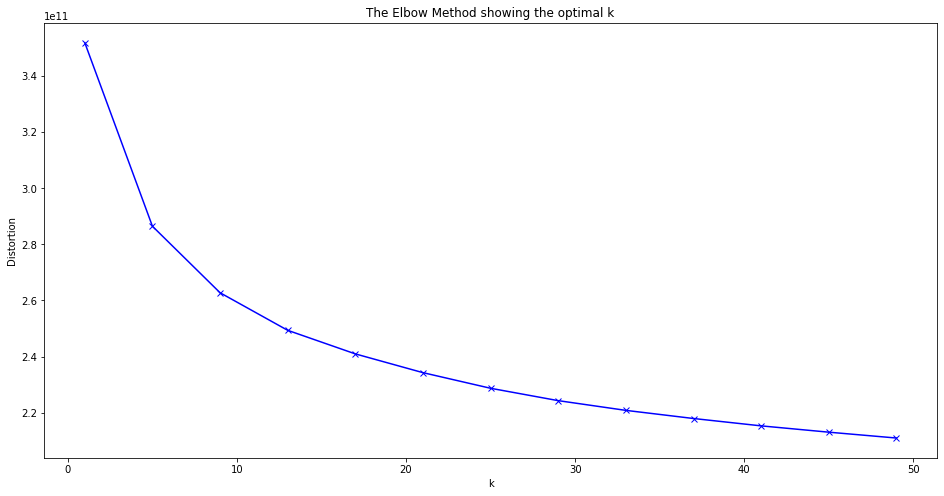

In [66]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Optimal K for SURF

In [85]:
distortions = []
K = range(1,50, 4)
for k in tqdm(K, total=len(K)):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(datasurf)
    distortions.append(kmeanModel.inertia_)
    print("For K =" + str(k) + " " + str(kmeanModel.inertia_))
    print("Done!")

  0%|          | 0/13 [00:00<?, ?it/s]

For K =1 3538958.1285413196
Done!
For K =5 2597931.3358593066
Done!
For K =9 2363781.1811329448
Done!
For K =13 2244953.339071866
Done!
For K =17 2155251.446553179
Done!
For K =21 2091029.260533390
Done!
For K =25 2038598.480607045
Done!
For K =29 1993955.252851038
Done!
For K =33 1949312.030607045
Done!
For K =37 1905311.811329448
Done!
For K =41 1861668.572851038
Done!
For K =45 1818668.340611451
Done!
For K =49 1776668.113294480
Done!


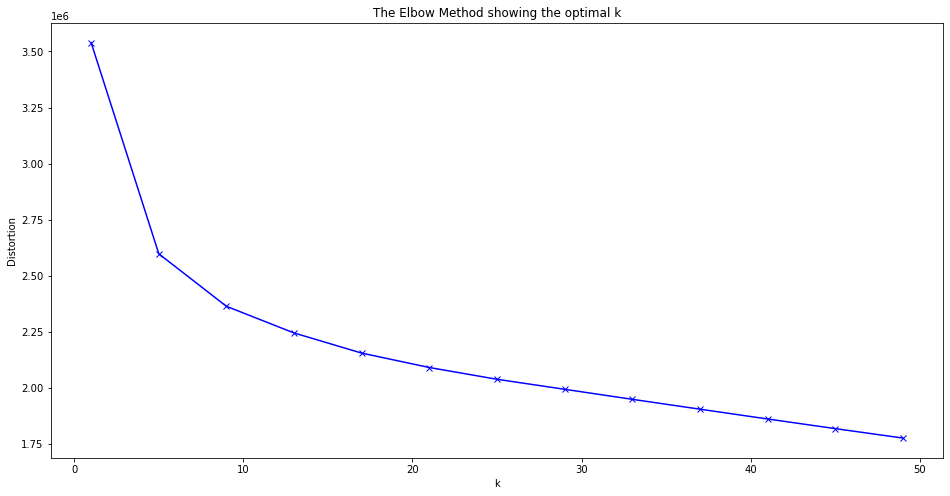

In [3]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Kmeans

In [25]:
kmeansift = KMeans(n_clusters=18)
kmeansift.fit(datasift)

KMeans(n_clusters=18)

In [26]:
# save the model to disk
filename = 'Kmeans_Model_SIFT.sav'
pickle.dump(kmeansift, open(filename, 'wb'))

In [27]:
hist=np.histogram(kmeansift.labels_,bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([169610, 237387, 403146, 210761, 235519, 288219, 160128, 277868,
       276582, 456170, 396533, 215544, 339823, 143846, 363864, 286195,
       399873, 354329], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])) 



In [29]:
kmeansurf = KMeans(n_clusters=18)
kmeansurf.fit(datasurf)

KMeans(n_clusters=18)

In [30]:
# save the model to disk
filename = 'Kmeans_Model_SURF.sav'
pickle.dump(kmeansurf, open(filename, 'wb'))

In [31]:
hist=np.histogram(kmeansurf.labels_,bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([728694, 440545, 464208, 508034, 527195, 557926, 506956, 552369,
       469879, 459603, 558111, 512288, 544724, 576923, 910186, 586880,
       485619, 320239], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])) 



In [28]:
pretrained_model_sift = pickle.load(open('Kmeans_Model_SIFT.sav', 'rb'))

In [29]:
pretrained_model_surf = pickle.load(open('Kmeans_Model_SURF.sav', 'rb'))

# Kmeans prediction using pretrained SIFT and SURF models on Training dataset

In [34]:
#performing kmeans prediction of the entire car dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data1=[]
#k=0

for filename in tqdm(os.listdir(folder1)):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints_sift, descriptors_sift = sift.detectAndCompute(img_prewitt, None)
    
    out_sift = pd.DataFrame(descriptors_sift)
    
    #predict values of feature vector with pretrained sift kmeans
    
    array_double = np.array(out_sift, dtype=np.double)

    a1=pretrained_model_sift.predict(array_double)
    
    hist=np.histogram(a1, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out_sift.shape[0]
    
    surf = cv2.xfeatures2d.SURF_create()
    surf.setExtended(True)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img_prewitt, None)
    
    out_surf = pd.DataFrame(descriptors_surf)
    
    #predict values of feature vector with pretrained surf kmeans
    
    array_double2 = np.array(out_surf, dtype=np.double)
    a2=pretrained_model_surf.predict(array_double2)
    
    hist2=np.histogram(a2, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    hist_list2 = list(hist2)
    hist_list2[0] = hist_list2[0]/out_surf.shape[0]
    
    #append the dataframe into the array in append mode, the array will only have 36 values which will store the values in a row
    hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None)
    hist_new
    data1.append(hist_new)
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\CV_project_data\Final_Negative_SIFT_SURF.csv', mode='a',header=False,index=False)

  0%|          | 0/4000 [00:00<?, ?it/s]

In [35]:
Output

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,0.045506,0.035267,0.085324,0.069397,0.040956,0.040956,0.030717,0.034130,0.053470,0.103527,...,0.040161,0.064257,0.045181,0.053715,0.057731,0.054217,0.081827,0.032129,0.022088,0
1,0.034298,0.046088,0.054662,0.066452,0.051447,0.030011,0.023580,0.056806,0.054662,0.049303,...,0.048193,0.062860,0.057622,0.068098,0.064955,0.110005,0.064432,0.043478,0.035621,0
2,0.026284,0.060335,0.013142,0.036440,0.029271,0.024492,0.017324,0.063321,0.076464,0.036440,...,0.026749,0.057202,0.063374,0.039918,0.068724,0.253909,0.024280,0.032099,0.015638,0
3,0.030435,0.047826,0.069565,0.047826,0.060870,0.065217,0.030435,0.047826,0.043478,0.073913,...,0.073733,0.050691,0.067588,0.072197,0.041475,0.055300,0.087558,0.049155,0.046083,0
4,0.061164,0.028003,0.049374,0.031688,0.086220,0.080324,0.047900,0.075166,0.046426,0.061901,...,0.083579,0.091445,0.102262,0.083579,0.082596,0.054081,0.054081,0.054081,0.034415,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.024470,0.022838,0.117455,0.057096,0.047308,0.079935,0.030995,0.050571,0.063622,0.091354,...,0.056430,0.042322,0.027130,0.056972,0.062398,0.018448,0.062398,0.056430,0.027672,0
3996,0.033790,0.050228,0.073059,0.028311,0.051142,0.074886,0.044749,0.048402,0.050228,0.098630,...,0.058223,0.074430,0.057623,0.066627,0.081032,0.047419,0.058223,0.056423,0.022809,0
3997,0.038809,0.039711,0.061372,0.051444,0.043321,0.062274,0.043321,0.055054,0.042419,0.070397,...,0.048739,0.071101,0.051032,0.092890,0.068807,0.044725,0.056766,0.064220,0.026376,0
3998,0.028387,0.030968,0.116129,0.056774,0.043871,0.061935,0.019355,0.040000,0.047742,0.123871,...,0.039704,0.057702,0.035998,0.049762,0.058761,0.023293,0.095818,0.065643,0.041292,0


In [36]:
#performing kmeans prediction of the entire dents dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data1=[]
#k=0
norm = Normalizer()
for filename in tqdm(os.listdir(folder2)):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints_sift, descriptors_sift = sift.detectAndCompute(img_prewitt, None)
    out_sift = pd.DataFrame(descriptors_sift)
    
    surf = cv2.xfeatures2d.SURF_create()
    surf.setExtended(True)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img_prewitt, None)
    out_surf = pd.DataFrame(descriptors_surf)

    try:
        #predict values of feature vector with pretrained sift kmeans
    
        array_double = np.array(out_sift, dtype=np.double)
    
        a1=pretrained_model_sift.predict(array_double)
    
        hist=np.histogram(a1, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list = list(hist)
        hist_list[0] = hist_list[0]/out_sift.shape[0]
        
        #predict values of feature vector with pretrained surf kmeans    

        array_double2 = np.array(out_surf, dtype=np.double)
        a2=pretrained_model_surf.predict(array_double2)
    
        hist2=np.histogram(a2, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list2 = list(hist2)
        hist_list2[0] = hist_list2[0]/out_surf.shape[0]
    
        #append the dataframe into the array in append mode, the array will only have 36 values which will store the values in a row
        hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None)
        hist_new
        data1.append(hist_new)
    except:
        print("Can't read image: " + str(filename))
        os.remove(path)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\CV_project_data\Final_Dents_SIFT_SURF.csv', mode='a',header=False,index=False)

  0%|          | 0/2041 [00:00<?, ?it/s]

In [37]:
Output

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,0.030864,0.055556,0.152263,0.018519,0.030864,0.045267,0.080247,0.010288,0.034979,0.125514,...,0.054545,0.057143,0.036364,0.044156,0.096104,0.072727,0.033766,0.077922,0.072727,1
1,0.100917,0.000000,0.321101,0.009174,0.100917,0.018349,0.018349,0.018349,0.000000,0.302752,...,0.110215,0.013441,0.010753,0.034946,0.016129,0.000000,0.032258,0.129032,0.145161,1
2,0.036364,0.029545,0.159091,0.031818,0.054545,0.036364,0.020455,0.052273,0.031818,0.186364,...,0.043040,0.039377,0.053114,0.065934,0.056777,0.025641,0.064103,0.070513,0.060440,1
3,0.007353,0.000000,0.246324,0.018382,0.033088,0.073529,0.062500,0.040441,0.033088,0.202206,...,0.024081,0.008872,0.010139,0.040558,0.010139,0.002535,0.044360,0.030418,0.039290,1
4,0.000000,0.019231,0.288462,0.000000,0.000000,0.019231,0.019231,0.038462,0.000000,0.403846,...,0.039506,0.004938,0.004938,0.004938,0.007407,0.002469,0.054321,0.014815,0.049383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,0.027322,0.021858,0.240437,0.032787,0.032787,0.054645,0.054645,0.032787,0.032787,0.185792,...,0.095499,0.013172,0.012075,0.042810,0.012075,0.001098,0.084523,0.072448,0.029638,1
2037,0.024390,0.012195,0.085366,0.012195,0.024390,0.085366,0.036585,0.060976,0.012195,0.158537,...,0.051331,0.009506,0.047529,0.026616,0.017110,0.007605,0.064639,0.028517,0.020913,1
2038,0.029412,0.000000,0.176471,0.000000,0.000000,0.000000,0.166667,0.009804,0.009804,0.225490,...,0.025316,0.000000,0.000000,0.006329,0.000000,0.000000,0.107595,0.050633,0.113924,1
2039,0.030612,0.003401,0.425170,0.010204,0.013605,0.023810,0.023810,0.013605,0.017007,0.200680,...,0.034899,0.013423,0.009396,0.017450,0.013423,0.008054,0.059060,0.028188,0.040268,1


In [38]:
#performing kmeans prediction of the entire scratches dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data1=[]
#k=0
for filename in tqdm(os.listdir(folder3)):
    path=os.path.join(folder3,filename) 
    a=cv2.imread(path)
    
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints_sift, descriptors_sift = sift.detectAndCompute(img_prewitt, None)
    out_sift = pd.DataFrame(descriptors_sift)
    
    surf = cv2.xfeatures2d.SURF_create()
    surf.setExtended(True)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img_prewitt, None)
    out_surf = pd.DataFrame(descriptors_surf)

    try:
        #predict values of feature vector with pretrained sift kmeans
    
        array_double = np.array(out_sift, dtype=np.double)
    
        a1=pretrained_model_sift.predict(array_double)
    
        hist=np.histogram(a1, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list = list(hist)
        hist_list[0] = hist_list[0]/out_sift.shape[0]
        
        #predict values of feature vector with pretrained surf kmeans    

        array_double2 = np.array(out_surf, dtype=np.double)
        a2=pretrained_model_surf.predict(array_double2)
    
        hist2=np.histogram(a2, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list2 = list(hist2)
        hist_list2[0] = hist_list2[0]/out_surf.shape[0]
    
        #append the dataframe into the array in append mode, the array will only have 36 values which will store the values in a row
        hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None)
        hist_new
        data1.append(hist_new)
    except:
        print("Can't read image: " + str(filename))
        os.remove(path)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\CV_project_data\Final_Scratches_SIFT_SURF.csv', mode='a',header=False,index=False)

  0%|          | 0/2018 [00:00<?, ?it/s]

Can't read image: 1295.jpg
Can't read image: 1532.jpg
Can't read image: 1747.jpg


In [39]:
Output

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,0.014177,0.101418,0.001091,0.028353,0.013086,0.005453,0.002181,0.076336,0.103599,0.013086,...,0.018039,0.066605,0.016189,0.031915,0.049029,0.408418,0.007401,0.031915,0.004163,2
1,0.008921,0.094079,0.000811,0.021087,0.004866,0.001622,0.000811,0.043796,0.097324,0.000000,...,0.003540,0.037657,0.005150,0.006437,0.034117,0.618925,0.001287,0.015449,0.000000,2
2,0.023425,0.083199,0.002423,0.025040,0.017771,0.011309,0.003231,0.041195,0.085622,0.016155,...,0.016949,0.039251,0.046833,0.032114,0.052186,0.452275,0.005798,0.028992,0.006244,2
3,0.016878,0.053446,0.022504,0.057665,0.045007,0.019691,0.007032,0.085795,0.087201,0.042194,...,0.024284,0.070984,0.067248,0.054172,0.039851,0.268991,0.048568,0.056663,0.008717,2
4,0.016598,0.113416,0.000692,0.024896,0.012448,0.005533,0.002766,0.055325,0.080221,0.012448,...,0.004537,0.049909,0.004235,0.021476,0.050514,0.520266,0.003630,0.033273,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0.000000,0.050847,0.000000,0.000000,0.016949,0.000000,0.016949,0.042373,0.067797,0.025424,...,0.022222,0.027778,0.016667,0.000000,0.072222,0.366667,0.038889,0.044444,0.016667,2
2011,0.011869,0.068249,0.000000,0.014837,0.005935,0.005935,0.002967,0.035608,0.053412,0.000000,...,0.008065,0.038710,0.019355,0.012903,0.058065,0.477419,0.001613,0.014516,0.004839,2
2012,0.017489,0.111805,0.001874,0.027483,0.008120,0.006871,0.005621,0.071830,0.084947,0.001874,...,0.003831,0.058429,0.004470,0.013410,0.053640,0.506066,0.001277,0.017241,0.000000,2
2013,0.017460,0.076190,0.001587,0.022222,0.019048,0.007937,0.001587,0.052381,0.071429,0.012698,...,0.014310,0.040404,0.029461,0.031145,0.054714,0.368687,0.025253,0.028620,0.000842,2


## Final CSVs

In [40]:
#Displaying the kmeans predicted data
print("Negative Images")
dat1= pd.read_csv(r'D:\CV_project_data\Final_Negative_SIFT_SURF.csv',header=None)
print(dat1)

Negative Images
            0         1         2         3         4         5         6   \
0     0.045506  0.035267  0.085324  0.069397  0.040956  0.040956  0.030717   
1     0.034298  0.046088  0.054662  0.066452  0.051447  0.030011  0.023580   
2     0.026284  0.060335  0.013142  0.036440  0.029271  0.024492  0.017324   
3     0.030435  0.047826  0.069565  0.047826  0.060870  0.065217  0.030435   
4     0.061164  0.028003  0.049374  0.031688  0.086220  0.080324  0.047900   
...        ...       ...       ...       ...       ...       ...       ...   
3995  0.024470  0.022838  0.117455  0.057096  0.047308  0.079935  0.030995   
3996  0.033790  0.050228  0.073059  0.028311  0.051142  0.074886  0.044749   
3997  0.038809  0.039711  0.061372  0.051444  0.043321  0.062274  0.043321   
3998  0.028387  0.030968  0.116129  0.056774  0.043871  0.061935  0.019355   
3999  0.029563  0.043702  0.093830  0.065553  0.035990  0.056555  0.024422   

            7         8         9   ...        

In [41]:
print("Dents")
dat2= pd.read_csv(r'D:\CV_project_data\Final_Dents_SIFT_SURF.csv',header=None)
print(dat2)

Dents
            0         1         2         3         4         5         6   \
0     0.030864  0.055556  0.152263  0.018519  0.030864  0.045267  0.080247   
1     0.100917  0.000000  0.321101  0.009174  0.100917  0.018349  0.018349   
2     0.036364  0.029545  0.159091  0.031818  0.054545  0.036364  0.020455   
3     0.007353  0.000000  0.246324  0.018382  0.033088  0.073529  0.062500   
4     0.000000  0.019231  0.288462  0.000000  0.000000  0.019231  0.019231   
...        ...       ...       ...       ...       ...       ...       ...   
2036  0.027322  0.021858  0.240437  0.032787  0.032787  0.054645  0.054645   
2037  0.024390  0.012195  0.085366  0.012195  0.024390  0.085366  0.036585   
2038  0.029412  0.000000  0.176471  0.000000  0.000000  0.000000  0.166667   
2039  0.030612  0.003401  0.425170  0.010204  0.013605  0.023810  0.023810   
2040  0.000000  0.000000  0.422857  0.005714  0.011429  0.045714  0.000000   

            7         8         9   ...        27        

In [42]:
print("Scratches")
dat3= pd.read_csv(r'D:\CV_project_data\Final_Scratches_SIFT_SURF.csv',header=None)
print(dat3)

Scratches
            0         1         2         3         4         5         6   \
0     0.014177  0.101418  0.001091  0.028353  0.013086  0.005453  0.002181   
1     0.008921  0.094079  0.000811  0.021087  0.004866  0.001622  0.000811   
2     0.023425  0.083199  0.002423  0.025040  0.017771  0.011309  0.003231   
3     0.016878  0.053446  0.022504  0.057665  0.045007  0.019691  0.007032   
4     0.016598  0.113416  0.000692  0.024896  0.012448  0.005533  0.002766   
...        ...       ...       ...       ...       ...       ...       ...   
2010  0.000000  0.050847  0.000000  0.000000  0.016949  0.000000  0.016949   
2011  0.011869  0.068249  0.000000  0.014837  0.005935  0.005935  0.002967   
2012  0.017489  0.111805  0.001874  0.027483  0.008120  0.006871  0.005621   
2013  0.017460  0.076190  0.001587  0.022222  0.019048  0.007937  0.001587   
2014  0.023847  0.057234  0.027027  0.033386  0.047695  0.020668  0.012719   

            7         8         9   ...        27    

In [43]:
#appending All classes into 1 csv file

A=dat1.append(dat2)
A=A.append(dat3)
csv_data=A.to_csv('D:\CV_project_data\Final_Features.csv', mode='a',header=False,index=False)

In [44]:
A = pd.read_csv(r'D:\CV_project_data\Final_Features.csv',header=None)

In [45]:
A

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.045506,0.035267,0.085324,0.069397,0.040956,0.040956,0.030717,0.034130,0.053470,0.103527,...,0.040161,0.064257,0.045181,0.053715,0.057731,0.054217,0.081827,0.032129,0.022088,0
1,0.034298,0.046088,0.054662,0.066452,0.051447,0.030011,0.023580,0.056806,0.054662,0.049303,...,0.048193,0.062860,0.057622,0.068098,0.064955,0.110005,0.064432,0.043478,0.035621,0
2,0.026284,0.060335,0.013142,0.036440,0.029271,0.024492,0.017324,0.063321,0.076464,0.036440,...,0.026749,0.057202,0.063374,0.039918,0.068724,0.253909,0.024280,0.032099,0.015638,0
3,0.030435,0.047826,0.069565,0.047826,0.060870,0.065217,0.030435,0.047826,0.043478,0.073913,...,0.073733,0.050691,0.067588,0.072197,0.041475,0.055300,0.087558,0.049155,0.046083,0
4,0.061164,0.028003,0.049374,0.031688,0.086220,0.080324,0.047900,0.075166,0.046426,0.061901,...,0.083579,0.091445,0.102262,0.083579,0.082596,0.054081,0.054081,0.054081,0.034415,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,0.000000,0.050847,0.000000,0.000000,0.016949,0.000000,0.016949,0.042373,0.067797,0.025424,...,0.022222,0.027778,0.016667,0.000000,0.072222,0.366667,0.038889,0.044444,0.016667,2
8052,0.011869,0.068249,0.000000,0.014837,0.005935,0.005935,0.002967,0.035608,0.053412,0.000000,...,0.008065,0.038710,0.019355,0.012903,0.058065,0.477419,0.001613,0.014516,0.004839,2
8053,0.017489,0.111805,0.001874,0.027483,0.008120,0.006871,0.005621,0.071830,0.084947,0.001874,...,0.003831,0.058429,0.004470,0.013410,0.053640,0.506066,0.001277,0.017241,0.000000,2
8054,0.017460,0.076190,0.001587,0.022222,0.019048,0.007937,0.001587,0.052381,0.071429,0.012698,...,0.014310,0.040404,0.029461,0.031145,0.054714,0.368687,0.025253,0.028620,0.000842,2


In [46]:
x = A.iloc[:,0:36].values   #getting the first 36 values of dataframe A into x

In [47]:
x

array([[0.04550626, 0.03526735, 0.08532423, ..., 0.08182731, 0.03212851,
        0.02208835],
       [0.03429796, 0.04608789, 0.05466238, ..., 0.06443164, 0.04347826,
        0.03562074],
       [0.02628435, 0.06033453, 0.01314217, ..., 0.02427984, 0.03209877,
        0.01563786],
       ...,
       [0.01748907, 0.11180512, 0.00187383, ..., 0.00127714, 0.01724138,
        0.        ],
       [0.01746032, 0.07619048, 0.0015873 , ..., 0.02525253, 0.02861953,
        0.00084175],
       [0.02384738, 0.0572337 , 0.02702703, ..., 0.03278689, 0.0342772 ,
        0.00894188]])

In [48]:
y = A.iloc[:,36].values        #getting the last 37th column values in y as target variable

In [49]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

# Dimensionality reduction using PCA

In [50]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [51]:
Dhoni

array([[ 0.77232295,  0.04045763, -0.30651494, ...,  0.49813454,
        -0.6858713 , -0.50645008],
       [ 0.23748907,  0.48770128, -0.55926664, ..., -0.02235479,
        -0.24869932, -0.10482079],
       [-0.14490212,  1.07655538, -0.90152589, ..., -1.2237219 ,
        -0.68701717, -0.69789498],
       ...,
       [-0.56459256,  3.20398132, -0.99441308, ..., -1.91197697,
        -1.25929715, -1.16201274],
       [-0.56596453,  1.73192679, -0.99677498, ..., -1.19461841,
        -0.82103116, -1.13703033],
       [-0.26118881,  0.94838952, -0.78707031, ..., -0.96918564,
        -0.60310783, -0.89662577]])

In [44]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=None)
#pca.fit(Dhoni)
pca.fit(x)

PCA()

In [54]:
Bhumi = pca.transform(x)

In [55]:
Bhumi

array([[-2.39493114e-02, -2.83131042e-02, -3.02069876e-02, ...,
         1.23197674e-04, -6.43100793e-17,  5.17967127e-17],
       [-1.34305999e-01, -3.56337985e-02, -1.22978955e-02, ...,
         4.70273329e-03, -5.66303869e-17,  2.49400596e-17],
       [-2.86228141e-01,  1.01197032e-01, -7.25305791e-03, ...,
        -3.29006657e-03, -2.43279274e-17, -1.40606891e-17],
       ...,
       [-4.62121783e-01,  2.97772031e-01,  1.09941261e-02, ...,
        -1.47596516e-03, -1.65129710e-17,  4.76032176e-17],
       [-4.10374248e-01,  2.43532476e-01,  1.21560083e-02, ...,
        -7.08645545e-03,  7.64837858e-17, -3.64677441e-17],
       [-2.95113572e-01,  1.11814204e-01, -3.30542898e-03, ...,
         1.15628006e-02, -7.41270061e-18,  3.71501497e-17]])

In [56]:
Bhumi = pd.DataFrame(Bhumi)

In [57]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.023949,-0.028313,-0.030207,-0.043511,-0.016211,0.002834,-0.024167,0.001720,-0.026007,-0.014802,...,-0.013869,0.015154,0.009776,-0.000870,-0.013377,-0.008900,-0.008112,0.000123,-6.431008e-17,5.179671e-17
1,-0.134306,-0.035634,-0.012298,-0.011226,-0.031849,0.012514,-0.020379,-0.030930,-0.008288,0.006515,...,0.004899,0.006714,0.016261,0.006289,0.000319,0.001454,0.001749,0.004703,-5.663039e-17,2.494006e-17
2,-0.286228,0.101197,-0.007253,0.008525,0.018092,0.017270,0.010840,-0.014074,-0.007968,0.004184,...,0.010414,0.000541,0.000659,0.002313,-0.000131,0.001703,0.007125,-0.003290,-2.432793e-17,-1.406069e-17
3,-0.050789,-0.075265,-0.004524,0.002613,-0.028164,-0.038997,-0.011950,0.027984,-0.023509,0.010596,...,0.010152,-0.002214,0.011183,0.008918,-0.000693,0.016006,-0.003617,0.001861,-5.476458e-17,-4.502137e-18
4,-0.078769,-0.141327,0.002100,0.047809,0.040549,0.012619,0.031189,-0.026843,-0.037876,0.000286,...,-0.003267,-0.017292,-0.004254,-0.020635,-0.004684,-0.006379,-0.009278,-0.000776,2.808749e-17,1.507756e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,-0.380073,0.263549,0.044032,0.007351,0.033108,-0.022959,-0.035596,0.048076,0.056803,-0.000964,...,-0.031745,-0.005096,-0.014997,-0.015913,-0.008435,-0.018502,0.026339,-0.017244,-4.838788e-17,-7.403810e-17
8052,-0.499246,0.347824,0.014631,0.057213,0.019706,-0.017193,0.018756,0.041708,0.059141,-0.011064,...,-0.011697,0.003450,0.012851,-0.003899,0.002185,-0.001230,0.003047,0.006899,-2.346341e-17,-5.749476e-18
8053,-0.462122,0.297772,0.010994,0.033180,0.002144,0.001259,0.018124,0.021188,0.036156,-0.056995,...,0.002163,-0.003414,0.003108,0.010956,0.008258,0.024426,-0.004588,-0.001476,-1.651297e-17,4.760322e-17
8054,-0.410374,0.243532,0.012156,0.022009,-0.005514,-0.017218,0.014908,0.034215,0.008387,-0.012099,...,-0.013723,-0.000044,0.010727,0.018998,0.002592,0.006947,0.010928,-0.007086,7.648379e-17,-3.646774e-17


In [58]:
Bhumi.shape

(8056, 36)

## Calculating number of components required

In [59]:
print(pca.explained_variance_ratio_) 

[4.05297502e-01 1.27459686e-01 1.01575499e-01 6.39755208e-02
 4.77471399e-02 3.99011647e-02 2.82624222e-02 2.47400092e-02
 2.05043718e-02 1.40568530e-02 1.12152313e-02 1.09634391e-02
 1.06371566e-02 8.79970449e-03 8.33689529e-03 8.10590136e-03
 7.36486472e-03 6.23657184e-03 5.89306079e-03 5.59786814e-03
 5.26117566e-03 4.43827687e-03 4.34352939e-03 4.22466791e-03
 3.65706812e-03 3.45281476e-03 3.01857847e-03 2.99160256e-03
 2.95836082e-03 2.30115604e-03 2.02935430e-03 1.83742192e-03
 1.47126924e-03 1.34386202e-03 4.50845401e-32 2.74065677e-32]


In [60]:
#pca = PCA(n_components=18)
#pca.fit(Dhoni)

Text(0, 0.5, 'cumulative explained variance')

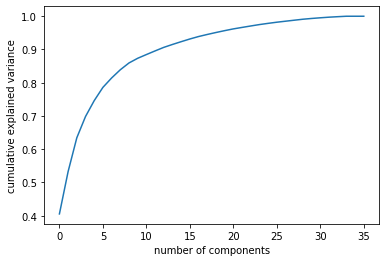

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [62]:
l = pca.explained_variance_ratio_
l = l[:26]
l.sum()

0.9820483946270955

In [64]:
pca = PCA(n_components=26)
pca.fit(x)

PCA(n_components=26)

In [65]:
# save the model to disk
filename = 'PCA_Model_26.sav'
pickle.dump(pca, open(filename, 'wb'))

## Reducing the dimensions from 36 to 26

In [66]:
Bhumi = pca.transform(x)

In [67]:
Bhumi

array([[-0.02394931, -0.0283131 , -0.03020699, ..., -0.01155114,
        -0.00092545,  0.00154928],
       [-0.134306  , -0.0356338 , -0.0122979 , ..., -0.01844272,
        -0.01083112,  0.00859227],
       [-0.28622814,  0.10119703, -0.00725306, ...,  0.00912253,
        -0.00249164,  0.00136931],
       ...,
       [-0.46212178,  0.29777203,  0.01099413, ...,  0.00130205,
         0.00376209, -0.01265611],
       [-0.41037425,  0.24353248,  0.01215601, ..., -0.00271428,
         0.00064004, -0.00245106],
       [-0.29511357,  0.1118142 , -0.00330543, ...,  0.00090607,
         0.00965572,  0.05671821]])

In [68]:
Bhumi.shape

(8056, 26)

In [69]:
Bhumi = pd.DataFrame(Bhumi)

In [70]:
print(pca.explained_variance_ratio_.sum()) 

0.9820483946270959


In [71]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.023949,-0.028313,-0.030207,-0.043511,-0.016211,0.002834,-0.024167,0.001720,-0.026007,-0.014802,...,-0.008440,-0.006231,0.022655,0.022840,-0.014723,0.011340,-0.008943,-0.011551,-0.000925,0.001549
1,-0.134306,-0.035634,-0.012298,-0.011226,-0.031849,0.012514,-0.020379,-0.030930,-0.008288,0.006515,...,-0.024140,-0.001901,0.010302,0.009328,0.003893,-0.008208,-0.024158,-0.018443,-0.010831,0.008592
2,-0.286228,0.101197,-0.007253,0.008525,0.018092,0.017270,0.010840,-0.014074,-0.007968,0.004184,...,-0.020139,-0.005664,0.002445,-0.008305,-0.000102,-0.004021,-0.004558,0.009123,-0.002492,0.001369
3,-0.050789,-0.075265,-0.004524,0.002613,-0.028164,-0.038997,-0.011950,0.027984,-0.023509,0.010596,...,-0.005219,0.008409,0.011313,0.012753,-0.014125,0.013455,-0.014886,-0.005571,-0.003606,0.006254
4,-0.078769,-0.141327,0.002100,0.047809,0.040549,0.012619,0.031189,-0.026843,-0.037876,0.000286,...,0.007038,0.002800,-0.017748,0.000187,0.004871,-0.005866,0.001620,-0.013330,0.036793,0.005678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,-0.380073,0.263549,0.044032,0.007351,0.033108,-0.022959,-0.035596,0.048076,0.056803,-0.000964,...,0.044873,0.017584,-0.003811,0.036438,-0.012367,-0.044228,0.037906,-0.009971,-0.023647,0.005620
8052,-0.499246,0.347824,0.014631,0.057213,0.019706,-0.017193,0.018756,0.041708,0.059141,-0.011064,...,0.003352,0.011639,-0.010972,0.031070,-0.011081,0.021807,0.004672,-0.015227,0.011469,-0.006901
8053,-0.462122,0.297772,0.010994,0.033180,0.002144,0.001259,0.018124,0.021188,0.036156,-0.056995,...,-0.000776,-0.026844,0.003452,-0.011021,-0.006440,-0.046595,0.019788,0.001302,0.003762,-0.012656
8054,-0.410374,0.243532,0.012156,0.022009,-0.005514,-0.017218,0.014908,0.034215,0.008387,-0.012099,...,0.015541,0.004434,-0.004961,0.018030,0.002061,0.036012,-0.009491,-0.002714,0.000640,-0.002451


In [72]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)

In [73]:
B

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,0
0,-0.023949,-0.028313,-0.030207,-0.043511,-0.016211,0.002834,-0.024167,0.001720,-0.026007,-0.014802,...,-0.006231,0.022655,0.022840,-0.014723,0.011340,-0.008943,-0.011551,-0.000925,0.001549,0
1,-0.134306,-0.035634,-0.012298,-0.011226,-0.031849,0.012514,-0.020379,-0.030930,-0.008288,0.006515,...,-0.001901,0.010302,0.009328,0.003893,-0.008208,-0.024158,-0.018443,-0.010831,0.008592,0
2,-0.286228,0.101197,-0.007253,0.008525,0.018092,0.017270,0.010840,-0.014074,-0.007968,0.004184,...,-0.005664,0.002445,-0.008305,-0.000102,-0.004021,-0.004558,0.009123,-0.002492,0.001369,0
3,-0.050789,-0.075265,-0.004524,0.002613,-0.028164,-0.038997,-0.011950,0.027984,-0.023509,0.010596,...,0.008409,0.011313,0.012753,-0.014125,0.013455,-0.014886,-0.005571,-0.003606,0.006254,0
4,-0.078769,-0.141327,0.002100,0.047809,0.040549,0.012619,0.031189,-0.026843,-0.037876,0.000286,...,0.002800,-0.017748,0.000187,0.004871,-0.005866,0.001620,-0.013330,0.036793,0.005678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,-0.380073,0.263549,0.044032,0.007351,0.033108,-0.022959,-0.035596,0.048076,0.056803,-0.000964,...,0.017584,-0.003811,0.036438,-0.012367,-0.044228,0.037906,-0.009971,-0.023647,0.005620,2
8052,-0.499246,0.347824,0.014631,0.057213,0.019706,-0.017193,0.018756,0.041708,0.059141,-0.011064,...,0.011639,-0.010972,0.031070,-0.011081,0.021807,0.004672,-0.015227,0.011469,-0.006901,2
8053,-0.462122,0.297772,0.010994,0.033180,0.002144,0.001259,0.018124,0.021188,0.036156,-0.056995,...,-0.026844,0.003452,-0.011021,-0.006440,-0.046595,0.019788,0.001302,0.003762,-0.012656,2
8054,-0.410374,0.243532,0.012156,0.022009,-0.005514,-0.017218,0.014908,0.034215,0.008387,-0.012099,...,0.004434,-0.004961,0.018030,0.002061,0.036012,-0.009491,-0.002714,0.000640,-0.002451,2


In [74]:
csv_data=B.to_csv('D:\CV_project_data\PCA_26_Features.csv', mode='a',header=False,index=False)

# Kmeans prediction using pretrained SIFT and SURF models on Testing dataset

In [26]:
folder4=r"D:\CV_project_data\Final_Dataset\Testing\Negative"
folder5=r"D:\CV_project_data\Final_Dataset\Testing\Dents"
folder6=r"D:\CV_project_data\Final_Dataset\Testing\Scratches_New"

In [27]:
#performing kmeans prediction of the entire car dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data1=[]
#k=0

for filename in tqdm(os.listdir(folder4)):
    #path
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints_sift, descriptors_sift = sift.detectAndCompute(img_prewitt, None)
    out_sift = pd.DataFrame(descriptors_sift)
    
    surf = cv2.xfeatures2d.SURF_create()
    surf.setExtended(True)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img_prewitt, None)
    out_surf = pd.DataFrame(descriptors_surf)

    try:
        #predict values of feature vector with pretrained sift kmeans
    
        array_double = np.array(out_sift, dtype=np.double)
    
        a1=pretrained_model_sift.predict(array_double)
    
        hist=np.histogram(a1, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list = list(hist)
        hist_list[0] = hist_list[0]/out_sift.shape[0]
        
        #predict values of feature vector with pretrained surf kmeans    

        array_double2 = np.array(out_surf, dtype=np.double)
        a2=pretrained_model_surf.predict(array_double2)
    
        hist2=np.histogram(a2, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list2 = list(hist2)
        hist_list2[0] = hist_list2[0]/out_surf.shape[0]
    
        #append the dataframe into the array in append mode, the array will only have 36 values which will store the values in a row
        hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None)
        hist_new
        data1.append(hist_new)
    except:
        print("Can't read image: " + str(filename))
        os.remove(path)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\CV_project_data\Test_Negative_SIFT_SURF.csv', mode='a',header=False,index=False)

  0%|          | 0/800 [00:00<?, ?it/s]

In [28]:
Output

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,0.048940,0.034258,0.092985,0.035889,0.070147,0.047308,0.042414,0.039152,0.044046,0.172920,...,0.057870,0.075231,0.052083,0.065972,0.052083,0.034722,0.083333,0.057870,0.050926,0
1,0.043301,0.080065,0.035948,0.058824,0.044118,0.023693,0.015523,0.073529,0.102124,0.072712,...,0.022590,0.071400,0.068979,0.070190,0.080678,0.138362,0.047600,0.035095,0.014522,0
2,0.038793,0.043103,0.032328,0.052802,0.044181,0.038793,0.014009,0.065733,0.059267,0.047414,...,0.037171,0.083118,0.059886,0.056273,0.087765,0.130614,0.047496,0.054208,0.031492,0
3,0.025812,0.059950,0.047460,0.039967,0.029142,0.035803,0.038301,0.040799,0.056619,0.040799,...,0.042151,0.046996,0.026163,0.038275,0.075581,0.166667,0.051357,0.034884,0.030523,0
4,0.027534,0.025031,0.111389,0.052566,0.050063,0.065081,0.033792,0.045056,0.042553,0.100125,...,0.045730,0.059180,0.080699,0.059852,0.069267,0.055145,0.070612,0.065232,0.039677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.023256,0.062791,0.034109,0.043411,0.039535,0.038760,0.034109,0.051163,0.060465,0.056589,...,0.047790,0.094553,0.054471,0.056012,0.076567,0.088386,0.030319,0.073484,0.029291,0
796,0.019332,0.048330,0.051845,0.050088,0.034271,0.039543,0.021968,0.042179,0.068541,0.067663,...,0.038337,0.073441,0.060508,0.059122,0.063741,0.094688,0.055427,0.057275,0.034180,0
797,0.042038,0.091720,0.020382,0.042675,0.036306,0.034395,0.024841,0.061146,0.071975,0.037580,...,0.042779,0.084772,0.040424,0.047881,0.093799,0.106358,0.038069,0.045918,0.015699,0
798,0.021250,0.016250,0.152500,0.037500,0.056250,0.077500,0.028750,0.048750,0.045000,0.146250,...,0.050243,0.055105,0.044571,0.078606,0.045381,0.045381,0.064019,0.064019,0.050243,0


In [29]:
#performing kmeans prediction of the entire dents dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data1=[]
#k=0
for filename in tqdm(os.listdir(folder5)):
    path=os.path.join(folder5,filename)
    a=cv2.imread(path)
    
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints_sift, descriptors_sift = sift.detectAndCompute(img_prewitt, None)
    out_sift = pd.DataFrame(descriptors_sift)
    
    surf = cv2.xfeatures2d.SURF_create()
    surf.setExtended(True)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img_prewitt, None)
    out_surf = pd.DataFrame(descriptors_surf)

    try:
        #predict values of feature vector with pretrained sift kmeans
    
        array_double = np.array(out_sift, dtype=np.double)
    
        a1=pretrained_model_sift.predict(array_double)
    
        hist=np.histogram(a1, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list = list(hist)
        hist_list[0] = hist_list[0]/out_sift.shape[0]
        
        #predict values of feature vector with pretrained surf kmeans    

        array_double2 = np.array(out_surf, dtype=np.double)
        a2=pretrained_model_surf.predict(array_double2)
    
        hist2=np.histogram(a2, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list2 = list(hist2)
        hist_list2[0] = hist_list2[0]/out_surf.shape[0]
    
        #append the dataframe into the array in append mode, the array will only have 36 values which will store the values in a row
        hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None)
        hist_new
        data1.append(hist_new)
    except:
        print("Can't read image: " + str(filename))
        os.remove(path)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\CV_project_data\Test_Dents_SIFT_SURF.csv', mode='a',header=False,index=False)

  0%|          | 0/608 [00:00<?, ?it/s]

In [30]:
Output

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,0.027027,0.012012,0.243243,0.006006,0.012012,0.027027,0.066066,0.003003,0.012012,0.390390,...,0.013619,0.009728,0.005837,0.025292,0.001946,0.000000,0.068093,0.029183,0.134241,1
1,0.035556,0.017778,0.071111,0.037778,0.071111,0.120000,0.040000,0.057778,0.064444,0.057778,...,0.082902,0.085492,0.119171,0.093264,0.049223,0.041451,0.046632,0.069948,0.044041,1
2,0.000000,0.000000,0.493151,0.000000,0.000000,0.013699,0.013699,0.013699,0.000000,0.397260,...,0.030303,0.015152,0.000000,0.000000,0.015152,0.000000,0.136364,0.015152,0.075758,1
3,0.022727,0.000000,0.306818,0.011364,0.022727,0.147727,0.022727,0.011364,0.000000,0.238636,...,0.134921,0.011905,0.007937,0.063492,0.023810,0.003968,0.071429,0.075397,0.047619,1
4,0.000000,0.030928,0.247423,0.000000,0.020619,0.082474,0.010309,0.072165,0.030928,0.319588,...,0.112782,0.015038,0.037594,0.033835,0.018797,0.015038,0.045113,0.026316,0.048872,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.024691,0.000000,0.296296,0.000000,0.012346,0.098765,0.000000,0.000000,0.000000,0.320988,...,0.065217,0.004658,0.004658,0.010870,0.006211,0.000000,0.138199,0.024845,0.015528,1
604,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.555556,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,1
605,0.017391,0.000000,0.452174,0.000000,0.017391,0.017391,0.034783,0.008696,0.000000,0.121739,...,0.049383,0.024691,0.000000,0.024691,0.000000,0.000000,0.111111,0.098765,0.098765,1
606,0.000000,0.000000,0.600000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.320000,...,0.056338,0.000000,0.000000,0.000000,0.000000,0.000000,0.042254,0.028169,0.154930,1


In [31]:
#performing kmeans prediction of the entire scratches dataset with the pretrained kmeans model

#initialising i=2; as its the 3rd class
i=2
data1=[]
#k=0
for filename in tqdm(os.listdir(folder6)):
    path=os.path.join(folder6,filename) 
    a=cv2.imread(path)
    
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints_sift, descriptors_sift = sift.detectAndCompute(img_prewitt, None)
    out_sift = pd.DataFrame(descriptors_sift)
    
    surf = cv2.xfeatures2d.SURF_create()
    surf.setExtended(True)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img_prewitt, None)
    out_surf = pd.DataFrame(descriptors_surf)

    try:
        #predict values of feature vector with pretrained sift kmeans
    
        array_double = np.array(out_sift, dtype=np.double)
    
        a1=pretrained_model_sift.predict(array_double)
    
        hist=np.histogram(a1, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list = list(hist)
        hist_list[0] = hist_list[0]/out_sift.shape[0]
        
        #predict values of feature vector with pretrained surf kmeans    

        array_double2 = np.array(out_surf, dtype=np.double)
        a2=pretrained_model_surf.predict(array_double2)
    
        hist2=np.histogram(a2, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        hist_list2 = list(hist2)
        hist_list2[0] = hist_list2[0]/out_surf.shape[0]
    
        #append the dataframe into the array in append mode, the array will only have 36 values which will store the values in a row
        hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None)
        hist_new
        data1.append(hist_new)
    except:
        print("Can't read image: " + str(filename))
        os.remove(path)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('D:\CV_project_data\Test_Scratches_SIFT_SURF.csv', mode='a',header=False,index=False)

  0%|          | 0/600 [00:00<?, ?it/s]

In [32]:
Output

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,0.029557,0.049261,0.162562,0.019704,0.014778,0.051724,0.012315,0.034483,0.049261,0.155172,...,0.042813,0.055046,0.047910,0.077472,0.034659,0.007136,0.084608,0.074414,0.048930,2
1,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.142857,...,0.017094,0.051282,0.102564,0.042735,0.051282,0.102564,0.068376,0.085470,0.008547,2
2,0.021523,0.054636,0.082781,0.016556,0.009934,0.001656,0.003311,0.041391,0.071192,0.087748,...,0.020086,0.035868,0.020086,0.012195,0.033716,0.322095,0.043759,0.014347,0.020803,2
3,0.000000,0.000000,0.050000,0.000000,0.025000,0.075000,0.050000,0.150000,0.025000,0.200000,...,0.104348,0.026087,0.060870,0.034783,0.008696,0.017391,0.173913,0.034783,0.034783,2
4,0.019737,0.092105,0.006579,0.019737,0.026316,0.019737,0.013158,0.065789,0.105263,0.006579,...,0.096899,0.042636,0.027132,0.065891,0.034884,0.255814,0.023256,0.062016,0.007752,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.000000,0.090909,0.000000,0.000000,0.181818,0.000000,0.090909,0.090909,0.272727,...,0.162500,0.025000,0.050000,0.075000,0.062500,0.037500,0.100000,0.112500,0.012500,2
596,0.035294,0.052941,0.058824,0.017647,0.052941,0.047059,0.023529,0.047059,0.041176,0.152941,...,0.042271,0.021739,0.050725,0.032609,0.026570,0.020531,0.124396,0.044686,0.026570,2
597,0.015625,0.026042,0.062500,0.015625,0.052083,0.000000,0.000000,0.046875,0.104167,0.151042,...,0.026852,0.021296,0.057407,0.033333,0.036111,0.100000,0.103704,0.039815,0.027778,2
598,0.000000,0.051948,0.181818,0.000000,0.038961,0.000000,0.012987,0.000000,0.000000,0.441558,...,0.037702,0.039497,0.010772,0.019749,0.010772,0.000000,0.025135,0.134650,0.037702,2


## Final CSVs

In [33]:
#Displaying the kmeans predicted data
print("Negative Images")
dat1= pd.read_csv(r'D:\CV_project_data\Test_Negative_SIFT_SURF.csv',header=None)
print(dat1)

Negative Images
           0         1         2         3         4         5         6   \
0    0.048940  0.034258  0.092985  0.035889  0.070147  0.047308  0.042414   
1    0.043301  0.080065  0.035948  0.058824  0.044118  0.023693  0.015523   
2    0.038793  0.043103  0.032328  0.052802  0.044181  0.038793  0.014009   
3    0.025812  0.059950  0.047460  0.039967  0.029142  0.035803  0.038301   
4    0.027534  0.025031  0.111389  0.052566  0.050063  0.065081  0.033792   
..        ...       ...       ...       ...       ...       ...       ...   
795  0.023256  0.062791  0.034109  0.043411  0.039535  0.038760  0.034109   
796  0.019332  0.048330  0.051845  0.050088  0.034271  0.039543  0.021968   
797  0.042038  0.091720  0.020382  0.042675  0.036306  0.034395  0.024841   
798  0.021250  0.016250  0.152500  0.037500  0.056250  0.077500  0.028750   
799  0.025701  0.058411  0.065421  0.052570  0.054907  0.072430  0.014019   

           7         8         9   ...        27        28 

In [34]:
print("Dents")
dat2= pd.read_csv(r'D:\CV_project_data\Test_Dents_SIFT_SURF.csv',header=None)
print(dat2)

Dents
           0         1         2         3         4         5         6   \
0    0.027027  0.012012  0.243243  0.006006  0.012012  0.027027  0.066066   
1    0.035556  0.017778  0.071111  0.037778  0.071111  0.120000  0.040000   
2    0.000000  0.000000  0.493151  0.000000  0.000000  0.013699  0.013699   
3    0.022727  0.000000  0.306818  0.011364  0.022727  0.147727  0.022727   
4    0.000000  0.030928  0.247423  0.000000  0.020619  0.082474  0.010309   
..        ...       ...       ...       ...       ...       ...       ...   
603  0.024691  0.000000  0.296296  0.000000  0.012346  0.098765  0.000000   
604  0.000000  0.000000  0.000000  0.333333  0.000000  0.333333  0.000000   
605  0.017391  0.000000  0.452174  0.000000  0.017391  0.017391  0.034783   
606  0.000000  0.000000  0.600000  0.000000  0.000000  0.040000  0.000000   
607  0.000000  0.036585  0.207317  0.000000  0.012195  0.060976  0.012195   

           7         8         9   ...        27        28        29 

In [35]:
print("Scratches")
dat3= pd.read_csv(r'D:\CV_project_data\Test_Scratches_SIFT_SURF.csv',header=None)
print(dat3)

Scratches
           0         1         2         3         4         5         6   \
0    0.029557  0.049261  0.162562  0.019704  0.014778  0.051724  0.012315   
1    0.000000  0.047619  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.021523  0.054636  0.082781  0.016556  0.009934  0.001656  0.003311   
3    0.000000  0.000000  0.050000  0.000000  0.025000  0.075000  0.050000   
4    0.019737  0.092105  0.006579  0.019737  0.026316  0.019737  0.013158   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.000000  0.000000  0.090909  0.000000  0.000000  0.181818  0.000000   
596  0.035294  0.052941  0.058824  0.017647  0.052941  0.047059  0.023529   
597  0.015625  0.026042  0.062500  0.015625  0.052083  0.000000  0.000000   
598  0.000000  0.051948  0.181818  0.000000  0.038961  0.000000  0.012987   
599  0.004926  0.019704  0.192118  0.029557  0.034483  0.054187  0.014778   

           7         8         9   ...        27        28       

In [36]:
#appending All classes into 1 csv file

A=dat1.append(dat2)
A=A.append(dat3)
csv_data=A.to_csv('D:\CV_project_data\Final_Test_Features.csv', mode='a',header=False,index=False)

In [37]:
A = pd.read_csv(r'D:\CV_project_data\Final_Test_Features.csv',header=None)

In [38]:
A

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.048940,0.034258,0.092985,0.035889,0.070147,0.047308,0.042414,0.039152,0.044046,0.172920,...,0.057870,0.075231,0.052083,0.065972,0.052083,0.034722,0.083333,0.057870,0.050926,0
1,0.043301,0.080065,0.035948,0.058824,0.044118,0.023693,0.015523,0.073529,0.102124,0.072712,...,0.022590,0.071400,0.068979,0.070190,0.080678,0.138362,0.047600,0.035095,0.014522,0
2,0.038793,0.043103,0.032328,0.052802,0.044181,0.038793,0.014009,0.065733,0.059267,0.047414,...,0.037171,0.083118,0.059886,0.056273,0.087765,0.130614,0.047496,0.054208,0.031492,0
3,0.025812,0.059950,0.047460,0.039967,0.029142,0.035803,0.038301,0.040799,0.056619,0.040799,...,0.042151,0.046996,0.026163,0.038275,0.075581,0.166667,0.051357,0.034884,0.030523,0
4,0.027534,0.025031,0.111389,0.052566,0.050063,0.065081,0.033792,0.045056,0.042553,0.100125,...,0.045730,0.059180,0.080699,0.059852,0.069267,0.055145,0.070612,0.065232,0.039677,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0.000000,0.000000,0.090909,0.000000,0.000000,0.181818,0.000000,0.090909,0.090909,0.272727,...,0.162500,0.025000,0.050000,0.075000,0.062500,0.037500,0.100000,0.112500,0.012500,2
2004,0.035294,0.052941,0.058824,0.017647,0.052941,0.047059,0.023529,0.047059,0.041176,0.152941,...,0.042271,0.021739,0.050725,0.032609,0.026570,0.020531,0.124396,0.044686,0.026570,2
2005,0.015625,0.026042,0.062500,0.015625,0.052083,0.000000,0.000000,0.046875,0.104167,0.151042,...,0.026852,0.021296,0.057407,0.033333,0.036111,0.100000,0.103704,0.039815,0.027778,2
2006,0.000000,0.051948,0.181818,0.000000,0.038961,0.000000,0.012987,0.000000,0.000000,0.441558,...,0.037702,0.039497,0.010772,0.019749,0.010772,0.000000,0.025135,0.134650,0.037702,2


In [39]:
x_test = A.iloc[:,0:36].values   #getting the first 36 values of dataframe A into x

In [40]:
x_test

array([[0.04893964, 0.03425775, 0.09298532, ..., 0.08333333, 0.05787037,
        0.05092593],
       [0.04330065, 0.08006536, 0.03594771, ..., 0.04759984, 0.0350948 ,
        0.01452198],
       [0.0387931 , 0.04310345, 0.03232759, ..., 0.04749613, 0.05420754,
        0.031492  ],
       ...,
       [0.015625  , 0.02604167, 0.0625    , ..., 0.1037037 , 0.03981481,
        0.02777778],
       [0.        , 0.05194805, 0.18181818, ..., 0.02513465, 0.13464991,
        0.03770197],
       [0.00492611, 0.01970443, 0.19211823, ..., 0.03154574, 0.04731861,
        0.02839117]])

In [41]:
y_test = A.iloc[:,36].values        #getting the last 37th column values in y as target variable

In [42]:
y_test

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

## PCA

In [45]:
pca = PCA(n_components=None)
#pca.fit(Dhoni)
pca.fit(x_test)

PCA()

In [46]:
pca = PCA(n_components=26)
pca.fit(x_test)

PCA(n_components=26)

In [47]:
# save the model to disk
filename = 'PCA_Test_Model_26.sav'
pickle.dump(pca, open(filename, 'wb'))

In [48]:
Bhumi = pca.transform(x_test)

In [49]:
Bhumi

array([[-0.04212199, -0.01893046,  0.02288482, ...,  0.00788231,
        -0.0115738 ,  0.00081103],
       [-0.21827661,  0.03813494, -0.0783333 , ...,  0.00416707,
         0.01496224,  0.01186003],
       [-0.22785567,  0.00042803, -0.06885738, ..., -0.013276  ,
        -0.00376045, -0.00666584],
       ...,
       [-0.10125319, -0.10582293, -0.11771796, ..., -0.00975041,
        -0.00618794, -0.02321391],
       [ 0.25611307, -0.27669803, -0.12831933, ..., -0.03281629,
         0.00033725,  0.00775593],
       [-0.10060494,  0.0181051 , -0.12135879, ..., -0.00146445,
        -0.00921453,  0.01524644]])

In [50]:
Bhumi.shape

(2008, 26)

In [51]:
Bhumi = pd.DataFrame(Bhumi)

In [52]:
print(pca.explained_variance_ratio_.sum()) 

0.9847644752462938


In [53]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.042122,-0.018930,0.022885,-0.056185,0.013030,-0.053408,0.020554,-0.035316,-0.027234,0.000431,...,-0.004839,-0.005913,0.011507,-0.002182,0.001836,0.002027,0.000762,0.007882,-0.011574,0.000811
1,-0.218277,0.038135,-0.078333,-0.002998,-0.026510,-0.009701,0.019857,-0.033681,-0.042364,0.016131,...,-0.020177,0.036094,-0.002792,0.008716,-0.017622,-0.001044,-0.044234,0.004167,0.014962,0.011860
2,-0.227856,0.000428,-0.068857,0.015475,-0.008038,0.003732,0.004584,-0.008705,-0.015723,0.016003,...,-0.006770,-0.011118,-0.008531,-0.005686,-0.000511,0.002527,-0.006917,-0.013276,-0.003760,-0.006666
3,-0.226286,0.006850,-0.117778,0.040804,0.001416,0.018306,0.022538,0.019184,0.025188,-0.005216,...,-0.012913,-0.025255,0.018853,0.014131,0.008218,-0.001870,0.028200,0.003659,-0.008038,-0.002473
4,-0.073702,-0.021698,0.012616,-0.004442,-0.033518,0.009986,-0.002834,-0.021707,-0.024148,-0.002581,...,-0.002923,-0.015311,0.001648,-0.001288,0.002484,-0.015905,0.000403,-0.004110,0.001063,0.000073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,-0.025794,-0.002695,0.102585,-0.003578,0.185239,-0.015413,0.000828,-0.120415,0.004553,-0.062944,...,0.042293,0.035416,-0.053601,0.063881,-0.016535,0.005749,0.025882,0.039428,0.016020,0.007194
2004,-0.009273,-0.050077,0.005962,-0.124337,0.034054,-0.042890,-0.075141,0.020379,0.089405,0.027753,...,0.005117,-0.008361,-0.023174,-0.001413,-0.003316,-0.014805,-0.008017,0.009234,0.011182,-0.000467
2005,-0.101253,-0.105823,-0.117718,-0.033930,0.127353,-0.036841,-0.094410,-0.002385,0.025001,0.056831,...,0.004134,0.015705,-0.025429,0.054533,-0.009821,0.017924,0.016817,-0.009750,-0.006188,-0.023214
2006,0.256113,-0.276698,-0.128319,-0.218068,0.070681,-0.045961,0.130397,-0.040692,0.040120,-0.065416,...,0.077909,0.006878,0.009424,-0.022619,0.034990,-0.027889,0.018750,-0.032816,0.000337,0.007756


In [54]:
B=pd.concat([Bhumi, pd.DataFrame(y_test)],axis=1)

In [55]:
B

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,0
0,-0.042122,-0.018930,0.022885,-0.056185,0.013030,-0.053408,0.020554,-0.035316,-0.027234,0.000431,...,-0.005913,0.011507,-0.002182,0.001836,0.002027,0.000762,0.007882,-0.011574,0.000811,0
1,-0.218277,0.038135,-0.078333,-0.002998,-0.026510,-0.009701,0.019857,-0.033681,-0.042364,0.016131,...,0.036094,-0.002792,0.008716,-0.017622,-0.001044,-0.044234,0.004167,0.014962,0.011860,0
2,-0.227856,0.000428,-0.068857,0.015475,-0.008038,0.003732,0.004584,-0.008705,-0.015723,0.016003,...,-0.011118,-0.008531,-0.005686,-0.000511,0.002527,-0.006917,-0.013276,-0.003760,-0.006666,0
3,-0.226286,0.006850,-0.117778,0.040804,0.001416,0.018306,0.022538,0.019184,0.025188,-0.005216,...,-0.025255,0.018853,0.014131,0.008218,-0.001870,0.028200,0.003659,-0.008038,-0.002473,0
4,-0.073702,-0.021698,0.012616,-0.004442,-0.033518,0.009986,-0.002834,-0.021707,-0.024148,-0.002581,...,-0.015311,0.001648,-0.001288,0.002484,-0.015905,0.000403,-0.004110,0.001063,0.000073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,-0.025794,-0.002695,0.102585,-0.003578,0.185239,-0.015413,0.000828,-0.120415,0.004553,-0.062944,...,0.035416,-0.053601,0.063881,-0.016535,0.005749,0.025882,0.039428,0.016020,0.007194,2
2004,-0.009273,-0.050077,0.005962,-0.124337,0.034054,-0.042890,-0.075141,0.020379,0.089405,0.027753,...,-0.008361,-0.023174,-0.001413,-0.003316,-0.014805,-0.008017,0.009234,0.011182,-0.000467,2
2005,-0.101253,-0.105823,-0.117718,-0.033930,0.127353,-0.036841,-0.094410,-0.002385,0.025001,0.056831,...,0.015705,-0.025429,0.054533,-0.009821,0.017924,0.016817,-0.009750,-0.006188,-0.023214,2
2006,0.256113,-0.276698,-0.128319,-0.218068,0.070681,-0.045961,0.130397,-0.040692,0.040120,-0.065416,...,0.006878,0.009424,-0.022619,0.034990,-0.027889,0.018750,-0.032816,0.000337,0.007756,2


In [56]:
csv_data=B.to_csv('D:\CV_project_data\PCA_Test_26_Features.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [4]:
data = pd.read_csv(r'D:\CV_project_data\PCA_26_Features.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.023949,-0.028313,-0.030207,-0.043511,-0.016211,0.002834,-0.024167,0.001720,-0.026007,-0.014802,...,-0.006231,0.022655,0.022840,-0.014723,0.011340,-0.008943,-0.011551,-0.000925,0.001549,0
1,-0.134306,-0.035634,-0.012298,-0.011226,-0.031849,0.012514,-0.020379,-0.030930,-0.008288,0.006515,...,-0.001901,0.010302,0.009328,0.003893,-0.008208,-0.024158,-0.018443,-0.010831,0.008592,0
2,-0.286228,0.101197,-0.007253,0.008525,0.018092,0.017270,0.010840,-0.014074,-0.007968,0.004184,...,-0.005664,0.002445,-0.008305,-0.000102,-0.004021,-0.004558,0.009123,-0.002492,0.001369,0
3,-0.050789,-0.075265,-0.004524,0.002613,-0.028164,-0.038997,-0.011950,0.027984,-0.023509,0.010596,...,0.008409,0.011313,0.012753,-0.014125,0.013455,-0.014886,-0.005571,-0.003606,0.006254,0
4,-0.078769,-0.141327,0.002100,0.047809,0.040549,0.012619,0.031189,-0.026843,-0.037876,0.000286,...,0.002800,-0.017748,0.000187,0.004871,-0.005866,0.001620,-0.013330,0.036793,0.005678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,-0.380073,0.263549,0.044032,0.007351,0.033108,-0.022959,-0.035596,0.048076,0.056803,-0.000964,...,0.017584,-0.003811,0.036438,-0.012367,-0.044228,0.037906,-0.009971,-0.023647,0.005620,2
8052,-0.499246,0.347824,0.014631,0.057213,0.019706,-0.017193,0.018756,0.041708,0.059141,-0.011064,...,0.011639,-0.010972,0.031070,-0.011081,0.021807,0.004672,-0.015227,0.011469,-0.006901,2
8053,-0.462122,0.297772,0.010994,0.033180,0.002144,0.001259,0.018124,0.021188,0.036156,-0.056995,...,-0.026844,0.003452,-0.011021,-0.006440,-0.046595,0.019788,0.001302,0.003762,-0.012656,2
8054,-0.410374,0.243532,0.012156,0.022009,-0.005514,-0.017218,0.014908,0.034215,0.008387,-0.012099,...,0.004434,-0.004961,0.018030,0.002061,0.036012,-0.009491,-0.002714,0.000640,-0.002451,2


In [5]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:26].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,26]
print("Y values")
print(y)
print(np.unique(y))

X values
[[-0.02394931 -0.0283131  -0.03020699 ... -0.01155114 -0.00092545
   0.00154928]
 [-0.134306   -0.0356338  -0.0122979  ... -0.01844272 -0.01083112
   0.00859227]
 [-0.28622814  0.10119703 -0.00725306 ...  0.00912253 -0.00249164
   0.00136931]
 ...
 [-0.46212178  0.29777203  0.01099413 ...  0.00130205  0.00376209
  -0.01265611]
 [-0.41037425  0.24353248  0.01215601 ... -0.00271428  0.00064004
  -0.00245106]
 [-0.29511357  0.1118142  -0.00330543 ...  0.00090607  0.00965572
   0.05671821]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
8051    2
8052    2
8053    2
8054    2
8055    2
Name: 26, Length: 8056, dtype: int64
[0 1 2]


In [6]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

## Multi-Class ROC 

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [8]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    for i in range(n_classes):
        if i == 0:
            ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for No Damage' % (roc_auc[i]))
        if i == 1:
            ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for Dents' % (roc_auc[i]))
        if i == 2:
            ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for Scratches' % (roc_auc[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

In [9]:
def plot_multiclass_roc_svm(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    for i in range(n_classes):
        if i == 0:
            ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for No Damage' % (roc_auc[i]))
        if i == 1:
            ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for Dents' % (roc_auc[i]))
        if i == 2:
            ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for Scratches' % (roc_auc[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

## Classifiers

Decision Tree Results
Decision Tree Accuracy:  77.91563275434244 %
Train Accuracy: 0.835350713842334
Test Accuracy: 0.7791563275434243
Precision Score:  0.7709073173075034
Recall Score:  0.7791563275434243
F1 Score:  0.7736735749882937
Confusion Matrix: 
[[758   6  35]
 [ 58 251  86]
 [ 46 125 247]]


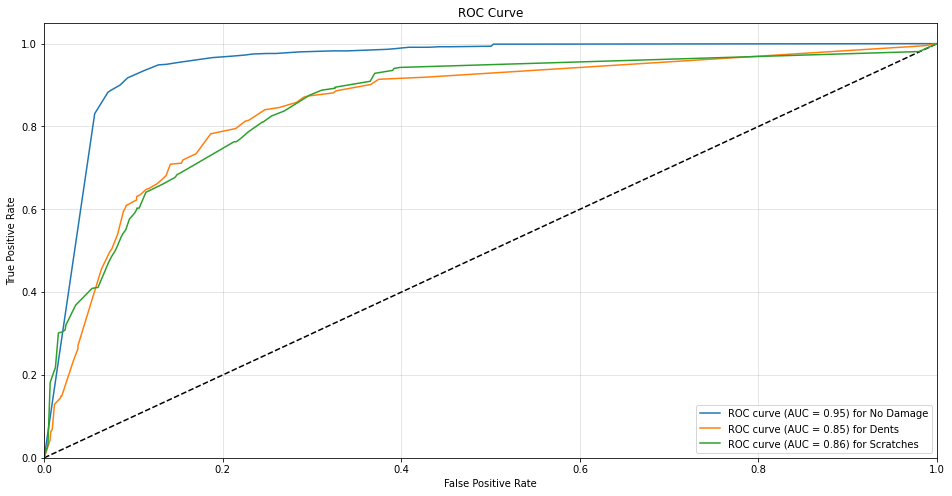

In [10]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
#for n in range(1,20):
#print("Max Depth: ",n)
model1 = DecisionTreeClassifier(max_depth=6)
#training the model with the Training Variables 
model1.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_pred1 = model1.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
plot_multiclass_roc(model1, x_test, y_test, n_classes=3, figsize=(16, 8))

Random Forest Clasifier
Random Forest Accuracy:  83.12655086848635 %
Train Accuracy: 1.0
Test Accuracy: 0.8312655086848635
Precision Score:  0.8300221751348384
Recall Score:  0.8312655086848635
F1 Score:  0.8284461612860282
Confusion Matrix: 
[[780   9  10]
 [ 31 294  70]
 [ 21 131 266]]


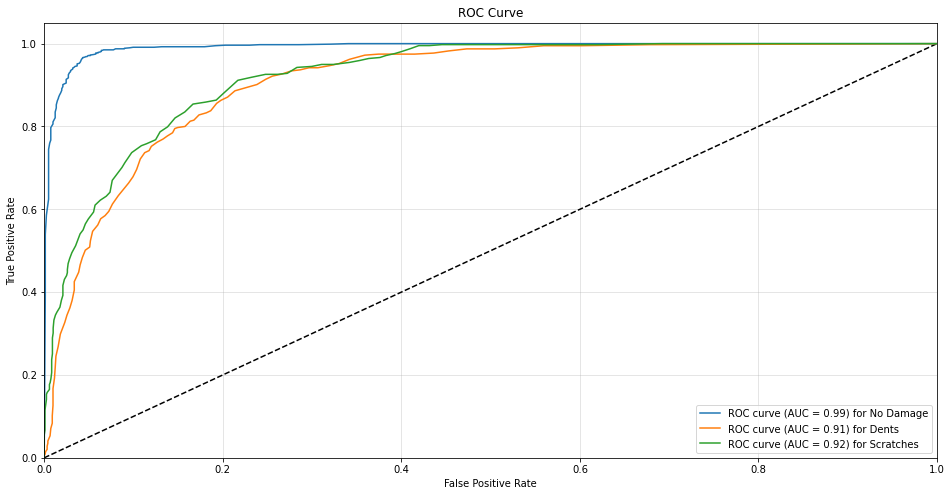

In [11]:
#Random forest classiffier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print("Random Forest Clasifier")
print("Random Forest Accuracy: ",accuracy_score(y_test, y_pred2)*100,"%")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
plot_multiclass_roc(model2, x_test, y_test, n_classes=3, figsize=(16, 8))

KNN
KNN Accuracy:  77.66749379652606 %
Train Accuracy: 0.8449720670391061
Test Accuracy: 0.7766749379652605
Precision Score:  0.7659127648300642
Recall Score:  0.7766749379652605
F1 Score:  0.7624100385036225
Confusion Matrix: 
[[794   2   3]
 [ 84 229  82]
 [ 92  97 229]]


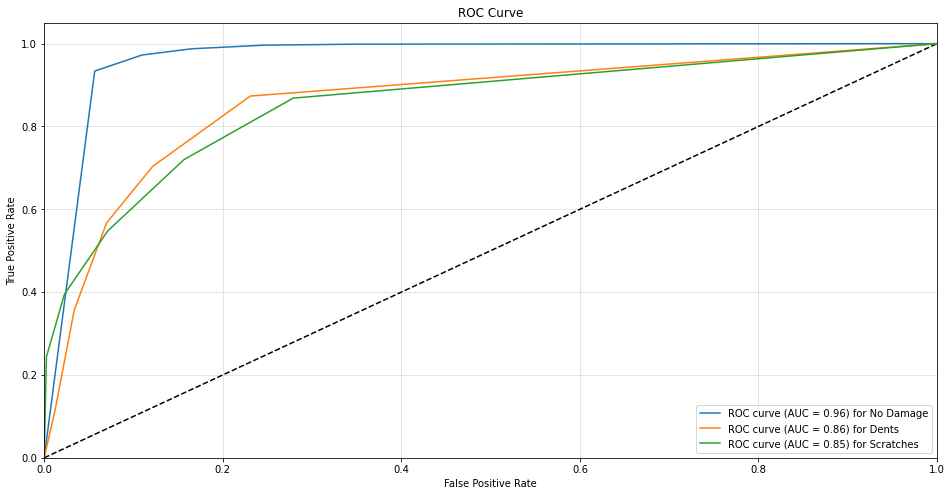

In [12]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print("KNN")
print("KNN Accuracy: ",accuracy_score(y_test, y_pred3)*100,"%")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
plot_multiclass_roc(model3, x_test, y_test, n_classes=3, figsize=(16, 8))

Gradient Boosting
Gradient Boosting Accuracy:  84.24317617866005 %
Train Accuracy: 1.0
Test Accuracy: 0.8424317617866005
Precision Score:  0.8402625366553703
Recall Score:  0.8424317617866005
F1 Score:  0.8406309970925322
Confusion Matrix: 
[[782   8   9]
 [ 24 290  81]
 [ 17 115 286]]


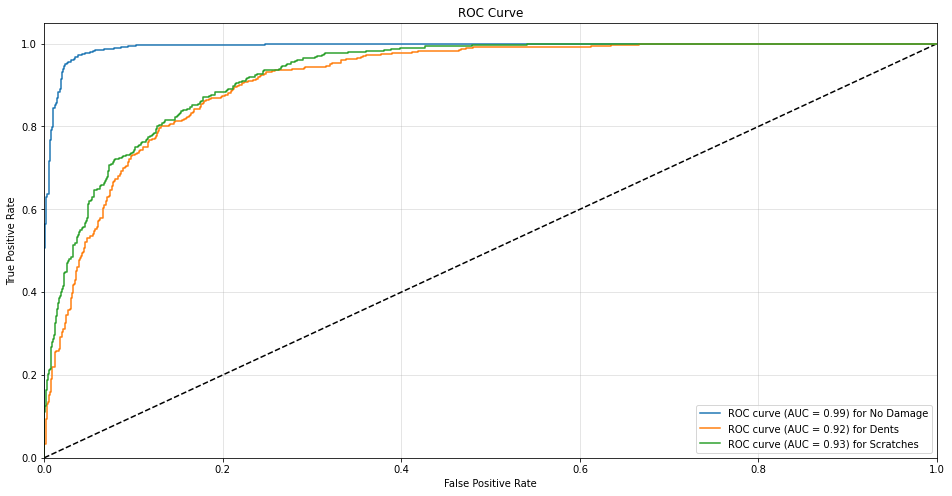

In [13]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(init=model2)
model4.fit(x_train, y_train) 
y_pred4= model4.predict(x_test)
print("Gradient Boosting")
print("Gradient Boosting Accuracy: ",accuracy_score(y_test, y_pred4)*100,"%")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))
plot_multiclass_roc(model4, x_test, y_test, n_classes=3, figsize=(16, 8))

SVM RBF kernel
SVM RBF kernel Accuracy:  83.62282878411911 %
Train Accuracy: 0.8733705772811918
Test Accuracy: 0.8362282878411911
Precision Score:  0.8331128764685836
Recall Score:  0.8362282878411911
F1 Score:  0.8335595256187454
Confusion Matrix: 
[[784   9   6]
 [ 29 285  81]
 [ 21 118 279]]


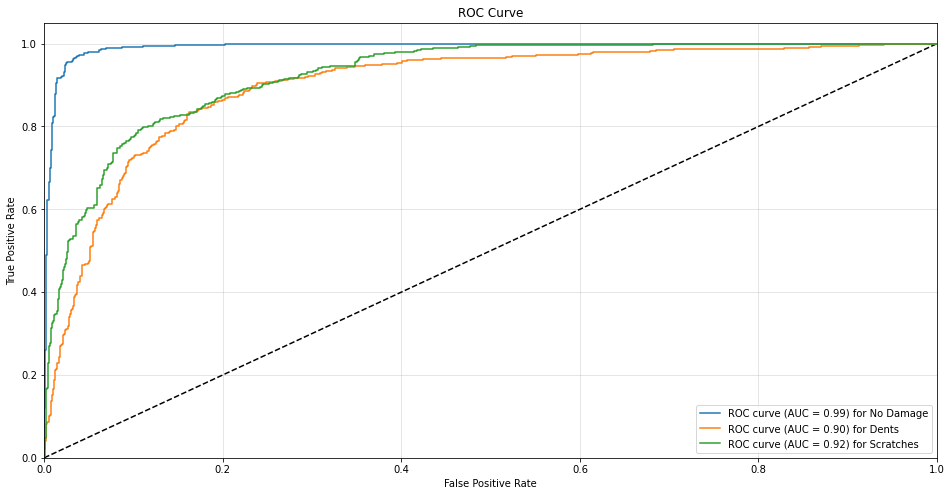

In [14]:
#SVM Classifier (RBF kernel)
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

svc_rbf = SVC(kernel='rbf', probability=True)
model5 = OneVsRestClassifier(svc_rbf)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print("SVM RBF kernel")
print("SVM RBF kernel Accuracy: ",accuracy_score(y_test, y_pred5)*100,"%")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))
plot_multiclass_roc_svm(model5, x_test, y_test, n_classes=3, figsize=(16, 8))

SVM Polynomial kernel
SVM Polynomial kernel Accuracy:  75.06203473945409 %
Train Accuracy: 0.8120732464307884
Test Accuracy: 0.750620347394541
Precision Score:  0.7497116973425816
Recall Score:  0.750620347394541
F1 Score:  0.7299509569130895
Confusion Matrix: 
[[796   0   3]
 [121 218  56]
 [136  86 196]]


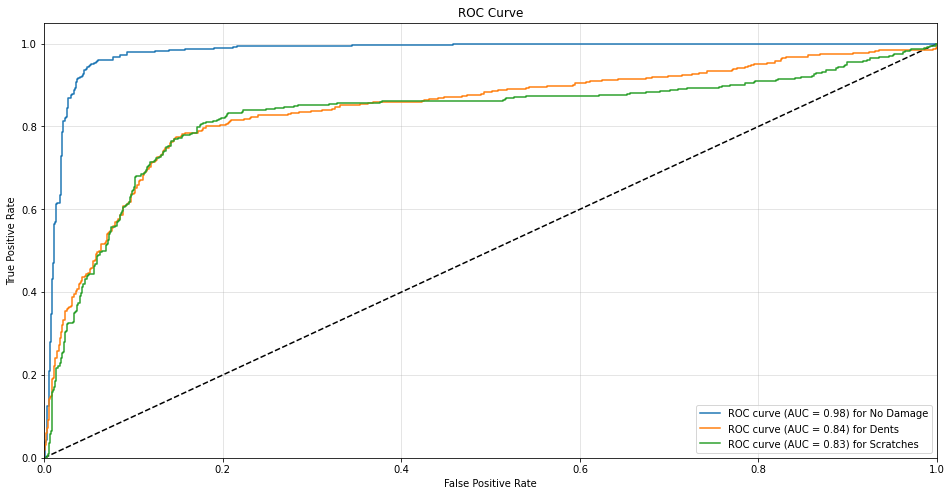

In [15]:
#SVM Classifier (Poly kernel)
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

svc_poly = SVC(kernel='poly', degree=3, probability=True)
model6 = OneVsRestClassifier(svc_poly)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
print("SVM Polynomial kernel")
print("SVM Polynomial kernel Accuracy: ",accuracy_score(y_test, y_pred6)*100,"%")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))
plot_multiclass_roc_svm(model6, x_test, y_test, n_classes=3, figsize=(16, 8))

Voting Classifier
Voting Classifier Accuracy:  83.12655086848635 %
Train Accuracy: 0.9515828677839852
Test Accuracy: 0.8312655086848635
Precision Score:  0.8256255316068862
Recall Score:  0.8312655086848635
F1 Score:  0.827287159833168
Confusion Matrix: 
[[787   3   9]
 [ 39 274  82]
 [ 25 114 279]]


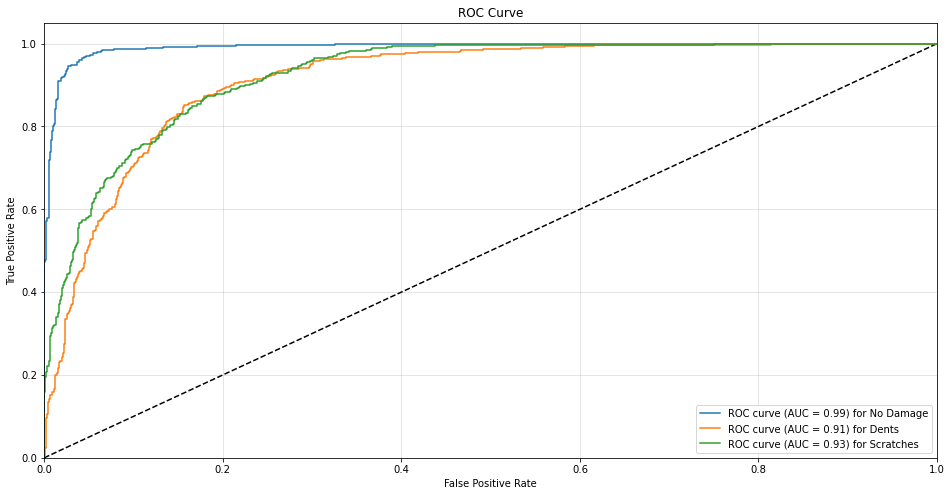

In [16]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('Decision tree', model1), ('Random forest', model2), ('KNN', model3), ('Gradient Boosting', model4), ('SVM', model5)], voting = 'soft')
voting = voting.fit(x_train, y_train)
y_pred7 = voting.predict(x_test)
print("Voting Classifier")
print("Voting Classifier Accuracy: ",accuracy_score(y_test, y_pred7)*100,"%")
print("Train Accuracy:", voting.score(x_train, y_train))
print("Test Accuracy:", voting.score(x_test, y_test))
print("Precision Score: ", metrics.precision_score(y_test, y_pred7, average='weighted'))
print("Recall Score: ", metrics.recall_score(y_test, y_pred7, average='weighted'))
print("F1 Score: ", metrics.f1_score(y_test, y_pred7, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))
plot_multiclass_roc(voting, x_test, y_test, n_classes=3, figsize=(16, 8))

## Testing on unknown data

In [17]:
data_train = pd.read_csv(r'D:\CV_project_data\PCA_26_Features.csv',header=None)

data_train

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.023949,-0.028313,-0.030207,-0.043511,-0.016211,0.002834,-0.024167,0.001720,-0.026007,-0.014802,...,-0.006231,0.022655,0.022840,-0.014723,0.011340,-0.008943,-0.011551,-0.000925,0.001549,0
1,-0.134306,-0.035634,-0.012298,-0.011226,-0.031849,0.012514,-0.020379,-0.030930,-0.008288,0.006515,...,-0.001901,0.010302,0.009328,0.003893,-0.008208,-0.024158,-0.018443,-0.010831,0.008592,0
2,-0.286228,0.101197,-0.007253,0.008525,0.018092,0.017270,0.010840,-0.014074,-0.007968,0.004184,...,-0.005664,0.002445,-0.008305,-0.000102,-0.004021,-0.004558,0.009123,-0.002492,0.001369,0
3,-0.050789,-0.075265,-0.004524,0.002613,-0.028164,-0.038997,-0.011950,0.027984,-0.023509,0.010596,...,0.008409,0.011313,0.012753,-0.014125,0.013455,-0.014886,-0.005571,-0.003606,0.006254,0
4,-0.078769,-0.141327,0.002100,0.047809,0.040549,0.012619,0.031189,-0.026843,-0.037876,0.000286,...,0.002800,-0.017748,0.000187,0.004871,-0.005866,0.001620,-0.013330,0.036793,0.005678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,-0.380073,0.263549,0.044032,0.007351,0.033108,-0.022959,-0.035596,0.048076,0.056803,-0.000964,...,0.017584,-0.003811,0.036438,-0.012367,-0.044228,0.037906,-0.009971,-0.023647,0.005620,2
8052,-0.499246,0.347824,0.014631,0.057213,0.019706,-0.017193,0.018756,0.041708,0.059141,-0.011064,...,0.011639,-0.010972,0.031070,-0.011081,0.021807,0.004672,-0.015227,0.011469,-0.006901,2
8053,-0.462122,0.297772,0.010994,0.033180,0.002144,0.001259,0.018124,0.021188,0.036156,-0.056995,...,-0.026844,0.003452,-0.011021,-0.006440,-0.046595,0.019788,0.001302,0.003762,-0.012656,2
8054,-0.410374,0.243532,0.012156,0.022009,-0.005514,-0.017218,0.014908,0.034215,0.008387,-0.012099,...,0.004434,-0.004961,0.018030,0.002061,0.036012,-0.009491,-0.002714,0.000640,-0.002451,2


In [18]:
#assigning x the columns from 1 to 128 for training
x_train = data_train.iloc[:,0:26].values
print("X Train values")
print(x_train)

#assigning y with the column "Class" as target variable
y_train = data_train.iloc[:,26]
print("Y Train values")
print(y_train)

X Train values
[[-0.02394931 -0.0283131  -0.03020699 ... -0.01155114 -0.00092545
   0.00154928]
 [-0.134306   -0.0356338  -0.0122979  ... -0.01844272 -0.01083112
   0.00859227]
 [-0.28622814  0.10119703 -0.00725306 ...  0.00912253 -0.00249164
   0.00136931]
 ...
 [-0.46212178  0.29777203  0.01099413 ...  0.00130205  0.00376209
  -0.01265611]
 [-0.41037425  0.24353248  0.01215601 ... -0.00271428  0.00064004
  -0.00245106]
 [-0.29511357  0.1118142  -0.00330543 ...  0.00090607  0.00965572
   0.05671821]]
Y Train values
0       0
1       0
2       0
3       0
4       0
       ..
8051    2
8052    2
8053    2
8054    2
8055    2
Name: 26, Length: 8056, dtype: int64


In [19]:
data_test = pd.read_csv(r'D:\CV_project_data\PCA_Test_26_Features.csv',header=None)

data_test

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.042122,-0.018930,0.022885,-0.056185,0.013030,-0.053408,0.020554,-0.035316,-0.027234,0.000431,...,-0.005913,0.011507,-0.002182,0.001836,0.002027,0.000762,0.007882,-0.011574,0.000811,0
1,-0.218277,0.038135,-0.078333,-0.002998,-0.026510,-0.009701,0.019857,-0.033681,-0.042364,0.016131,...,0.036094,-0.002792,0.008716,-0.017622,-0.001044,-0.044234,0.004167,0.014962,0.011860,0
2,-0.227856,0.000428,-0.068857,0.015475,-0.008038,0.003732,0.004584,-0.008705,-0.015723,0.016003,...,-0.011118,-0.008531,-0.005686,-0.000511,0.002527,-0.006917,-0.013276,-0.003760,-0.006666,0
3,-0.226286,0.006850,-0.117778,0.040804,0.001416,0.018306,0.022538,0.019184,0.025188,-0.005216,...,-0.025255,0.018853,0.014131,0.008218,-0.001870,0.028200,0.003659,-0.008038,-0.002473,0
4,-0.073702,-0.021698,0.012616,-0.004442,-0.033518,0.009986,-0.002834,-0.021707,-0.024148,-0.002581,...,-0.015311,0.001648,-0.001288,0.002484,-0.015905,0.000403,-0.004110,0.001063,0.000073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,-0.025794,-0.002695,0.102585,-0.003578,0.185239,-0.015413,0.000828,-0.120415,0.004553,-0.062944,...,0.035416,-0.053601,0.063881,-0.016535,0.005749,0.025882,0.039428,0.016020,0.007194,2
2004,-0.009273,-0.050077,0.005962,-0.124337,0.034054,-0.042890,-0.075141,0.020379,0.089405,0.027753,...,-0.008361,-0.023174,-0.001413,-0.003316,-0.014805,-0.008017,0.009234,0.011182,-0.000467,2
2005,-0.101253,-0.105823,-0.117718,-0.033930,0.127353,-0.036841,-0.094410,-0.002385,0.025001,0.056831,...,0.015705,-0.025429,0.054533,-0.009821,0.017924,0.016817,-0.009750,-0.006188,-0.023214,2
2006,0.256113,-0.276698,-0.128319,-0.218068,0.070681,-0.045961,0.130397,-0.040692,0.040120,-0.065416,...,0.006878,0.009424,-0.022619,0.034990,-0.027889,0.018750,-0.032816,0.000337,0.007756,2


In [20]:
#assigning x the columns from 1 to 128 for training
x_test = data_test.iloc[:,0:26].values
print("X Test values")
print(x_test)

#assigning y with the column "Class" as target variable
y_test = data_test.iloc[:,26]
print("Y Test values")
print(y_test)

X Test values
[[-0.04212199 -0.01893046  0.02288482 ...  0.00788231 -0.0115738
   0.00081103]
 [-0.21827661  0.03813494 -0.0783333  ...  0.00416707  0.01496224
   0.01186003]
 [-0.22785567  0.00042803 -0.06885738 ... -0.013276   -0.00376045
  -0.00666584]
 ...
 [-0.10125319 -0.10582293 -0.11771796 ... -0.00975041 -0.00618794
  -0.02321391]
 [ 0.25611307 -0.27669803 -0.12831933 ... -0.03281629  0.00033725
   0.00775593]
 [-0.10060494  0.0181051  -0.12135879 ... -0.00146445 -0.00921453
   0.01524644]]
Y Test values
0       0
1       0
2       0
3       0
4       0
       ..
2003    2
2004    2
2005    2
2006    2
2007    2
Name: 26, Length: 2008, dtype: int64


Decision Tree Results
Decision Tree Accuracy:  51.245019920318725 %
Train Accuracy: 0.8241062562065541
Test Accuracy: 0.5124501992031872
Precision Score:  0.5274436613254099
Recall Score:  0.5124501992031872
F1 Score:  0.5183113636523136
Confusion Matrix: 
[[476  34 290]
 [119 331 158]
 [102 276 222]]


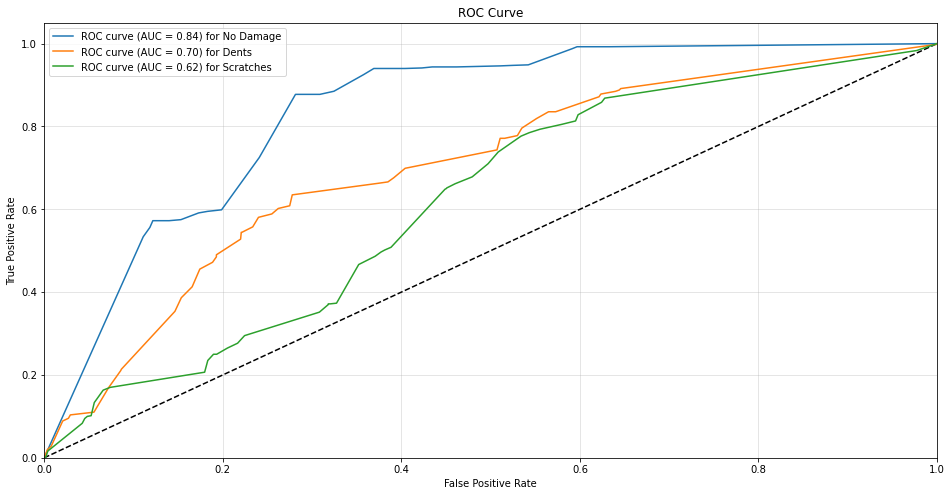

In [21]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score

#predicting the traget variable using testing variables
y_pred1 = model1.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
plot_multiclass_roc(model1, x_test, y_test, n_classes=3, figsize=(16, 8))

Random Forest Clasifier
Random Forest Accuracy:  63.09760956175299 %
Train Accuracy: 0.9685948361469712
Test Accuracy: 0.6309760956175299
Precision Score:  0.6263801887148394
Recall Score:  0.6309760956175299
F1 Score:  0.6238160709902288
Confusion Matrix: 
[[633  32 135]
 [ 79 422 107]
 [ 76 312 212]]


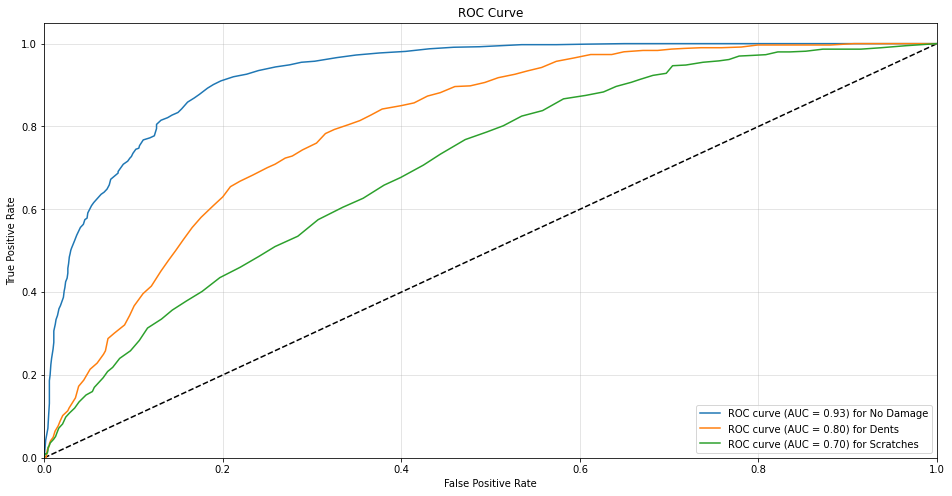

In [22]:
#Random forest classiffier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

y_pred2 = model2.predict(x_test)
print("Random Forest Clasifier")
print("Random Forest Accuracy: ",accuracy_score(y_test, y_pred2)*100,"%")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
plot_multiclass_roc(model2, x_test, y_test, n_classes=3, figsize=(16, 8))

KNN
KNN Accuracy:  59.76095617529881 %
Train Accuracy: 0.8313058589870904
Test Accuracy: 0.5976095617529881
Precision Score:  0.5830499135809656
Recall Score:  0.5976095617529881
F1 Score:  0.5526243491834221
Confusion Matrix: 
[[776   9  15]
 [230 292  86]
 [226 242 132]]


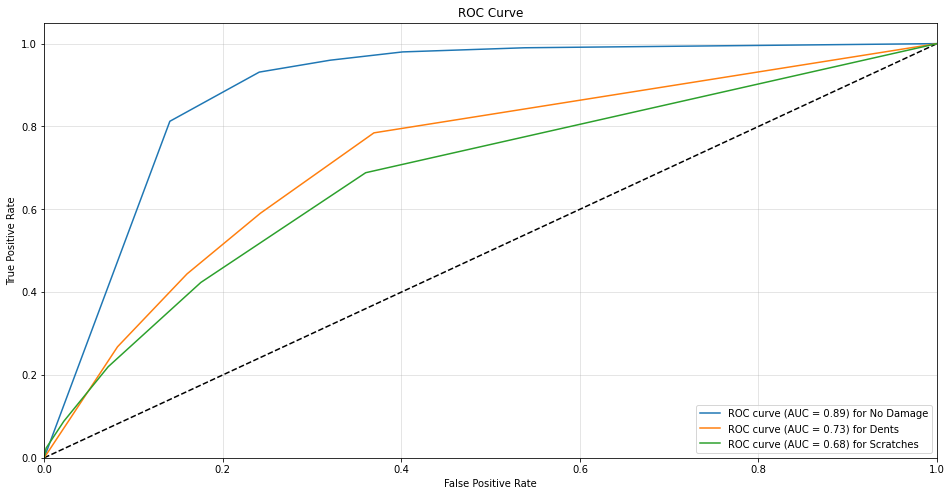

In [23]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

y_pred3 = model3.predict(x_test)
print("KNN")
print("KNN Accuracy: ",accuracy_score(y_test, y_pred3)*100,"%")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
plot_multiclass_roc(model3, x_test, y_test, n_classes=3, figsize=(16, 8))

Gradient Boosting
Gradient Boosting Accuracy:  64.39243027888446 %
Train Accuracy: 0.9684707050645481
Test Accuracy: 0.6439243027888446
Precision Score:  0.6368469597303422
Recall Score:  0.6439243027888446
F1 Score:  0.635018303232624
Confusion Matrix: 
[[667  33 100]
 [ 77 411 120]
 [ 77 308 215]]


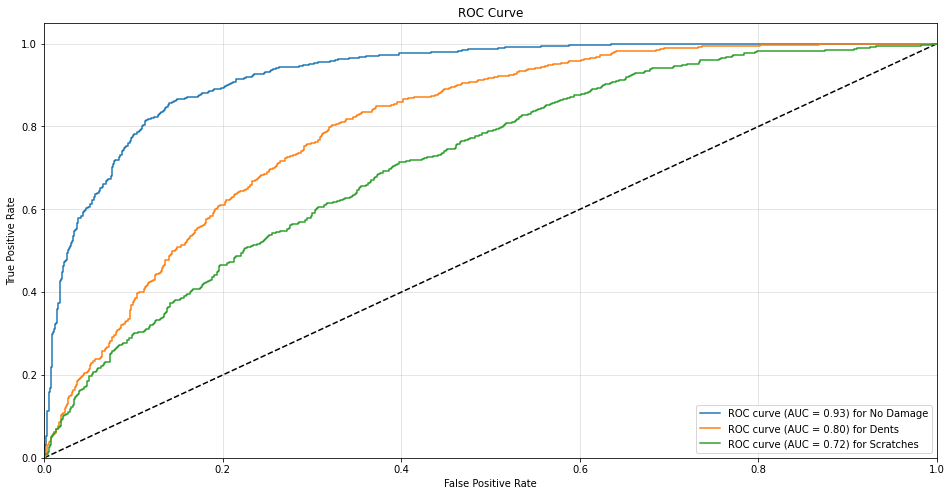

In [24]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
 
y_pred4= model4.predict(x_test)
print("Gradient Boosting")
print("Gradient Boosting Accuracy: ",accuracy_score(y_test, y_pred4)*100,"%")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))
plot_multiclass_roc(model4, x_test, y_test, n_classes=3, figsize=(16, 8))

SVM RBF kernel
SVM RBF kernel Accuracy:  62.54980079681275 %
Train Accuracy: 0.8659384309831182
Test Accuracy: 0.6254980079681275
Precision Score:  0.6045914516122747
Recall Score:  0.6254980079681275
F1 Score:  0.6049098686552414
Confusion Matrix: 
[[697  20  83]
 [111 390 107]
 [111 320 169]]


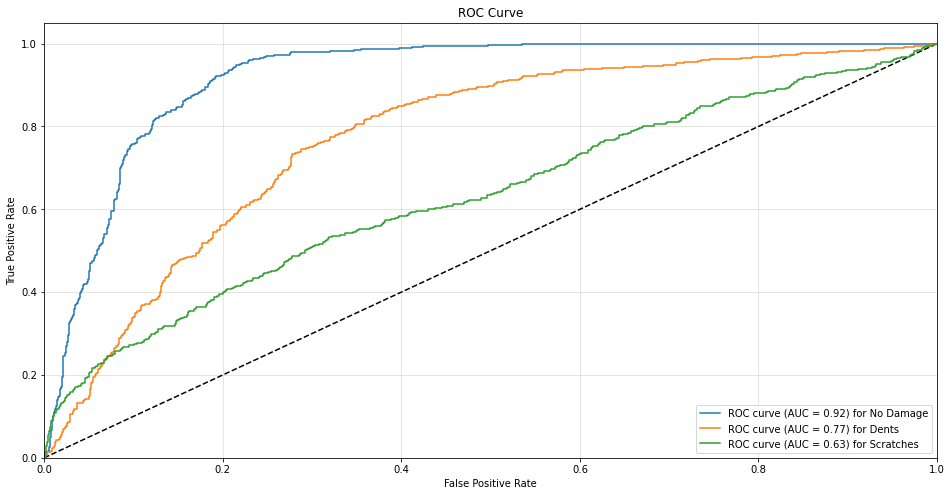

In [25]:
#SVM Classifier (RBF kernel)
from sklearn.svm import SVC

y_pred5 = model5.predict(x_test)
print("SVM RBF kernel")
print("SVM RBF kernel Accuracy: ",accuracy_score(y_test, y_pred5)*100,"%")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))
plot_multiclass_roc_svm(model5, x_test, y_test, n_classes=3, figsize=(16, 8))

SVM Polynomial kernel
SVM Polynomial kernel Accuracy:  50.34860557768924 %
Train Accuracy: 0.7997765640516385
Test Accuracy: 0.5034860557768924
Precision Score:  0.5442456148693094
Recall Score:  0.5034860557768924
F1 Score:  0.41661991724932146
Confusion Matrix: 
[[800   0   0]
 [407 155  46]
 [449  95  56]]


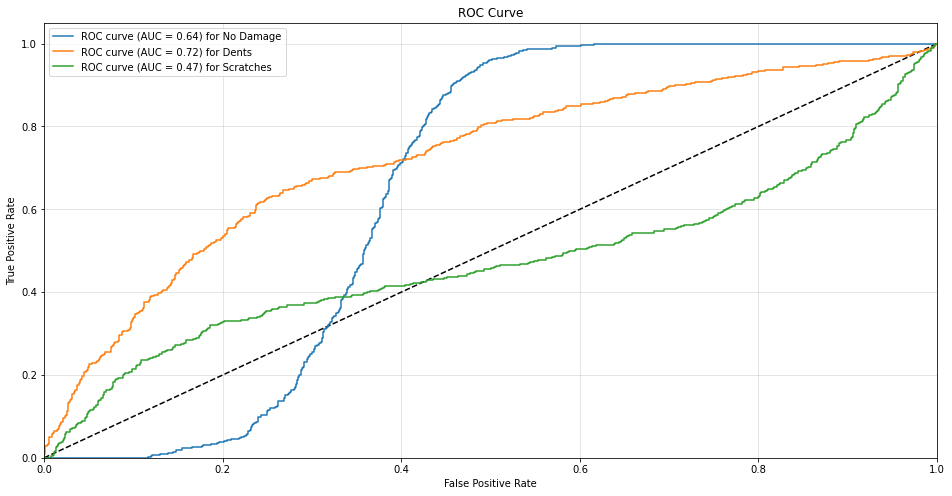

In [26]:
#SVM Classifier (Poly kernel)
from sklearn.svm import SVC

y_pred6 = model6.predict(x_test)
print("SVM Polynomial kernel")
print("SVM Polynomial kernel Accuracy: ",accuracy_score(y_test, y_pred6)*100,"%")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6, average='weighted'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))
plot_multiclass_roc_svm(model6, x_test, y_test, n_classes=3, figsize=(16, 8))

Voting Classifier
Voting Classifier Accuracy:  63.79482071713147 %
Train Accuracy: 0.9275074478649454
Test Accuracy: 0.6379482071713147
Precision Score:  0.6195001069802973
Recall Score:  0.6379482071713147
F1 Score:  0.6191846580818257
Confusion Matrix: 
[[708  16  76]
 [119 382 107]
 [111 298 191]]


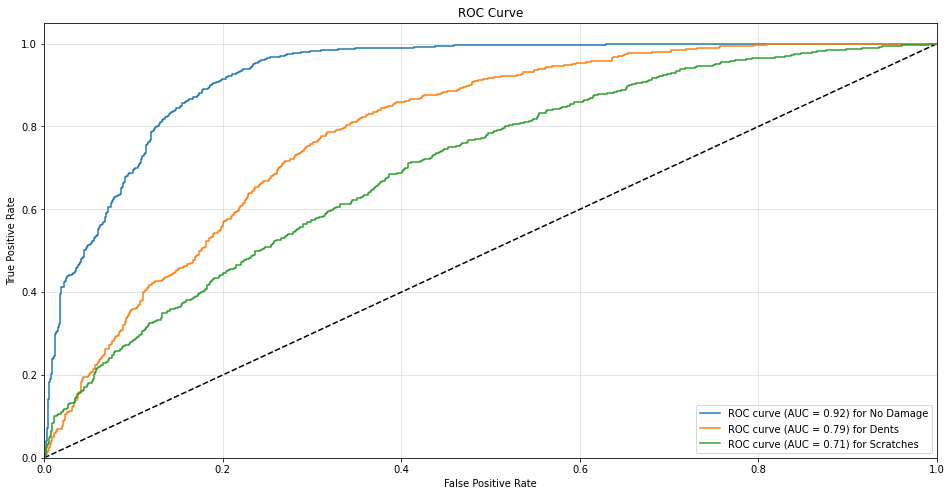

In [27]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier

y_pred7 = voting.predict(x_test)
print("Voting Classifier")
print("Voting Classifier Accuracy: ",accuracy_score(y_test, y_pred7)*100,"%")
print("Train Accuracy:", voting.score(x_train, y_train))
print("Test Accuracy:", voting.score(x_test, y_test))
print("Precision Score: ", metrics.precision_score(y_test, y_pred7, average='weighted'))
print("Recall Score: ", metrics.recall_score(y_test, y_pred7, average='weighted'))
print("F1 Score: ", metrics.f1_score(y_test, y_pred7, average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))
plot_multiclass_roc(voting, x_test, y_test, n_classes=3, figsize=(16, 8))

## Single Image Test

In [61]:
#Recognition &Validation
#Assigning path with any any class image
data1=[]

# path=r"D:\CV_project_data\Final_Dataset\Testing\Negative\00003.jpg"
# path=r"D:\CV_project_data\Final_Dataset\Testing\Dents\3.jpeg"
# path=r"D:\CV_project_data\Final_Dataset\Testing\Scratches\3.jpg"

#Repeated the process of image pre-processing and feature extraction
a=cv2.imread(path)
resize=(280,430)

#resize image
img=cv2.resize(a,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal 
img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
img_prewitt = img_prewittx + img_prewitty

sift = cv2.xfeatures2d.SIFT_create()    
keypoints_sift, descriptors_sift = sift.detectAndCompute(img_prewitt, None)

out_sift = pd.DataFrame(descriptors_sift)

#predict values of feature vector with pretrained kmeans

array_double = np.array(out_sift, dtype=np.double)

a1=pretrained_model_sift.predict(array_double)

hist=np.histogram(a1, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
hist_list = list(hist)
hist_list[0] = hist_list[0]/out_sift.shape[0]

surf = cv2.xfeatures2d.SURF_create()
surf.setExtended(True)
keypoints_surf, descriptors_surf = surf.detectAndCompute(img_prewitt, None)

out_surf = pd.DataFrame(descriptors_surf)
array_double2 = np.array(out_surf, dtype=np.double)
a2=pretrained_model_surf.predict(array_double2)

hist2=np.histogram(a2, bins=[0,1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
hist_list2 = list(hist2)
hist_list2[0] = hist_list2[0]/out_surf.shape[0]

#append the dataframe into the array in append mode, the array will only have 36 values which will store the values in a row
hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None)
data1.append(hist_new)
    

Output = pd.DataFrame(data1)
print("Histogram:\n",Output)

Histogram:
          0         1         2         3         4         5         6   \
0  0.038793  0.043103  0.032328  0.052802  0.044181  0.038793  0.014009   

         7         8         9   ...        26        27        28        29  \
0  0.065733  0.059267  0.047414  ...  0.039752  0.037171  0.083118  0.059886   

         30        31        32        33        34        35  
0  0.056273  0.087765  0.130614  0.047496  0.054208  0.031492  

[1 rows x 36 columns]


In [62]:
Output

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.038793,0.043103,0.032328,0.052802,0.044181,0.038793,0.014009,0.065733,0.059267,0.047414,...,0.039752,0.037171,0.083118,0.059886,0.056273,0.087765,0.130614,0.047496,0.054208,0.031492


In [63]:
pca = pickle.load(open('PCA_Model_26.sav', 'rb'))

In [64]:
MB = pca.transform(Output)

In [65]:
MB.shape

(1, 26)

In [66]:
MB

array([[-1.75642139e-01, -2.35669363e-03, -1.31418955e-03,
        -1.59091039e-02, -1.35729862e-02,  1.97374243e-02,
         3.06777945e-03, -1.26329207e-02, -3.12306335e-02,
        -3.84462437e-03,  6.25543820e-03, -3.12079452e-03,
        -2.74325442e-02,  9.84623995e-04, -1.33447889e-02,
        -1.24712686e-03,  1.08090552e-04, -4.73177230e-03,
         6.27119797e-03,  4.92927300e-03, -1.11527541e-02,
        -8.51966577e-03,  4.03953666e-03, -5.52766055e-03,
        -3.87752222e-03,  3.19351375e-03]])

In [67]:
#prediction
y_pred1 = model1.predict(MB)
y_pred2 = model2.predict(MB)
y_pred3 = model3.predict(MB)
y_pred4 = model4.predict(MB)
y_pred5 = model5.predict(MB)
y_pred6 = voting.predict(MB)

print("Decision tree predicts: ", y_pred1)
print("Random forest predicts: ", y_pred2)
print("KNN predicts: ", y_pred3)
print("Gradient Boosting predicts: ", y_pred4)
print("SVM poly predicts: ", y_pred5)
print("Final Vote: ", y_pred6)

Decision tree predicts:  [0]
Random forest predicts:  [0]
KNN predicts:  [0]
Gradient Boosting predicts:  [0]
SVM poly predicts:  [0]
Final Vote:  [0]
